<a href="https://colab.research.google.com/github/MarianoVizzo/MarianoVizzo/blob/main/Proyecto_Final_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

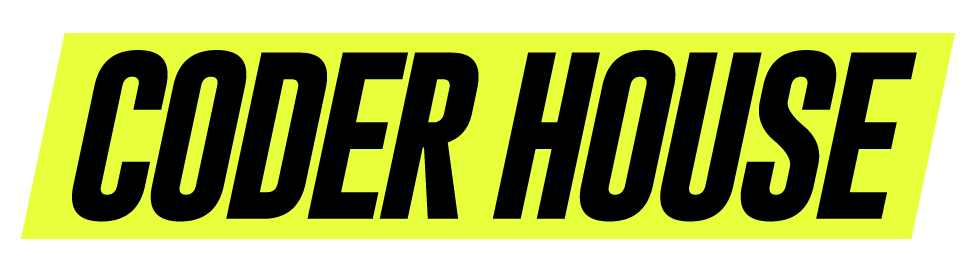

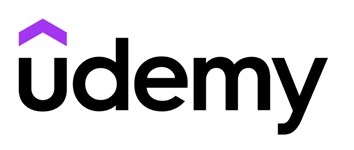




---







# **PROYECTO CODERHOUSE: UDEMY Y ÉXITOS EN VENTAS DE SUS CURSOS**

## **1. STORYTELLING DEL PROYECTO**

En el link brindado a continuación se puede visualizar el **Storytelling del presente Proyecto:**

https://docs.google.com/presentation/d/13-WiBFAqfrUeyKqe5LWp6jM7emllfiZ-/edit#slide=id.p1

## **2. INFORMACIÓN DEL CONJUNTO DE DATOS**

### **2.1. Contexto**

- Udemy (www.udemy.com) es una tienda virtual que ofrece cursos a distancia sobre diferentes temáticas relacionadas
con la tecnología y los negocios. El sitio funciona como un marketplace donde los instructores pueden publicar los
cursos que desarrollaron y ganar dinero cuando algún alumno de Udemy los compra.

- La cantidad de cursos de Udemy ha crecido en forma acelerada debido al éxito de la educación a distancia. Sin
embargo, los cursos han tenido demandas muy dispares, algunos han sido un éxito de ventas (bestsellers) y otros
tuvieron tan pocos alumnos que no justifican la inversión realizada en ellos.



### **2.2. Objetivo del proyecto**

- **El objetivo final es analizar los datos de los cursos publicados en español entre 2012 y
2022, predecir cuáles de los cursos a ser lanzados en 2023 serán un éxito de ventas**

### **2.3. Variables del conjunto de datos**



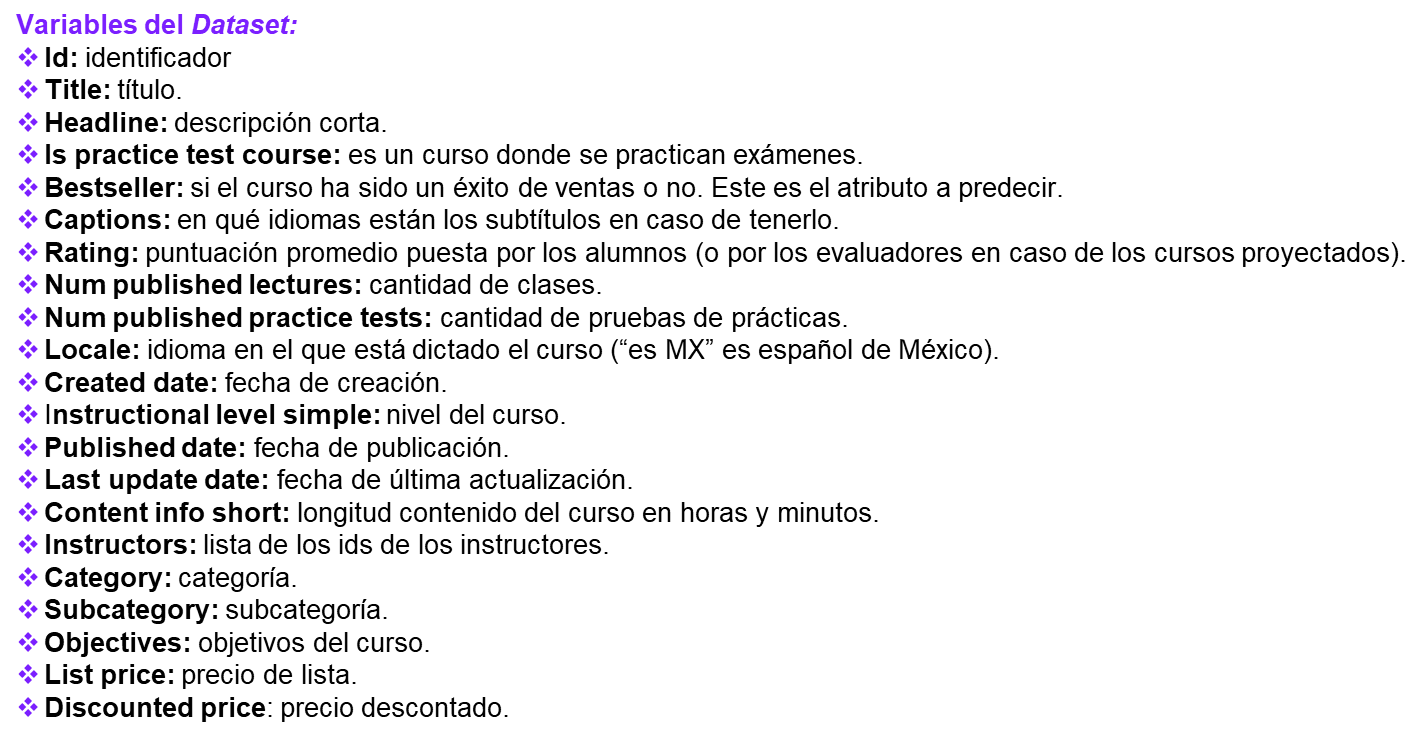

### **2.4. Importación de datos**

- Los datos fueron importados desde un archivo excel. El archivo contiene atributos que serán explicados  continuación.

- Para el presente trabajo se realizó una codificación de las siguientes variables categóricas: "bestseller", "locale", "instructional_level_simple", "category".

- Los valores expresados en el informe, al decir "pesos" se hace referencia a "USD".

In [ ]:
# Importar librerías necesarias
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 # Leer archivo Excel
df = pd.read_excel("/content/drive/MyDrive/udemy(3).xlsx")

In [ ]:
# Cantidad de filas y columnas
df.shape

(11326, 24)

**Interpretación:**



* El dataframe tiene 11.326 filas y 24 columnas.



In [ ]:
# Visualizar los primeros registros
df.head()

id                                              title  \
0   1  Aprende a tocar Piano o Teclado (Desde nivel b...   
1   2  Curso Hipoterapia y Rehabilitacion Ecuestre On...   
2   3                                   Curso SEO Online   
3   4                             Aprende CSS3 sin dolor   
4   5                   Aprende Javascript, HTML5 y CSS3   

                                            headline  is_practice_test_course  \
0  Curso completo de Piano con TEORÍA para el fun...                    False   
1  Terapias asistidas por Caballos (Hipoterapia, ...                    False   
2  Curso SEO práctico. Aprenda a posicionar su si...                    False   
3  Realiza animaciones asombrosas, antes imposibl...                    False   
4  Aprende los principales lenguajes que dominan ...                    False   

   bestseller captions    rating  num_published_lectures  \
0       False    es_LA  4.535809                      58   
1       False    es_ES  4.133590                      32   
2       False    es_ES  3.841912                      76   
3       False    es_MX  4.039739                      68   
4        True      NaN  4.643154                     550   

   num_published_practice_tests locale  ... content_info_short instructors  \
0                             1  es_LA  ...            4 horas      121211   
1                             0  es_ES  ...           10 horas      236127   
2                             0  es_ES  ...          6,5 horas        3851   
3                             0  es_MX  ...          9,5 horas      171706   
4                             0  es_MX  ...         70,5 horas      171706   

         category                 subcategory  \
0          Música                       Piano   
1  Estilo de vida  Adiestramiento de mascotas   
2       Marketing                         SEO   
3      Desarrollo                         CSS   
4      Desarrollo                  JavaScript   

                                          objectives list_price  \
0  Aprende Piano desde nivel básico. Estudiaras l...      34.99   
1  La Hipoterapia y la Psicología.La Hipoterapia ...      99.99   
2  Entender los fundamentos del SEO.Aprender a ha...      94.99   
3  El alumno conocerá las principales característ...      19.99   
4  Desarrollar páginas dinámicas con JavaScript, ...      29.99   

  discount_price locale_cod instructional_level_simple_cod  category_cod  
0           12.0          4                            1.0             1  
1            NaN          3                            2.0             2  
2           12.0          3                            1.0             3  
3           12.0          5                            3.0             4  
4           12.0          5                            1.0             4  

[5 rows x 24 columns]

In [ ]:
# Visualizar los últimos registros
df.tail()

id                                              title  \
11321  11322  Bootcamp de Redacción Publicitaria (Copywritin...   
11322  11323     Estructuras de Acero I: Elementos a Compresión   
11323  11324                       Fortinet Security 6.4 - NSE4   
11324  11325                         Sanando a tu Niña Interior   
11325  11326  Amazon AWS Certified Solutions Architect SAA-C...   

                                                headline  \
11321  Puede escribir un texto que venda: redes socia...   
11322  Conceptos y aplicación con referencia al AISC ...   
11323  Conviértase en un especialista en el corto tie...   
11324  ¡Reencuéntrate con tu Niña Interior, sana tus ...   
11325  Aprueba el Amazon AWS Certified Solutions Arch...   

       is_practice_test_course  bestseller captions    rating  \
11321                    False        True    es_LA  4.155691   
11322                    False       False    es_LA  4.818863   
11323                    False       False      NaN  3.740466   
11324                    False       False      NaN  4.430968   
11325                     True       False      NaN  5.000000   

       num_published_lectures  num_published_practice_tests locale  ...  \
11321                      65                             0  es_LA  ...   
11322                      16                             0  es_LA  ...   
11323                      40                             0  es_ES  ...   
11324                      18                             0  es_MX  ...   
11325                       0                             5  es_ES  ...   

      content_info_short                instructors  \
11321            5 horas  19701574,317821,131047686   
11322          5,5 horas                   31705782   
11323            5 horas                   50387672   
11324          2,5 horas                   64540522   
11325      309 preguntas                  144633964   

                                  category  \
11321                            Marketing   
11322  Enseñanzas y disciplinas académicas   
11323               Informática y software   
11324                  Desarrollo personal   
11325               Informática y software   

                                subcategory  \
11321     Redacción de textos publicitarios   
11322                Ingeniería estructural   
11323                          Fortinet NSE   
11324  Superación de traumas de la infancia   
11325                     Certificación AWS   

                                              objectives list_price  \
11321  Aprenderá a redactar la mejor copia para cualq...      94.99   
11322  Calcular la capacidad a compresión de elemento...      89.99   
11323  Aprenderar a implementar las distintas funcion...      24.99   
11324  Descubrirás porque es que actúas como actúas, ...      89.99   
11325  Amazon AWS Certified Solutions Architect (SAA-...      19.99   

      discount_price locale_cod instructional_level_simple_cod  category_cod  
11321           12.0          4                            1.0             3  
11322           12.0          4                            3.0             5  
11323           12.0          3                            3.0            12  
11324           12.0          5                            1.0             6  
11325           12.0          3                            1.0            12  

[5 rows x 24 columns]

In [ ]:
# Tipos de datos de cada variable

df.dtypes

id                                  int64
title                              object
headline                           object
is_practice_test_course              bool
bestseller                           bool
captions                           object
rating                            float64
num_published_lectures              int64
num_published_practice_tests        int64
locale                             object
created_date                       object
instructional_level_simple         object
published_date                     object
last_update_date                   object
content_info_short                 object
instructors                        object
category                           object
subcategory                        object
objectives                         object
list_price                        float64
discount_price                    float64
locale_cod                          int64
instructional_level_simple_cod    float64
category_cod                      

**Interpretación:**



Mediante **dtypes** se obtiene información acerca del tipo de dato de cada columna (variable o atributo):

1) **Int64:** Valores numéricos y enteros.

2) **Object:** Significa que son valores del tipo texto.

3) **Bool:** Valores binarios del tipo 1 y 0.

4) **Float64:** Valores numéricos del tipo decimal.


Esto es importante verificarlo, ya que pueden existir datos con un determinado tipo al que no corresponde. En este caso los datos son correctos, sin embargo, posteriormente se realizarán modificaciones.

## **3. ANÁLISIS EXPLORATORIO Y DESCRIPTIVO DE DATOS**

El **análisis exploratorio de datos** (EDA, por sus siglas en inglés) es un enfoque en la estadística y la ciencia de datos que se utiliza para examinar, resumir y visualizar datos con el objetivo de obtener una comprensión inicial y general de las características y patrones presentes en el conjunto de datos.

Algunos de los objetivos principales del EDA son:

**1) Identificar patrones:** El EDA ayuda a detectar patrones o estructuras en los datos, como tendencias, relaciones entre variables, valores atípicos y distribuciones.

**2) Explorar la distribución de datos:** Permite comprender cómo están distribuidos los datos y si siguen una distribución específica, como normal, exponencial, etc.

**3) Detectar valores faltantes o erróneos:** Ayuda a identificar datos faltantes o incorrectos y decidir cómo manejarlos adecuadamente.

**4) Realizar resúmenes estadísticos:** Proporciona estadísticas descriptivas básicas, como media, mediana, moda, desviación estándar, entre otros, para comprender la centralidad y la dispersión de los datos.

**5) Visualizar datos:** Utiliza gráficos y visualizaciones para representar datos de manera visual, lo que facilita la identificación de patrones y tendencias.

**6) Hacer hipótesis iniciales:** Con base en el análisis exploratorio, se pueden formular hipótesis iniciales sobre relaciones entre variables o características interesantes en los datos.

### **3.1. Revisión de valores nulos o vacíos**

In [ ]:
#Revisión de Valores Nulos o Vacíos
df.isnull() # Busca valores vacío, como no son vacíos indica "False"
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11326 non-null  int64  
 1   title                           11326 non-null  object 
 2   headline                        11325 non-null  object 
 3   is_practice_test_course         11326 non-null  bool   
 4   bestseller                      11326 non-null  bool   
 5   captions                        9330 non-null   object 
 6   rating                          11326 non-null  float64
 7   num_published_lectures          11326 non-null  int64  
 8   num_published_practice_tests    11326 non-null  int64  
 9   locale                          11326 non-null  object 
 10  created_date                    11326 non-null  object 
 11  instructional_level_simple      11321 non-null  object 
 12  published_date                  

**Interpretación:**

* El conjunto de datos tiene determinados atributos (variables) con valores del tipo Non-Null. Ellos son "headline","captions", "instructional_level_simple", "last_update_date", "instructors","subcategory", "objectives", "discount_price".

* El método para manejar valores faltantes o nulos depende de las características del conjunto de datos, el propósito del análisis y la disponibilidad de otros datos. Es importante analizar cada caso por separado.

* También es importante realizar un seguimiento de los datos que se imputaron, ya que esto puede introducir sesgos en el análisis.

### **3.2. Frecuencia**

In [ ]:
# Valores unicos de cada columna
df.nunique().sort_values()

is_practice_test_course               2
bestseller                            2
instructional_level_simple            4
instructional_level_simple_cod        4
locale_cod                            6
locale                                6
num_published_practice_tests          7
discount_price                       12
category                             13
category_cod                         13
list_price                           29
captions                             58
content_info_short                  268
num_published_lectures              358
subcategory                        1887
last_update_date                   1916
published_date                     2080
created_date                       2394
instructors                        5387
rating                             9920
headline                          11094
objectives                        11129
title                             11245
id                                11326
dtype: int64

**Interpretación:**



* De esta manera se pueden diferenciar las variables que pueden definirse como **Variables Categóricas** y **Variables Numéricas**.

* **Variables Categóricas:** is_practice_test_course, bestseller, instructional_level_simple, locale, category.

* **Variables Numéricas:** num_published_practice_tests, discount_price, list_price, num_published_lectures, rating.



### **3.3. Variables Categóricas**

A continuación se realiza un cálculo de las frecuencias de las variables categóricas más relevantes.

In [ ]:
# Frecuencias de la variable "is_practice_test_course"
df["is_practice_test_course"].value_counts()

False    11128
True       198
Name: is_practice_test_course, dtype: int64

In [ ]:
# Frecuencias de la variable "bestseller"
df["bestseller"].value_counts()

False    9081
True     2245
Name: bestseller, dtype: int64

In [ ]:
# Frecuencias de la variable "locale"
df["locale"].value_counts()

es_ES    6725
es_LA    2432
es_MX    1471
es_CO     435
es_VE     161
es_CL     102
Name: locale, dtype: int64

In [ ]:
# Frecuencias de la variable "instructional_level_simple"
df["instructional_level_simple"].value_counts()


Todos los niveles    5233
Principiante         3830
Intermedio           1863
Experto               395
Name: instructional_level_simple, dtype: int64

In [ ]:
# Frecuencias de la variable "category"
df["category"].value_counts()

Informática y software                 1819
Desarrollo                             1606
Enseñanzas y disciplinas académicas    1266
Negocios                               1191
Desarrollo personal                    1129
Diseño                                 1124
Marketing                               600
Salud y fitness                         565
Estilo de vida                          547
Finanzas y contabilidad                 487
Música                                  436
Productividad en la oficina             368
Fotografía y vídeo                      188
Name: category, dtype: int64

### **3.4. Medidas estadísticas**

#### **3.4.1. Breve descripción estadística de las variables**



Se utiliza la función describe() que permite resumir la información estadística de las variables.

In [ ]:
# Estadística descriptiva con la función describe()
df.describe()

id        rating  num_published_lectures  \
count  11326.000000  11326.000000            11326.000000   
mean    5663.500000      4.292557               43.548826   
std     3269.678909      0.557089               56.124512   
min        1.000000      0.500000                0.000000   
25%     2832.250000      4.049204               15.000000   
50%     5663.500000      4.406595               27.000000   
75%     8494.750000      4.646992               50.000000   
max    11326.000000      5.000000              800.000000   

       num_published_practice_tests    list_price  discount_price  \
count                  11326.000000  11326.000000    10333.000000   
mean                       0.110277     49.387846       12.266815   
std                        0.591572     33.646249        0.932663   
min                        0.000000     19.990000       12.000000   
25%                        0.000000     19.990000       12.000000   
50%                        0.000000     34.990000       12.000000   
75%                        0.000000     89.990000       12.000000   
max                        6.000000    199.990000       23.000000   

         locale_cod  instructional_level_simple_cod  category_cod  
count  11326.000000                    11321.000000  11326.000000  
mean       3.460710                        1.772105      7.180999  
std        0.851127                        0.845275      3.499265  
min        1.000000                        1.000000      1.000000  
25%        3.000000                        1.000000      4.000000  
50%        3.000000                        2.000000      7.000000  
75%        4.000000                        2.000000     11.000000  
max        6.000000                        4.000000     13.000000

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3428010407191419123, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3428010407191419123, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3428010407191419123, *['num_published_lectures'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3428010407191419123, *['num_published_practice_tests'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3428010407191419123, *['id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3428010407191419123, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3428010407191419123, *['num_published_lectures'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3428010407191419123, *['num_published_practice_tests'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3428010407191419123 = autoviz.get_df('df_3428010407191419123')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3428010407191419123, *[[['id', 'rating'], ['rating', 'num_published_lectures'], ['num_published_lectures', 'num_published_practice_tests'], ['num_published_practice_tests', 'list_price']]], **{})
chart

**Interpretación:**

Mediante **describe()** se obtiene un resumen de las medidas estadísticas mas relevantes para cada variable.



* **rating:** Cantidad de valores 11326, la media es 4.29, la desviación típica 0.55, el valor máximo 5 y el mínimo 0.50.
* **num_published_lectures:** Cantidad de valores 11326, la media es 43.55, la desviación típica 56.12, el valor máximo 800 y el mínimo 0.

* **num_published_practice_tests:** Cantidad de valores 11326, la media es 0.11, la desviación típica 0.59, el valor máximo 6 y el mínimo 0.

* **list_price:** Cantidad de valores 11326, la media es 49.38, la desviación típica 33.65, el valor máximo 199.99 y el mínimo 19.99.

* **discount_price:** Cantidad de valores 10333, la media es 12.26, la desviación típica 0.93, el valor máximo 23 y el mínimo 12.

A continuación se visualizan otras funciones que permiten obtener descripción estadística de las variables mas importantes en el análisis.

#### **3.4.2. Media aritmética**

La **media aritmética**, comúnmente conocida como **"promedio"**, es una medida estadística que se utiliza para representar un valor central de un conjunto de datos. Se calcula sumando todos los valores de un conjunto y dividiendo la suma entre el número total de elementos en ese conjunto.

In [ ]:
# Media de todas las variables numéricas
df.mean(numeric_only=True)

id                                5663.500000
is_practice_test_course              0.017482
bestseller                           0.198216
rating                               4.292557
num_published_lectures              43.548826
num_published_practice_tests         0.110277
list_price                          49.387846
discount_price                      12.266815
locale_cod                           3.460710
instructional_level_simple_cod       1.772105
category_cod                         7.180999
dtype: float64

#### **3.4.3. Mediana**

La **mediana** es otra medida estadística que representa el valor central de un conjunto de datos. A diferencia de la media aritmética que se calcula sumando todos los valores y dividiendo por el número total de elementos, la mediana es el valor que se encuentra justo en el medio de un conjunto de datos ordenado de menor a mayor.

In [ ]:
# Mediana de todas las variables
df.median(numeric_only=True)

id                                5663.500000
is_practice_test_course              0.000000
bestseller                           0.000000
rating                               4.406595
num_published_lectures              27.000000
num_published_practice_tests         0.000000
list_price                          34.990000
discount_price                      12.000000
locale_cod                           3.000000
instructional_level_simple_cod       2.000000
category_cod                         7.000000
dtype: float64

#### **3.4.4. Moda**

La **moda** es otra medida estadística que representa el valor o los valores que ocurren con mayor frecuencia en un conjunto de datos. En otras palabras, la moda es el valor que más se repite en una distribución.

In [ ]:
# Moda de todas las variables
df[["is_practice_test_course","bestseller",	"rating",	"num_published_lectures",	"num_published_practice_tests",	"list_price",	"discount_price",	"locale_cod",	"instructional_level_simple_cod",	"category_cod"]].mode()

is_practice_test_course  bestseller  rating  num_published_lectures  \
0                    False       False     5.0                      10   

   num_published_practice_tests  list_price  discount_price  locale_cod  \
0                             0       19.99            12.0           3   

   instructional_level_simple_cod  category_cod  
0                             1.0            12

#### **3.4.5. Mínimo y Máximo**

In [ ]:
# Mínimo de todas las variables
df[["is_practice_test_course","bestseller",	"rating",	"num_published_lectures",	"num_published_practice_tests",	"list_price",	"discount_price",	"locale_cod",	"instructional_level_simple_cod",	"category_cod"]].min()


is_practice_test_course           False
bestseller                        False
rating                              0.5
num_published_lectures                0
num_published_practice_tests          0
list_price                        19.99
discount_price                     12.0
locale_cod                            1
instructional_level_simple_cod      1.0
category_cod                          1
dtype: object

In [ ]:
# Máximo de todas las variables
df[["is_practice_test_course","bestseller",	"rating",	"num_published_lectures",	"num_published_practice_tests",	"list_price",	"discount_price",	"locale_cod",	"instructional_level_simple_cod",	"category_cod"]].max()

is_practice_test_course             True
bestseller                          True
rating                               5.0
num_published_lectures               800
num_published_practice_tests           6
list_price                        199.99
discount_price                      23.0
locale_cod                             6
instructional_level_simple_cod       4.0
category_cod                          13
dtype: object

#### **3.4.6. Varianza**

La **varianza** es una medida estadística que representa la dispersión o variabilidad de un conjunto de datos. Indica qué tan dispersos están los valores individuales con respecto a la media o promedio del conjunto de datos.

In [ ]:
round(df.var(numeric_only=True),2)

id                                10690800.17
is_practice_test_course                  0.02
bestseller                               0.16
rating                                   0.31
num_published_lectures                3149.96
num_published_practice_tests             0.35
list_price                            1132.07
discount_price                           0.87
locale_cod                               0.72
instructional_level_simple_cod           0.71
category_cod                            12.24
dtype: float64

#### **3.4.7. Desviación estándar**

La **desviación estándar** es otra medida estadística que representa la dispersión o variabilidad de un conjunto de datos. Al igual que la varianza, la desviación estándar indica qué tan dispersos están los valores individuales con respecto a la media o promedio del conjunto de datos. Sin embargo, la desviación estándar es una medida más comúnmente utilizada que la varianza debido a algunas ventajas que tiene.

In [ ]:
df.std(numeric_only=True)

id                                3269.678909
is_practice_test_course              0.131064
bestseller                           0.398674
rating                               0.557089
num_published_lectures              56.124512
num_published_practice_tests         0.591572
list_price                          33.646249
discount_price                       0.932663
locale_cod                           0.851127
instructional_level_simple_cod       0.845275
category_cod                         3.499265
dtype: float64

#### **3.4.8. Coeficiente de variación**

El **coeficiente de variación (CV)** es una medida estadística que se utiliza para expresar la variabilidad relativa o la dispersión de un conjunto de datos en términos de su desviación estándar, en comparación con su media aritmética. Es una forma de normalizar la desviación estándar en relación con la magnitud de la media, lo que permite comparar la dispersión entre diferentes conjuntos de datos con escalas diferentes.

In [ ]:
df["list_price"].std(ddof=1) / df["list_price"].mean()*100

68.12657691783261

In [ ]:
df["rating"].std(ddof=1) / df["rating"].mean()*100

12.978021427558554

In [ ]:
df["num_published_practice_tests"].std(ddof=1) / df["num_published_practice_tests"].mean()*100


536.4404275290232

In [ ]:
df["instructional_level_simple_cod"].std(ddof=1) / df["instructional_level_simple_cod"].mean()*100


47.69894214504944

#### **3.4.9. Coeficiente de correlación**

El **coeficiente de correlación** es una medida estadística que indica el grado de relación o asociación lineal entre dos variables. Es una medida que nos permite cuantificar cómo cambian juntas dos variables y si existe una relación entre ellas.

In [ ]:
round(df.corr(),2 )

<ipython-input-33-f30d40321bea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr(),2 )


id  is_practice_test_course  bestseller  \
id                              1.00                     0.10       -0.10   
is_practice_test_course         0.10                     1.00       -0.01   
bestseller                     -0.10                    -0.01        1.00   
rating                          0.14                    -0.07        0.06   
num_published_lectures         -0.05                    -0.10        0.28   
num_published_practice_tests    0.10                     0.82        0.01   
list_price                     -0.08                    -0.07        0.11   
discount_price                 -0.19                    -0.00        0.02   
locale_cod                     -0.04                     0.03        0.03   
instructional_level_simple_cod  0.03                    -0.01       -0.07   
category_cod                    0.09                     0.15       -0.02   

                                rating  num_published_lectures  \
id                                0.14                   -0.05   
is_practice_test_course          -0.07                   -0.10   
bestseller                        0.06                    0.28   
rating                            1.00                    0.10   
num_published_lectures            0.10                    1.00   
num_published_practice_tests     -0.05                   -0.08   
list_price                        0.04                    0.21   
discount_price                   -0.06                    0.04   
locale_cod                        0.00                    0.03   
instructional_level_simple_cod    0.01                   -0.08   
category_cod                     -0.04                   -0.08   

                                num_published_practice_tests  list_price  \
id                                                      0.10       -0.08   
is_practice_test_course                                 0.82       -0.07   
bestseller                                              0.01        0.11   
rating                                                 -0.05        0.04   
num_published_lectures                                 -0.08        0.21   
num_published_practice_tests                            1.00       -0.05   
list_price                                             -0.05        1.00   
discount_price                                          0.01        0.19   
locale_cod                                              0.03        0.01   
instructional_level_simple_cod                         -0.01       -0.06   
category_cod                                            0.13       -0.01   

                                discount_price  locale_cod  \
id                                       -0.19       -0.04   
is_practice_test_course                  -0.00        0.03   
bestseller                                0.02        0.03   
rating                                   -0.06        0.00   
num_published_lectures                    0.04        0.03   
num_published_practice_tests              0.01        0.03   
list_price                                0.19        0.01   
discount_price                            1.00        0.01   
locale_cod                                0.01        1.00   
instructional_level_simple_cod           -0.03       -0.02   
category_cod                             -0.01       -0.02   

                                instructional_level_simple_cod  category_cod  
id                                                        0.03          0.09  
is_practice_test_course                                  -0.01          0.15  
bestseller                                               -0.07         -0.02  
rating                                                    0.01         -0.04  
num_published_lectures                                   -0.08         -0.08  
num_published_practice_tests                             -0.01          0.13  
list_price                                               -0.06         -0.01  
discount_price            

<ipython-input-34-581ff901f9f0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')


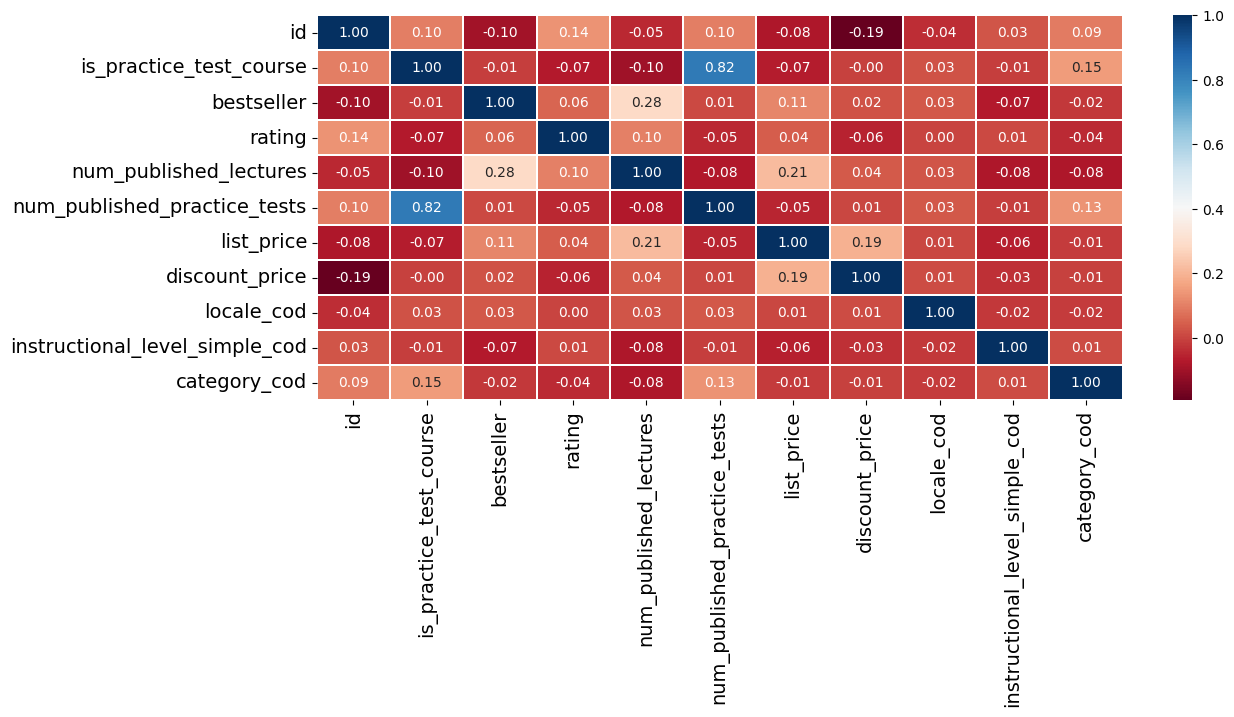

In [ ]:
# Heatmap de correlación
fig, ax = plt.subplots(figsize=[13,5])
sns.heatmap(df.corr(), ax=ax,  annot=True, linewidths=0.05, fmt= '.2f',cmap='RdBu')
ax.tick_params(axis='both', which='major', labelsize=14)
fig.show()

**Interpretación:**

- A simple vista las correlaciones no son muy fuertes entre las variables salvo para las variables en si misma y "num_published_practice_tests" con "is_practice_test_course". Es decir, que deberá considerarse un análisis más en detalle.

- Se observa que "num_published_practice_tests" tiene una alta correlación positiva con "is_practice_test_course". Es decir, que puede deducirse que los cursos en los que se practica exámentes tienen un número de pruebas de prácticas. Estas dos variables se pueden explicar en una sola.

- También se observa que "list_price" se relaciona positivamente con el "num_published_lectures" y "discount_price".

- Luego se observa que "bestseller" tiene mayor correlación (pero no muy elevado) con "num_published lectures" y "list_price" mientras que se relaciona de manera negativa con "instructional_level_simple_cod" (pero no muy significativamente).

- Se observa que "category" tiene correlación con "num_published_practice_tests" y "is_practice_test_cours".

- Se repara una correlación lineal directa pero débil entre "rating" y "num_published_lectures".



Ahora genera una lista ordenada de los coeficientes de correlación de Pearson entre la columna "bestseller" y el resto de columnas numéricas en el DataFrame df, omitiendo el coeficiente de correlación de la columna "bestseller" consigo misma.

In [ ]:
round(df.corr()['bestseller'].sort_values(ascending = False)[1:] ,2 )

<ipython-input-35-3f3588b53b94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(df.corr()['bestseller'].sort_values(ascending = False)[1:] ,2 )


num_published_lectures            0.28
list_price                        0.11
rating                            0.06
locale_cod                        0.03
discount_price                    0.02
num_published_practice_tests      0.01
is_practice_test_course          -0.01
category_cod                     -0.02
instructional_level_simple_cod   -0.07
id                               -0.10
Name: bestseller, dtype: float64

<ipython-input-37-ae650c9b4699>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = round(df.corr()['bestseller'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='blue' , figsize = (10,8))


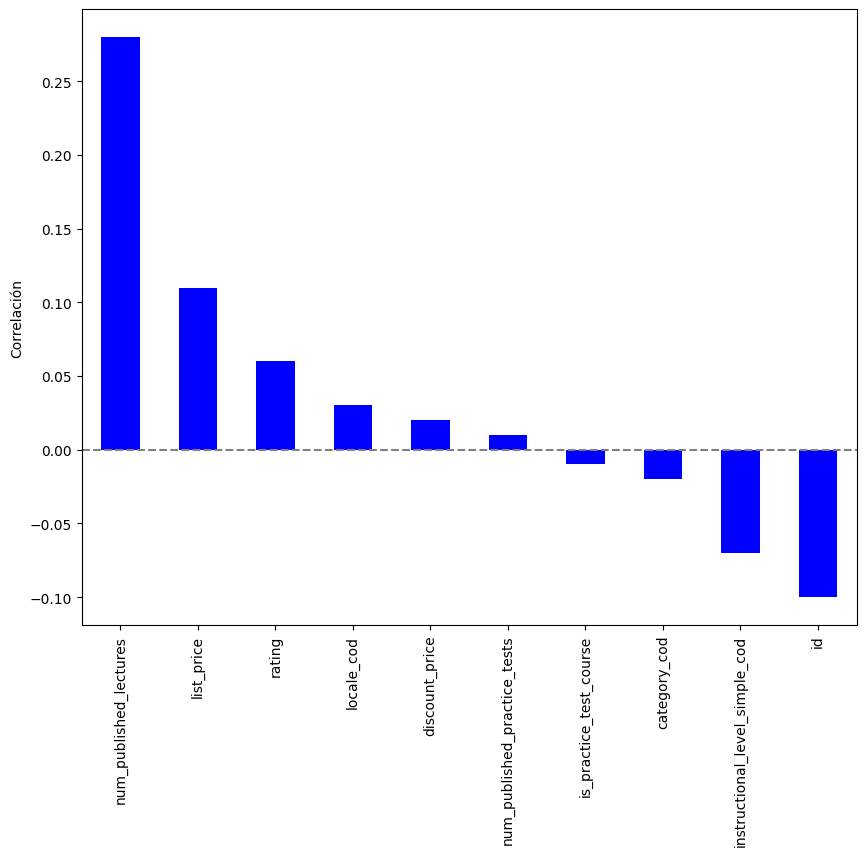

In [ ]:
# Gráfico de Correlación en el cual se visualizan las correlaciones de las variables con respecto a "bestseller"
ax = round(df.corr()['bestseller'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='blue' , figsize = (10,8))
ax.set_ylabel('Correlación')
ax.axhline(0,color='gray',linestyle='--')
plt.show()

**Interpretación:**



* **Correlaciones positivas:** Se visualiza una correlación positiva entre "bestseller" con respecto a "num_published_lectures", "list_price", "rating", "locale_cod", "discount_price", y "num_published_practice_tests".

* **Correlaciones negativas:** Se visualiza una correlación negativa entre "bestseller" con respecto a "is_practice_test_course", "category_cod" y "instructional_level_simple_cod".



<ipython-input-38-2f8556c34498>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = round(df.corr()['category_cod'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='blue' , figsize = (10,8))


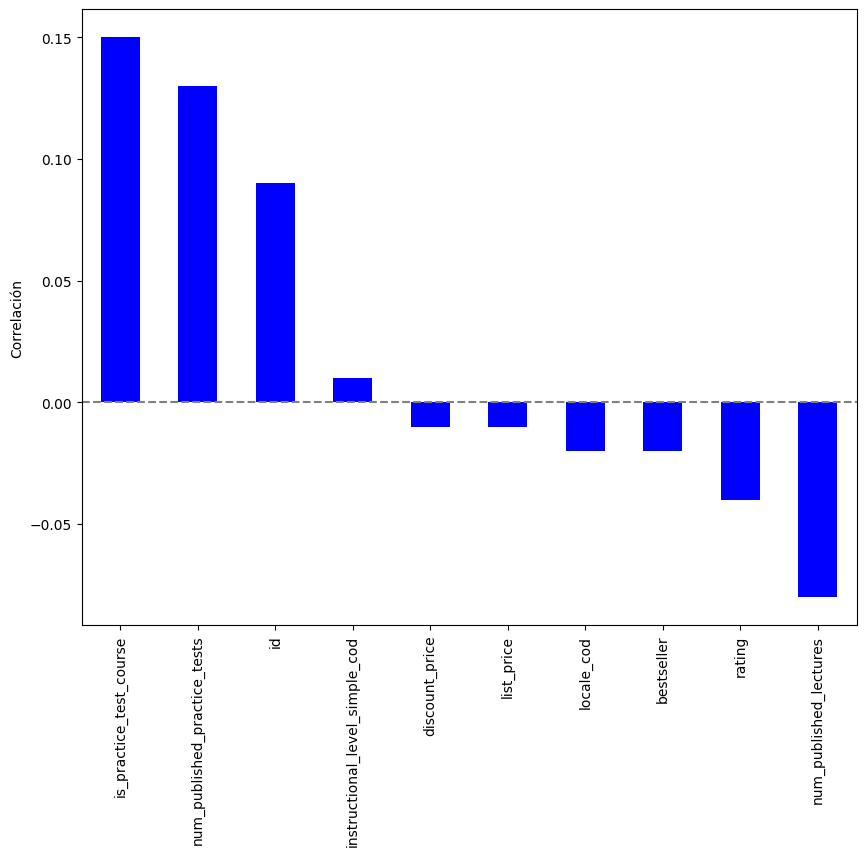

In [ ]:
#  Gráfico de Correlación en el cual se visualizan las correlaciones de las variables con respecto a "category_cod"

ax = round(df.corr()['category_cod'].sort_values(ascending = False)[1:] ,2 ).plot(kind = 'bar',color='blue' , figsize = (10,8))
ax.set_ylabel('Correlación')
ax.axhline(0,color='gray',linestyle='--')
plt.show()

**Interpretación:**



* **Correlaciones positivas:** Se visualiza una correlación positiva entre "category_cod" con respecto a "is_practice_test_course", "num_published_practice_tests" y "instructional_level_simple_cod".

* **Correlaciones negativas:** Se visualiza una correlación negativa entre "category_cod" con respecto a "discount_price", "list_price", "locale_cod", "bestseller", "rating" y "num_published_lectures".

#### **3.4.10. Asimetría**

In [ ]:
round(df.skew(numeric_only=True),4)

id                                0.0000
is_practice_test_course           7.3644
bestseller                        1.5142
rating                           -1.8766
num_published_lectures            4.4989
num_published_practice_tests      7.1056
list_price                        1.0835
discount_price                    4.9685
locale_cod                        0.6946
instructional_level_simple_cod    0.7979
category_cod                      0.1093
dtype: float64

**Interpretación:**

*   "Id" al ser las obsrvaciones es la única que posee simetría y por lo tanto una forma de distribución normal.
*   Todas las variables menos "rating" poseen asimetría a la derecha siendo sesgada la media aritmética por valores outliers altos (como se verifica en los gráficos de bloxpot).Se debe tomar como valor representativo otra medida de tendencia central como mediana o moda
*   En el caso de "rating" posee una asimetría negativa siendo influida su media aritmética por valores bajos.


#### **3.4.11. Curtosis**

In [ ]:
round(df.kurtosis(numeric_only=True),2)

id                                -1.20
is_practice_test_course           52.24
bestseller                         0.29
rating                             6.35
num_published_lectures            30.89
num_published_practice_tests      57.41
list_price                         1.05
discount_price                    30.12
locale_cod                         0.57
instructional_level_simple_cod    -0.26
category_cod                      -1.18
dtype: float64

**Interpretación:**
- Casi todas las variables son leptocúrticas siendo la curtosis más común en el conjunto de datos.
- Los desvìos son pequeños con respecto a la media.
- "Bestseller" tiende a una forma mesocúrtica lo cual indica una buena relación entre su media y desvío.

### **3.5. Gráficos**

Para continuar con el análisis exploratorio de datos se utilizarán diferentes tipos de gráficos aplicados a las distintas variables.

#### **3.5.1. Gráficos de Barras**

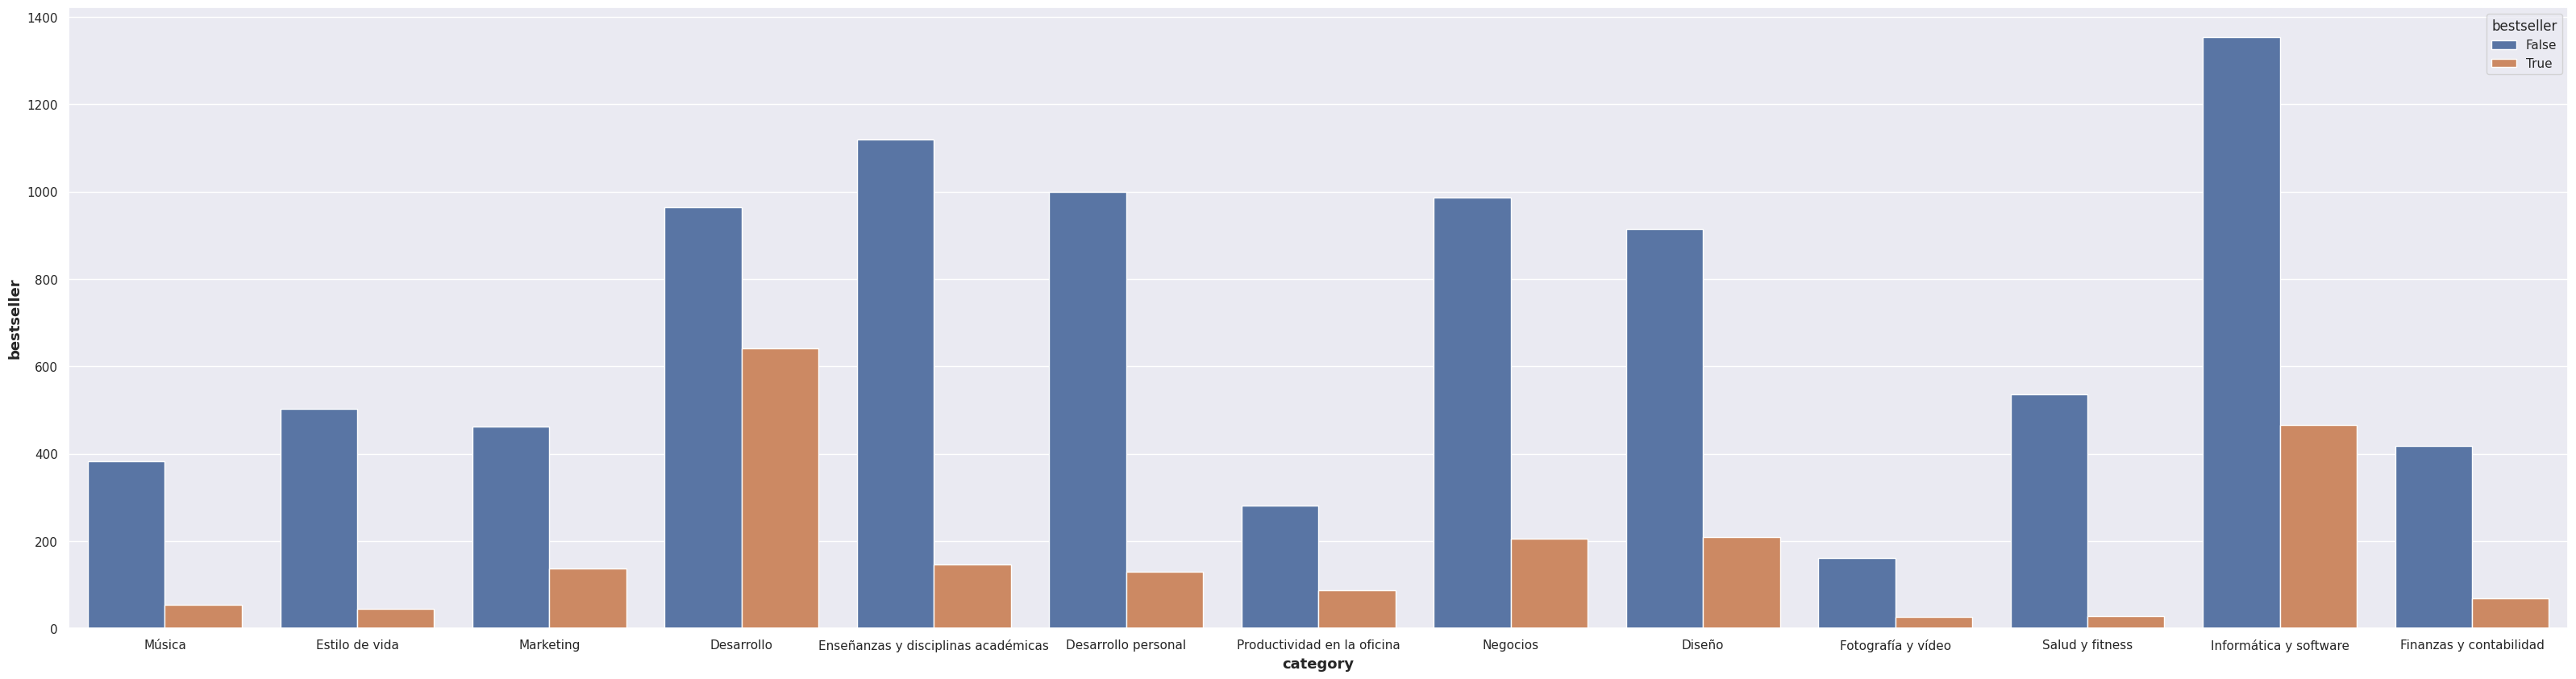

category                             bestseller
Desarrollo                           False          965
                                     True           641
Desarrollo personal                  False          999
                                     True           130
Diseño                               False          915
                                     True           209
Enseñanzas y disciplinas académicas  False         1119
                                     True           147
Estilo de vida                       False          502
                                     True            45
Finanzas y contabilidad              False          418
                                     True            69
Fotografía y vídeo                   False          162
                                     True            26
Informática y software               False         1354
                                     True           465
Marketing                            False          462


In [ ]:
# Gráfico de barras de las variables "category" y "bestseller"
plt.figure(figsize=(40,10))
sns.set_theme()
ax=sns.countplot(x="category",hue="bestseller",data=df)
ax.set_xlabel("category",fontsize=13,weight="bold")
ax.set_ylabel("bestseller",fontsize=13,weight="bold")
plt.show()

print(df.groupby("category")["bestseller"].value_counts())

**Interpretación**:

Se puede observar que en términos relativos el curso de mayór éxito son los de **desarrollo e Informática y software** , mientras que **enseñanzas y disciplinas académicas, estilo de vida, música,desarrollo personal, salud y fitness, fotografía y video** no lo son.

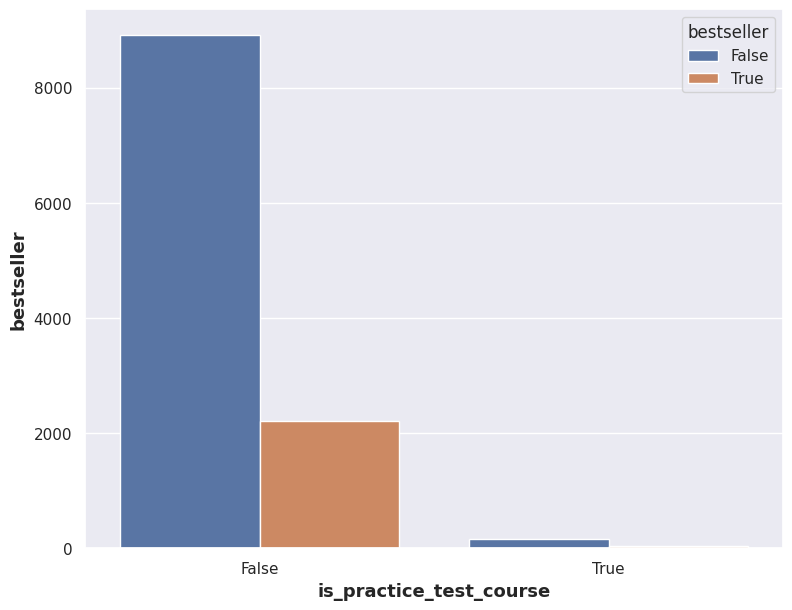

is_practice_test_course  bestseller
False                    False         8917
                         True          2211
True                     False          164
                         True            34
Name: bestseller, dtype: int64


In [ ]:
# Gráfico de barras de las variables "is_practice_test_course" y "bestseller"
plt.figure(figsize=(9,7))
sns.set_theme()
ax=sns.countplot(x="is_practice_test_course",hue="bestseller",data=df)
ax.set_xlabel("is_practice_test_course",fontsize=13,weight="bold")
ax.set_ylabel("bestseller",fontsize=13,weight="bold")
plt.show()

print(df.groupby("is_practice_test_course")["bestseller"].value_counts())

**Interpretación:**

Se observa que el porcentaje de éxito de un curso es del 20 % sino tiene test de avaluación mientras que es del 17 % si tiene instancias evaluativas.

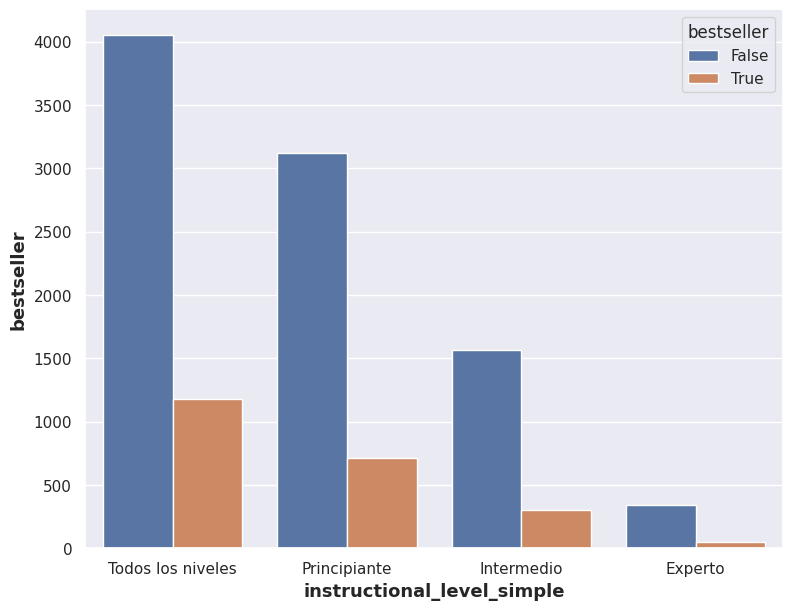

instructional_level_simple  bestseller
Experto                     False          343
                            True            52
Intermedio                  False         1564
                            True           299
Principiante                False         3117
                            True           713
Todos los niveles           False         4053
                            True          1180
Name: bestseller, dtype: int64


In [ ]:
# Gráfico de barras de las variables "instructional_level_simple" y "bestseller"
plt.figure(figsize=(9,7))
sns.set_theme()
ax=sns.countplot(x="instructional_level_simple",hue="bestseller",data=df)
ax.set_xlabel("instructional_level_simple",fontsize=13,weight="bold")
ax.set_ylabel("bestseller",fontsize=13,weight="bold")
plt.show()

print(df.groupby("instructional_level_simple")["bestseller"].value_counts())

**Interpretación:**

Se observa que "Todos los niveles" tiene un 22.50 % de éxito, "Principiante" un 19 %, "Intermedio" un 16 % y "Experto"  13 %.

#### **3.5.2. Gráficos Boxplot**

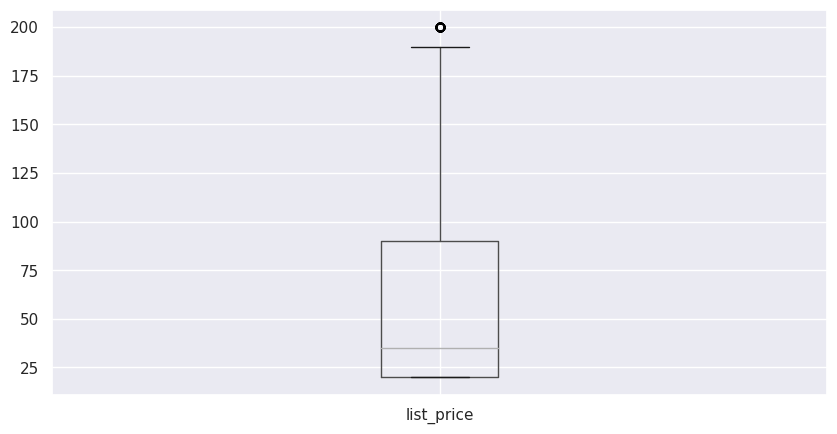

In [ ]:
# Gráfico de Boxplot de la variable "list_price"
ax = df.boxplot(column=["list_price"], figsize=(10, 5))


**Interpretación:**

- La lista de precios posee outliers de valor aproximado a $200.

- La mayoría de los valores están comprendidos entre 24 y $80.

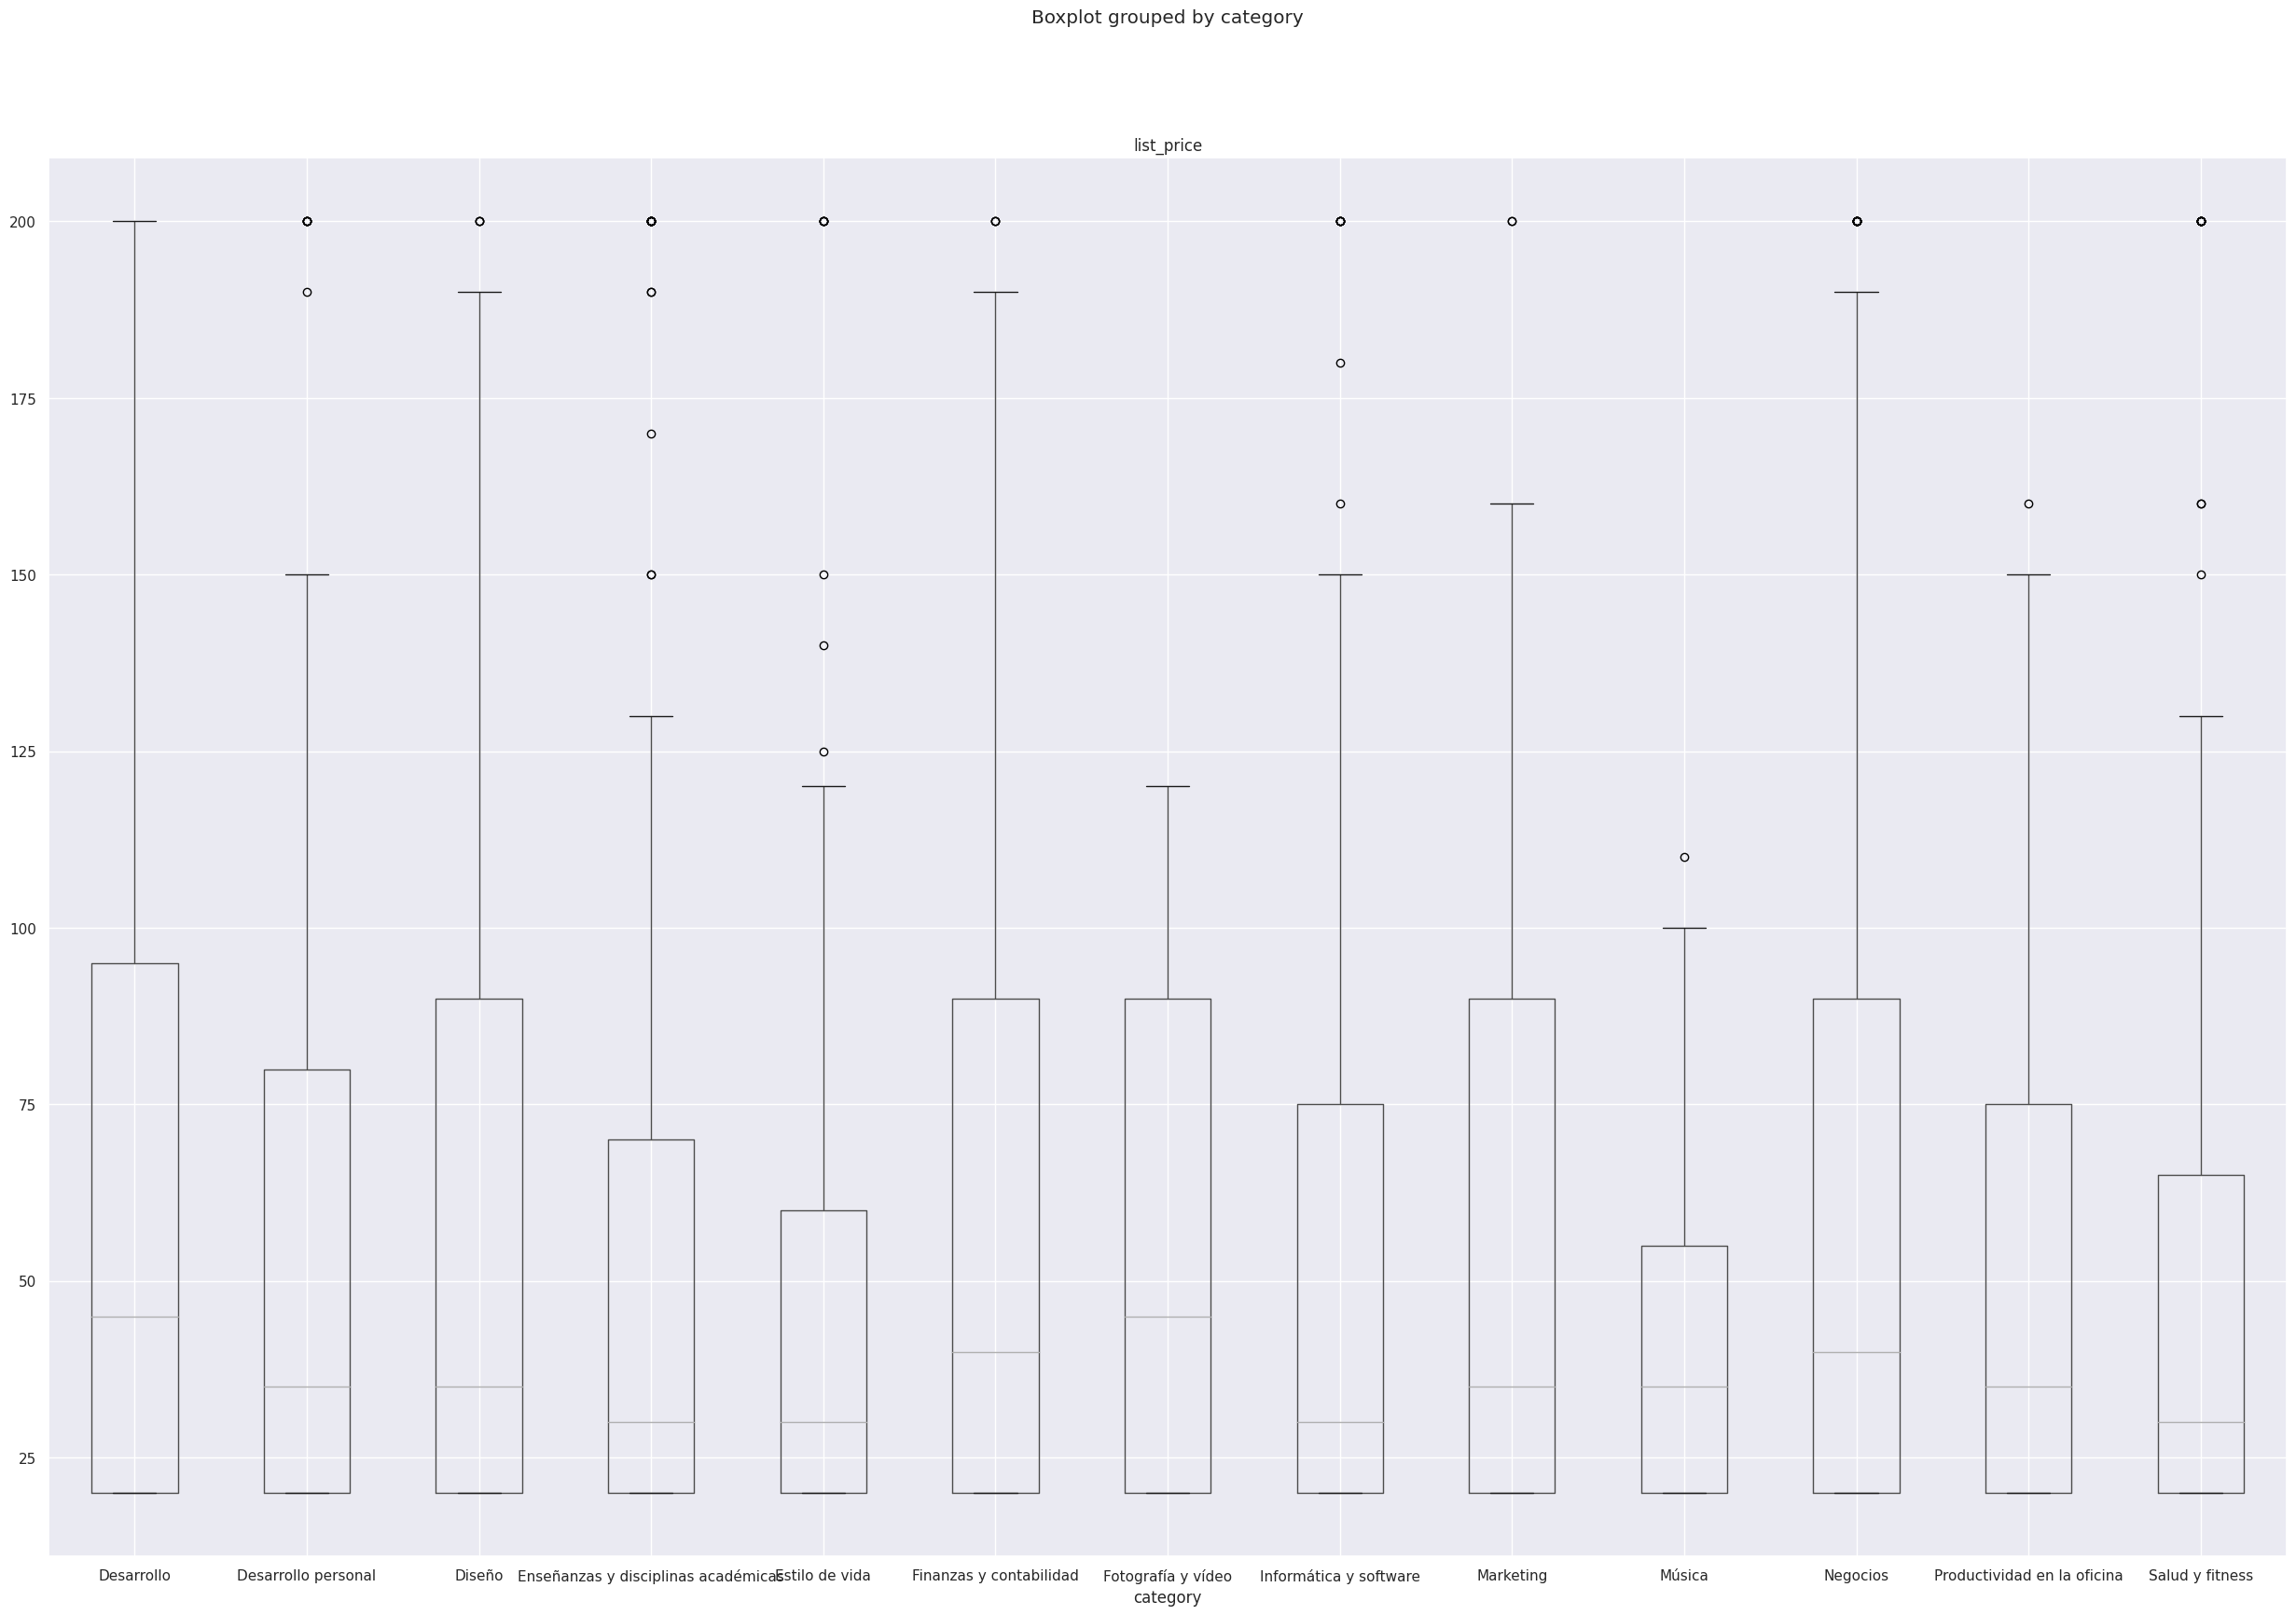

In [ ]:
# Gráfico de Boxplot de las variables "list_price" y "category"
ax = df.boxplot(column=["list_price"], by="category", figsize=(30, 20))


**Interpretación:**

* "Desarrollo", "Fotografía y vídeo" no poseen outliers con respecto a su precio.
* "Desarrollo Personal", "Diseño", "Finanzas y Contabilidad", "Marketing" y "Negocios" poseen los outliers más elevados.
* En "Música" y "Estilo de vida" los precios son más bajos ya que posee los  outliers menores de todas las categorías.

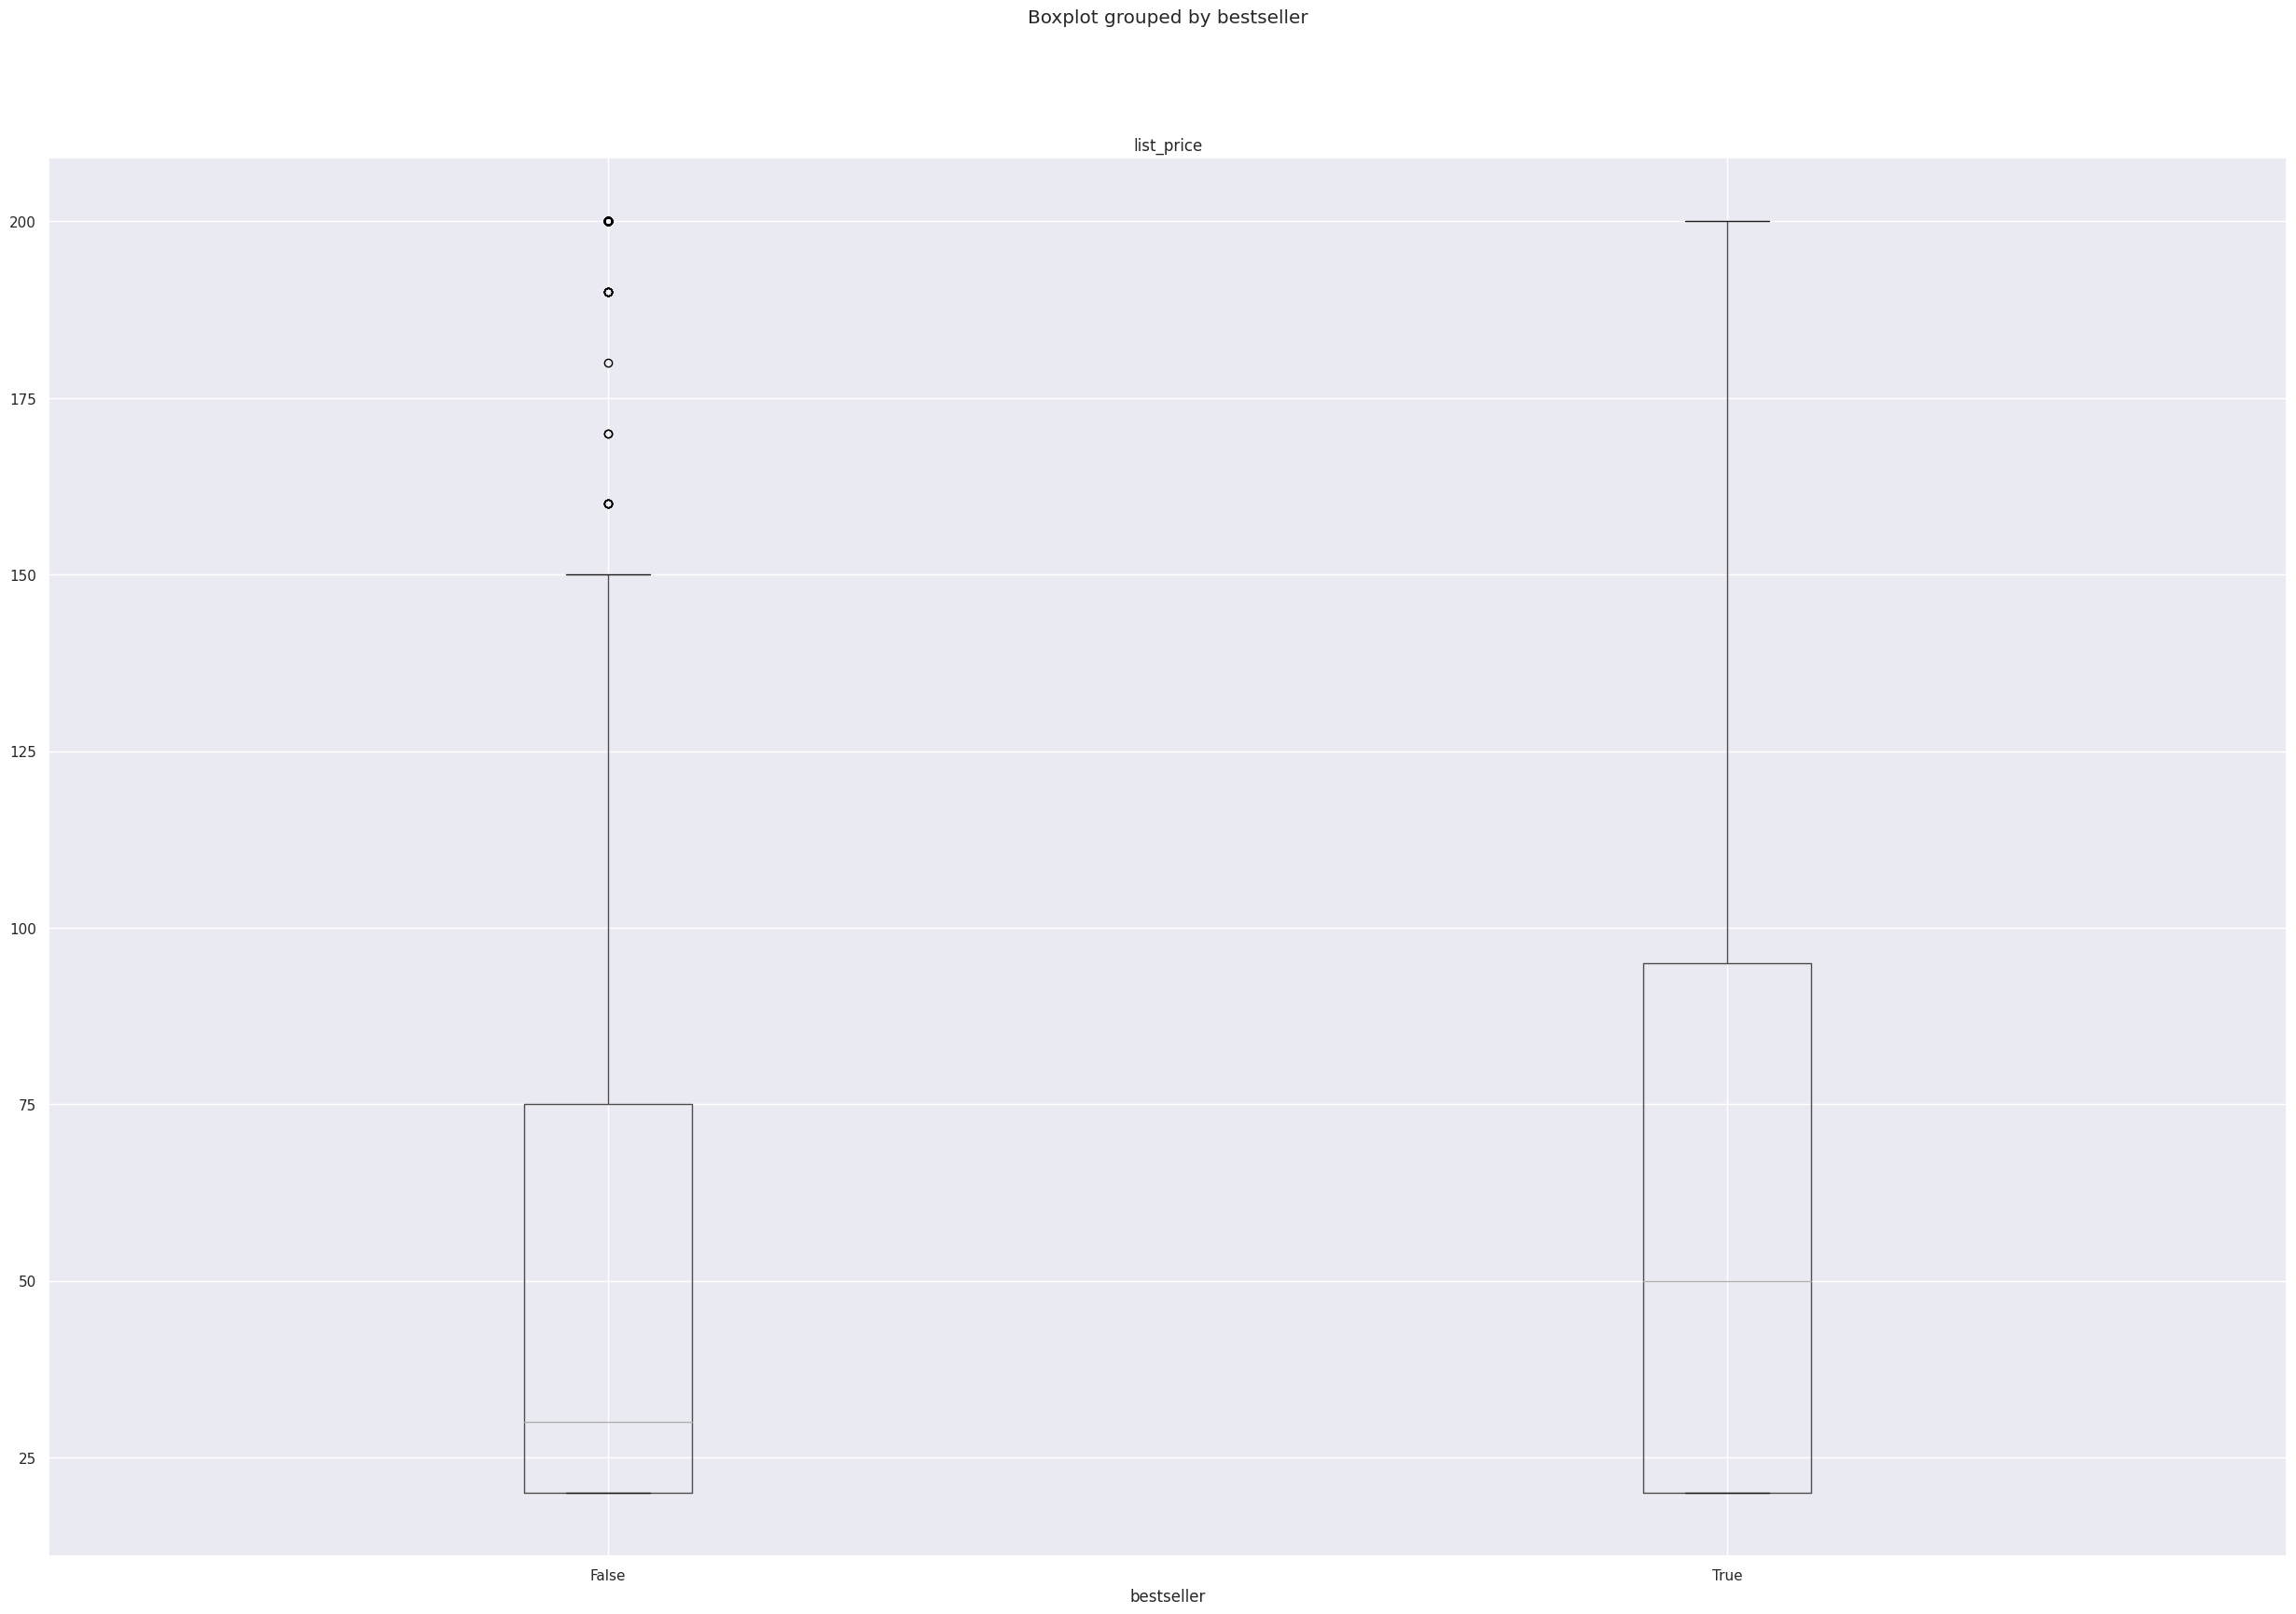

In [ ]:
# Gráfico de Boxplot de las variables "list_price" y "bestseller"
ax = df.boxplot(column=["list_price"], by="bestseller", figsize=(30, 20))

**Interpretación:**



- En el conjunto de datos se distingue que en el caso de los precios de cursos que fueron exitosos no existen outliers.
- En el caso de que el curso NO haya sido un bestseller ya son outliers precios superiores a 150.



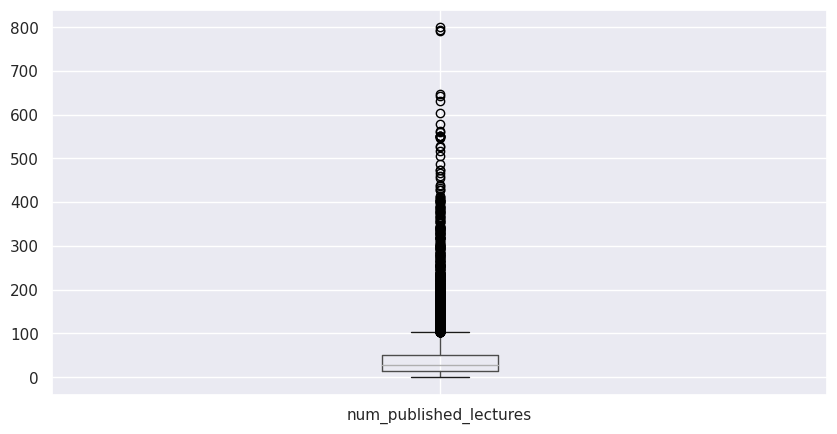

In [ ]:
# Gráfico de Boxplot de la variable "num_published_lectures"
ax = df.boxplot(column=["num_published_lectures"], figsize=(10, 5))

**Interpretación:**

- La cantidad de clases es una variable con gran cantidad de outliers. Los outliers comienzan aproximadamente a partir de una cantidad de clases > 100.

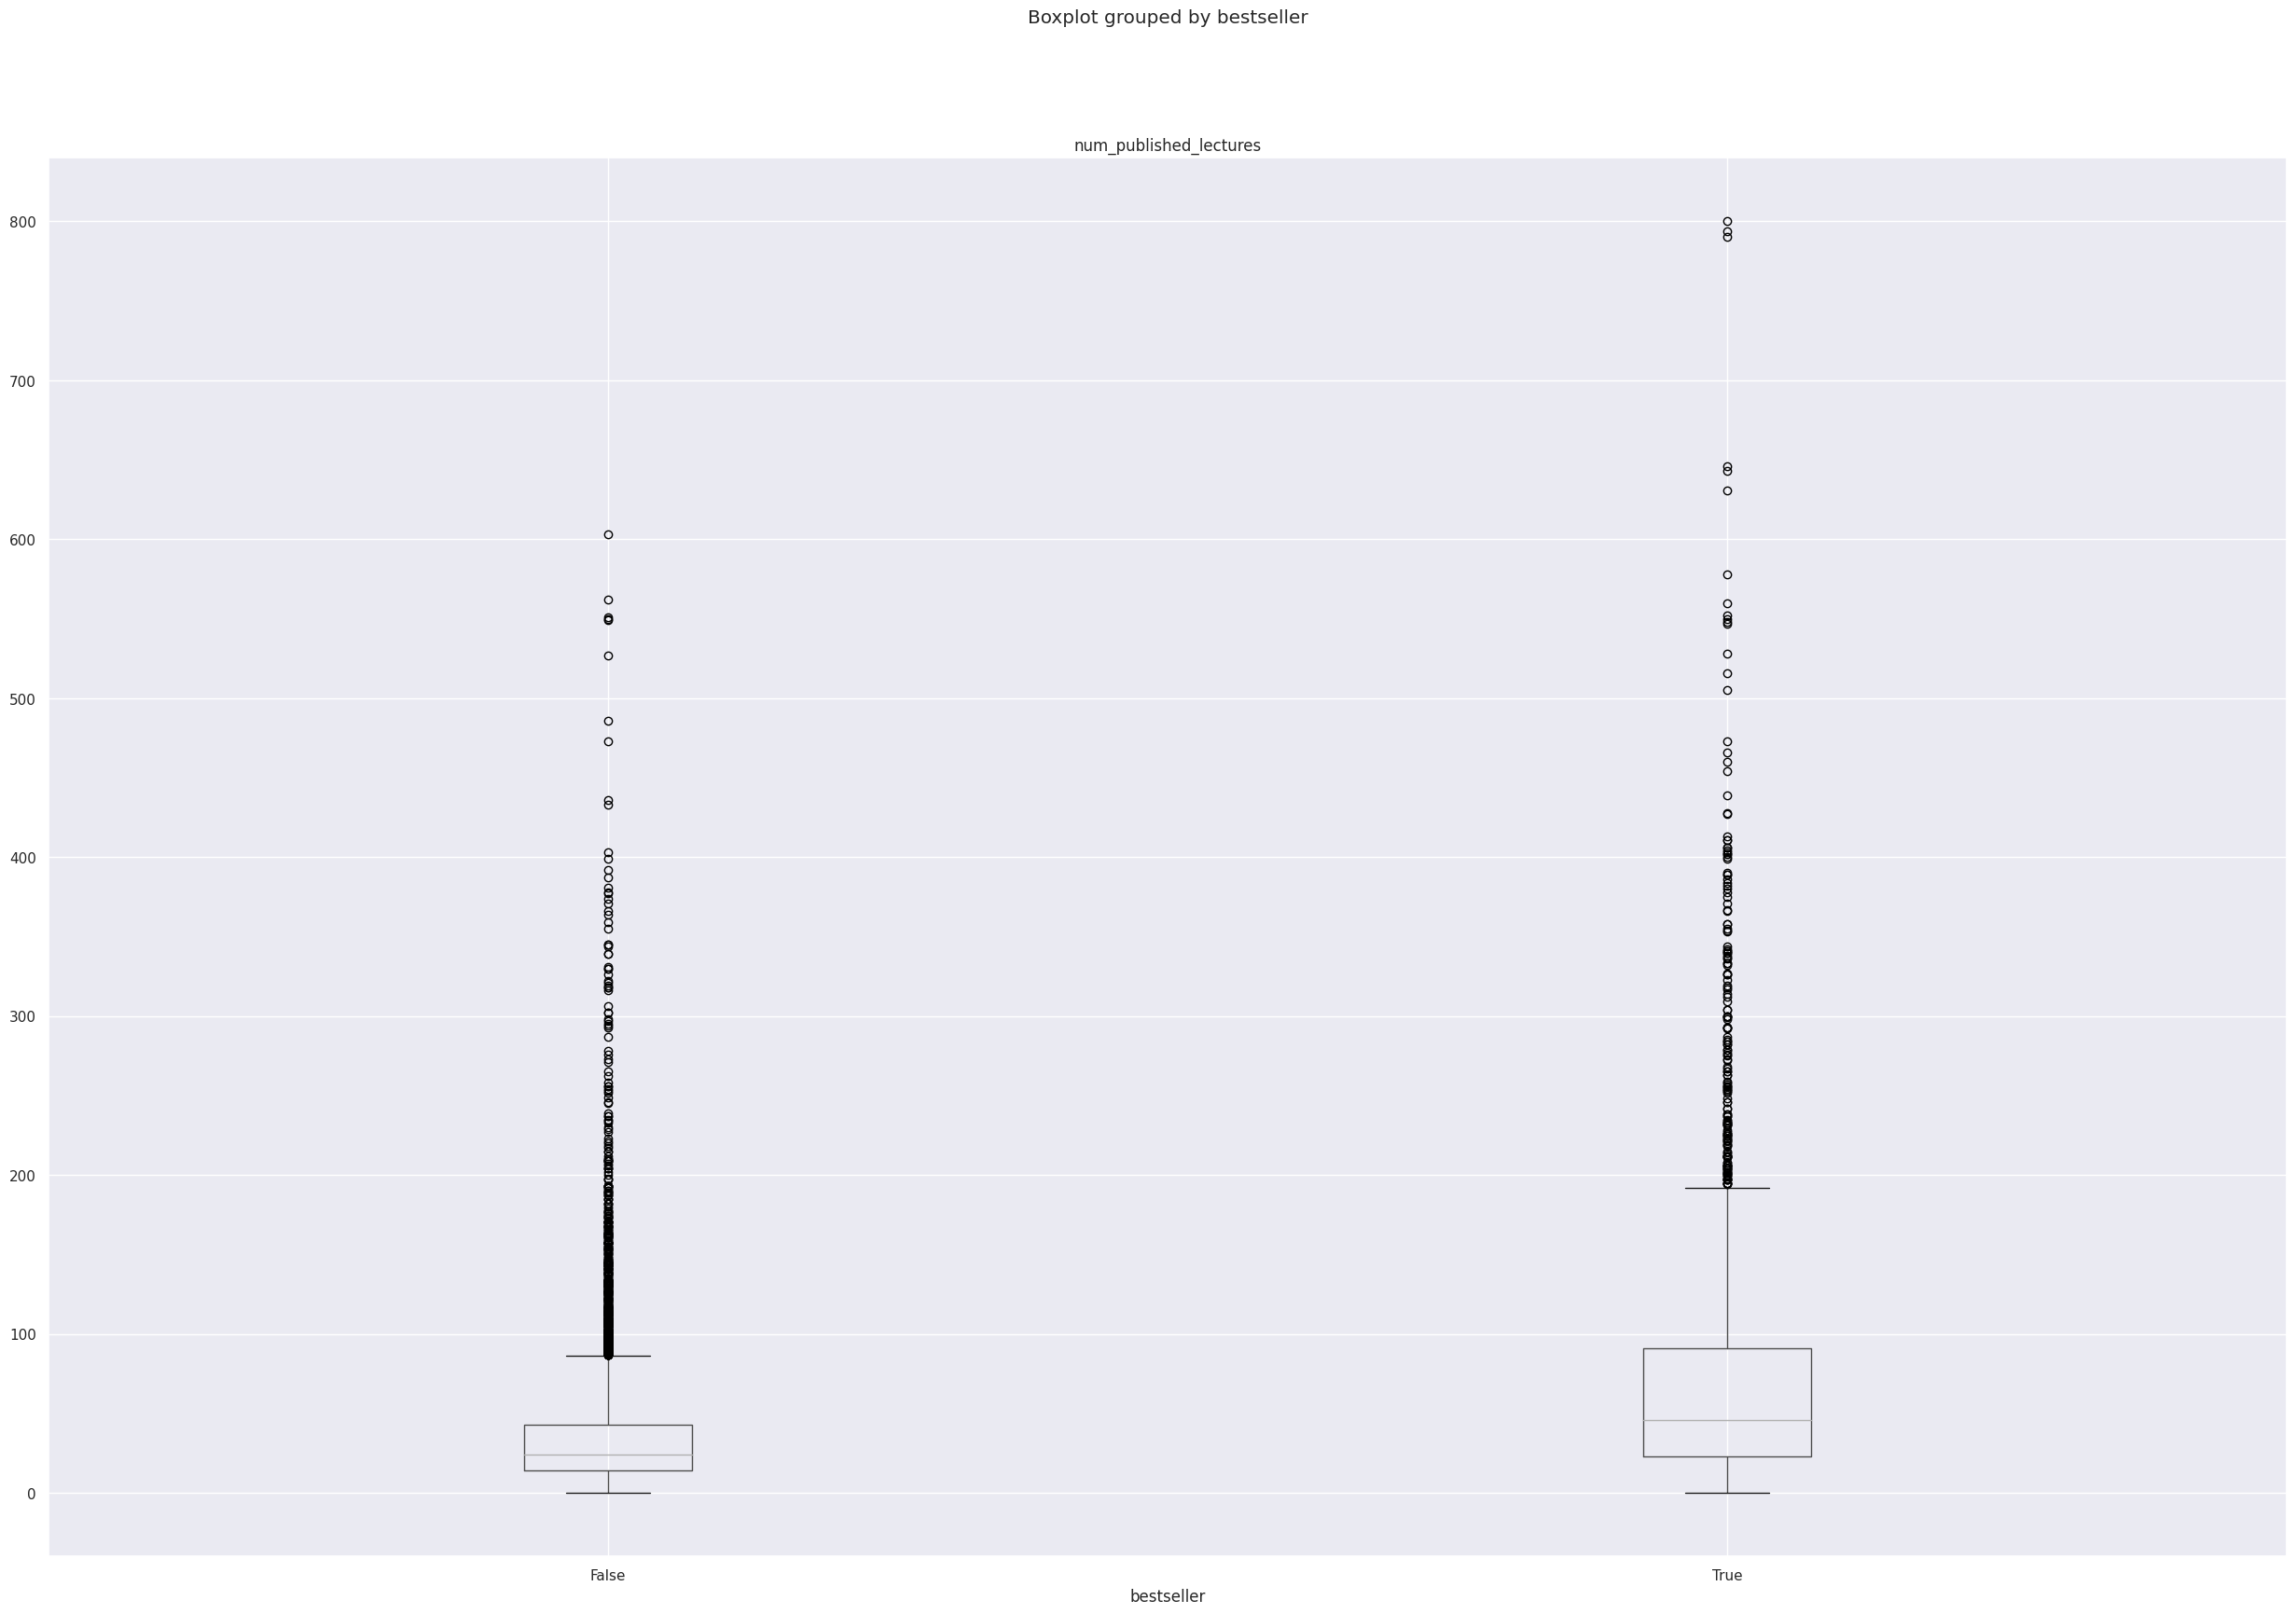

In [ ]:
# Gráfico de Boxplot de las variables "num_published_lectures" y "bestseller"
ax = df.boxplot(column=["num_published_lectures"], by="bestseller", figsize=(30, 20))

**Interpretación:**

* Se puede visualizar outliers en "cantidad de clases" tanto para un "bestseller true" como para un "bestseller false". En el primer caso los outliers comienzan cercano a 200 , en cambio en el segundo caso ya comienzan a partir de los 100.

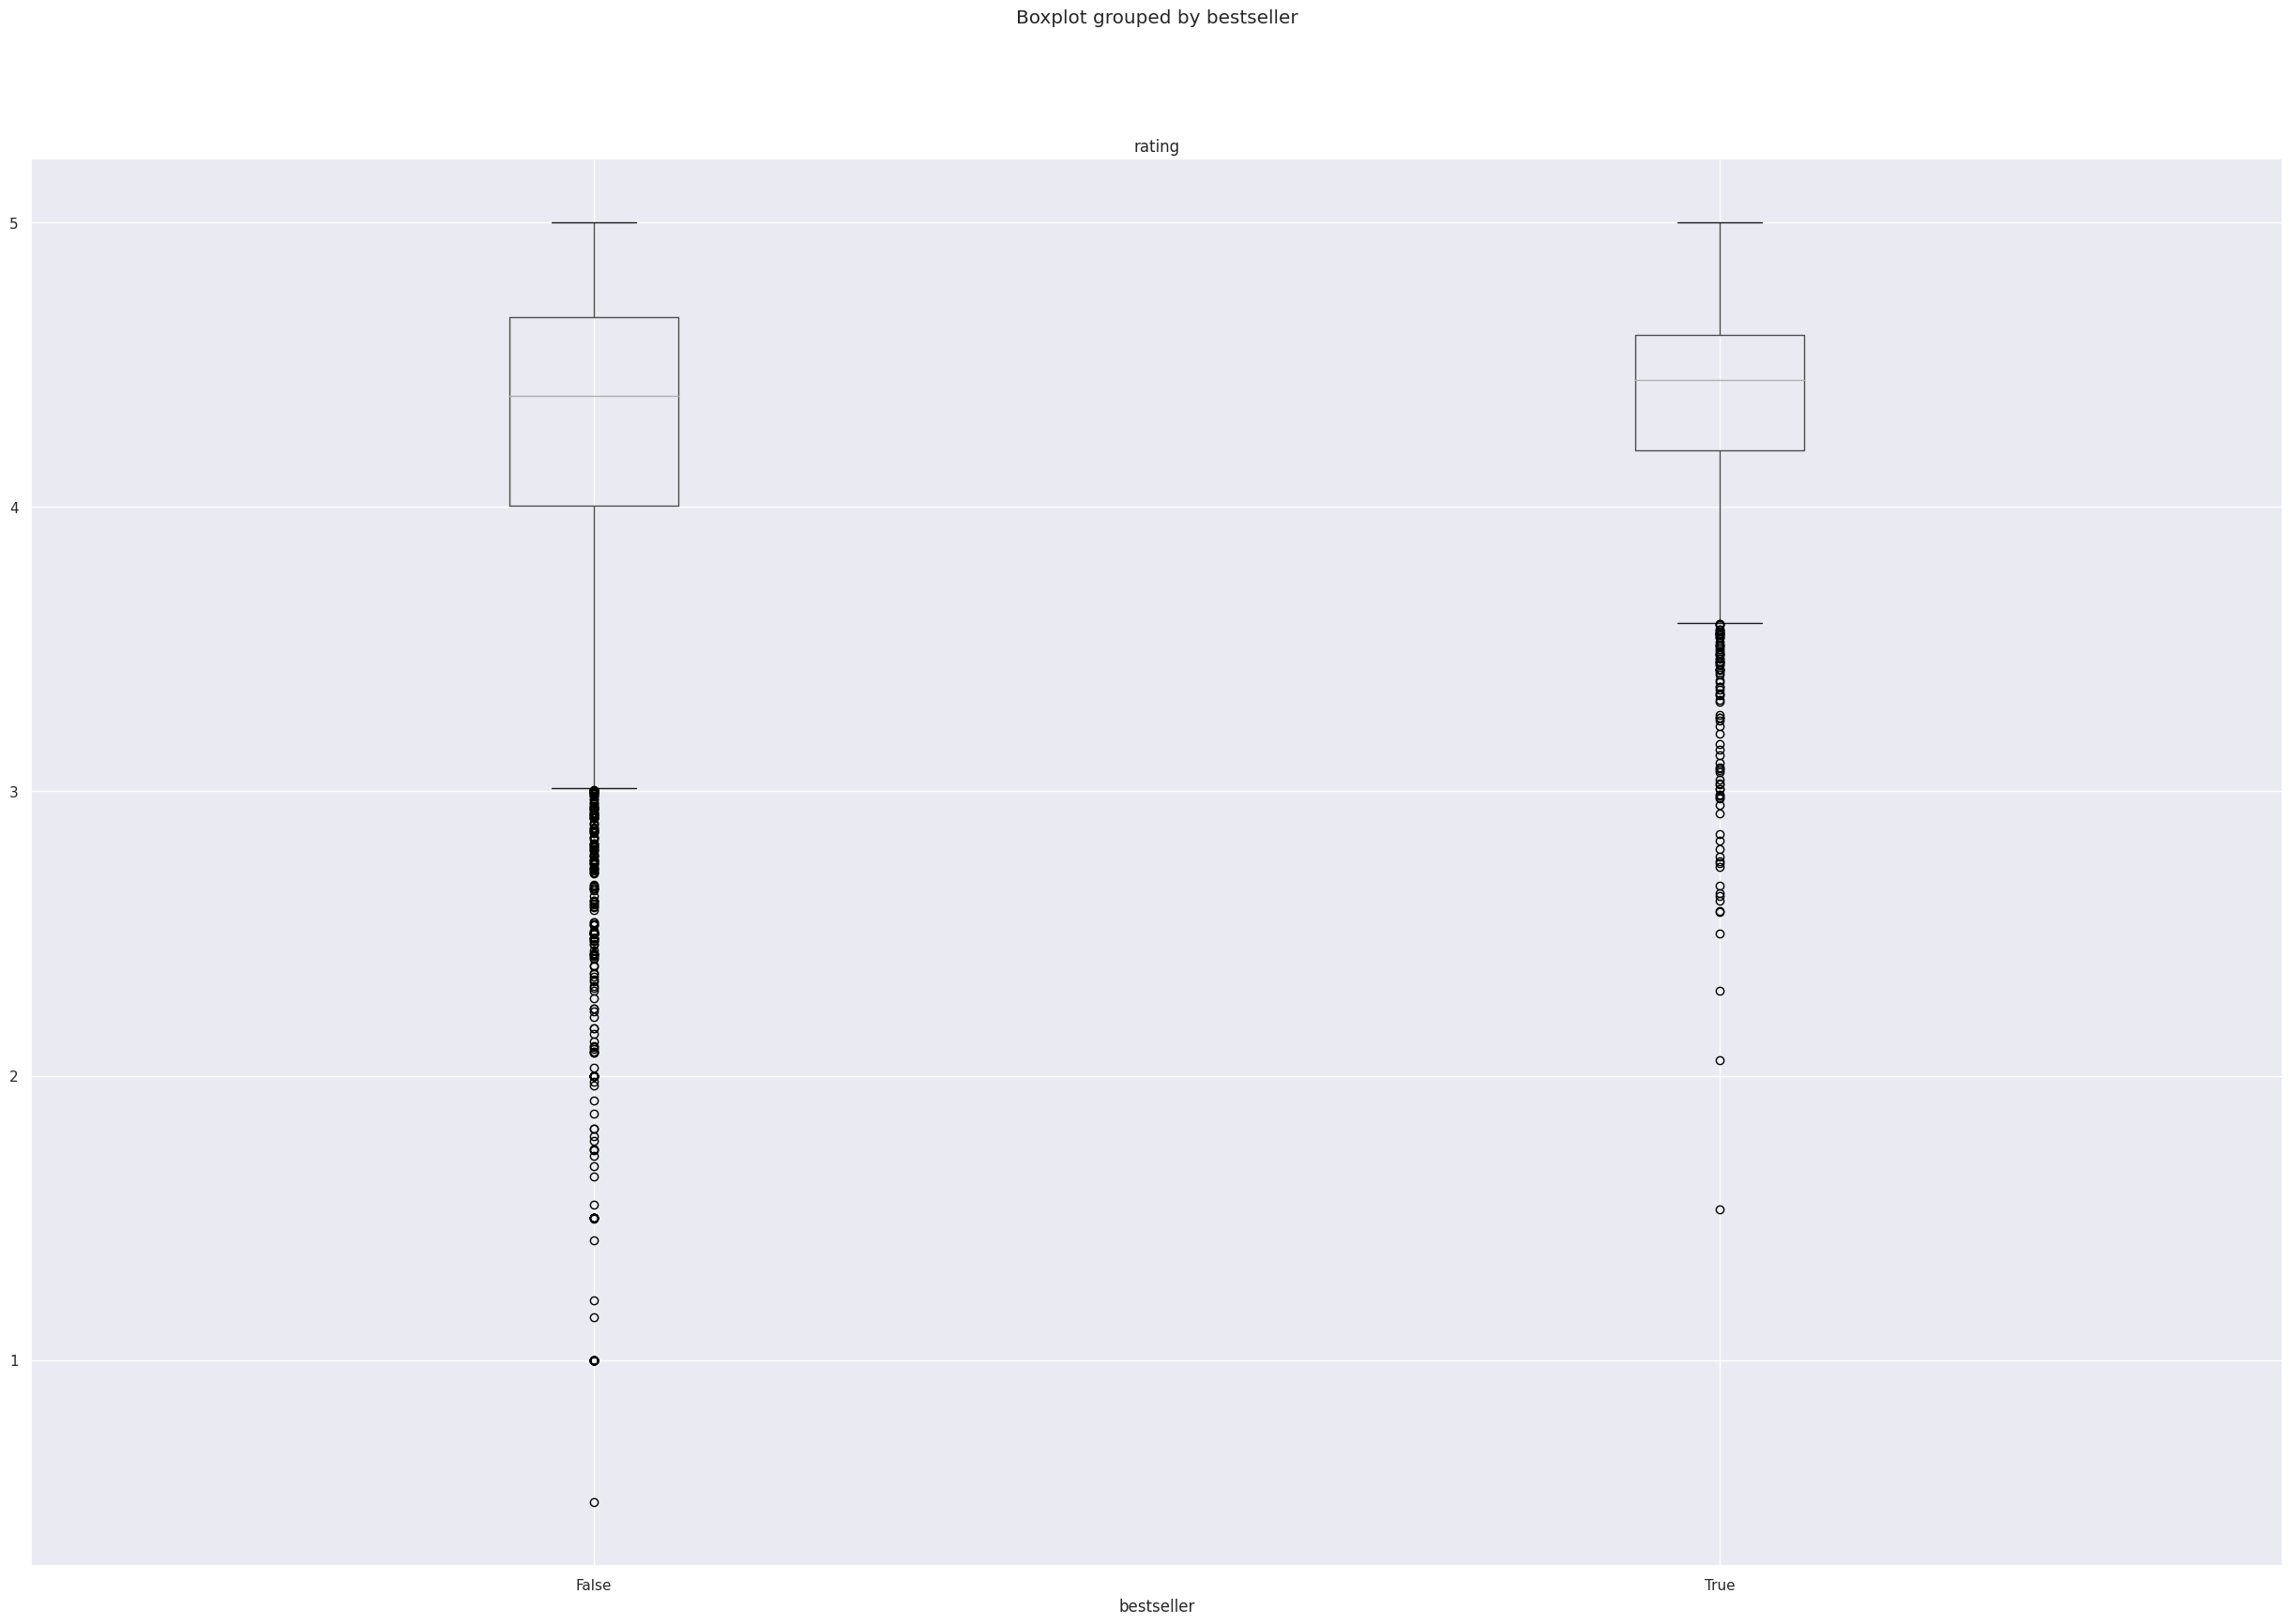

In [ ]:
# Gráfico de Boxplot de las variables "rating" y "bestseller"
ax = df.boxplot(column=["rating"], by="bestseller", figsize=(30, 20))

**Interpretación:**

- Existen outliers con respecto al "rating" tanto si el cursos fue un "bestseller true" (aprox. <3,5) , como si fue un "bestseller false" (aprox <3).
- Se puede observar que los outliers toman valores inferiores con respecto a los valores normales de la variable.

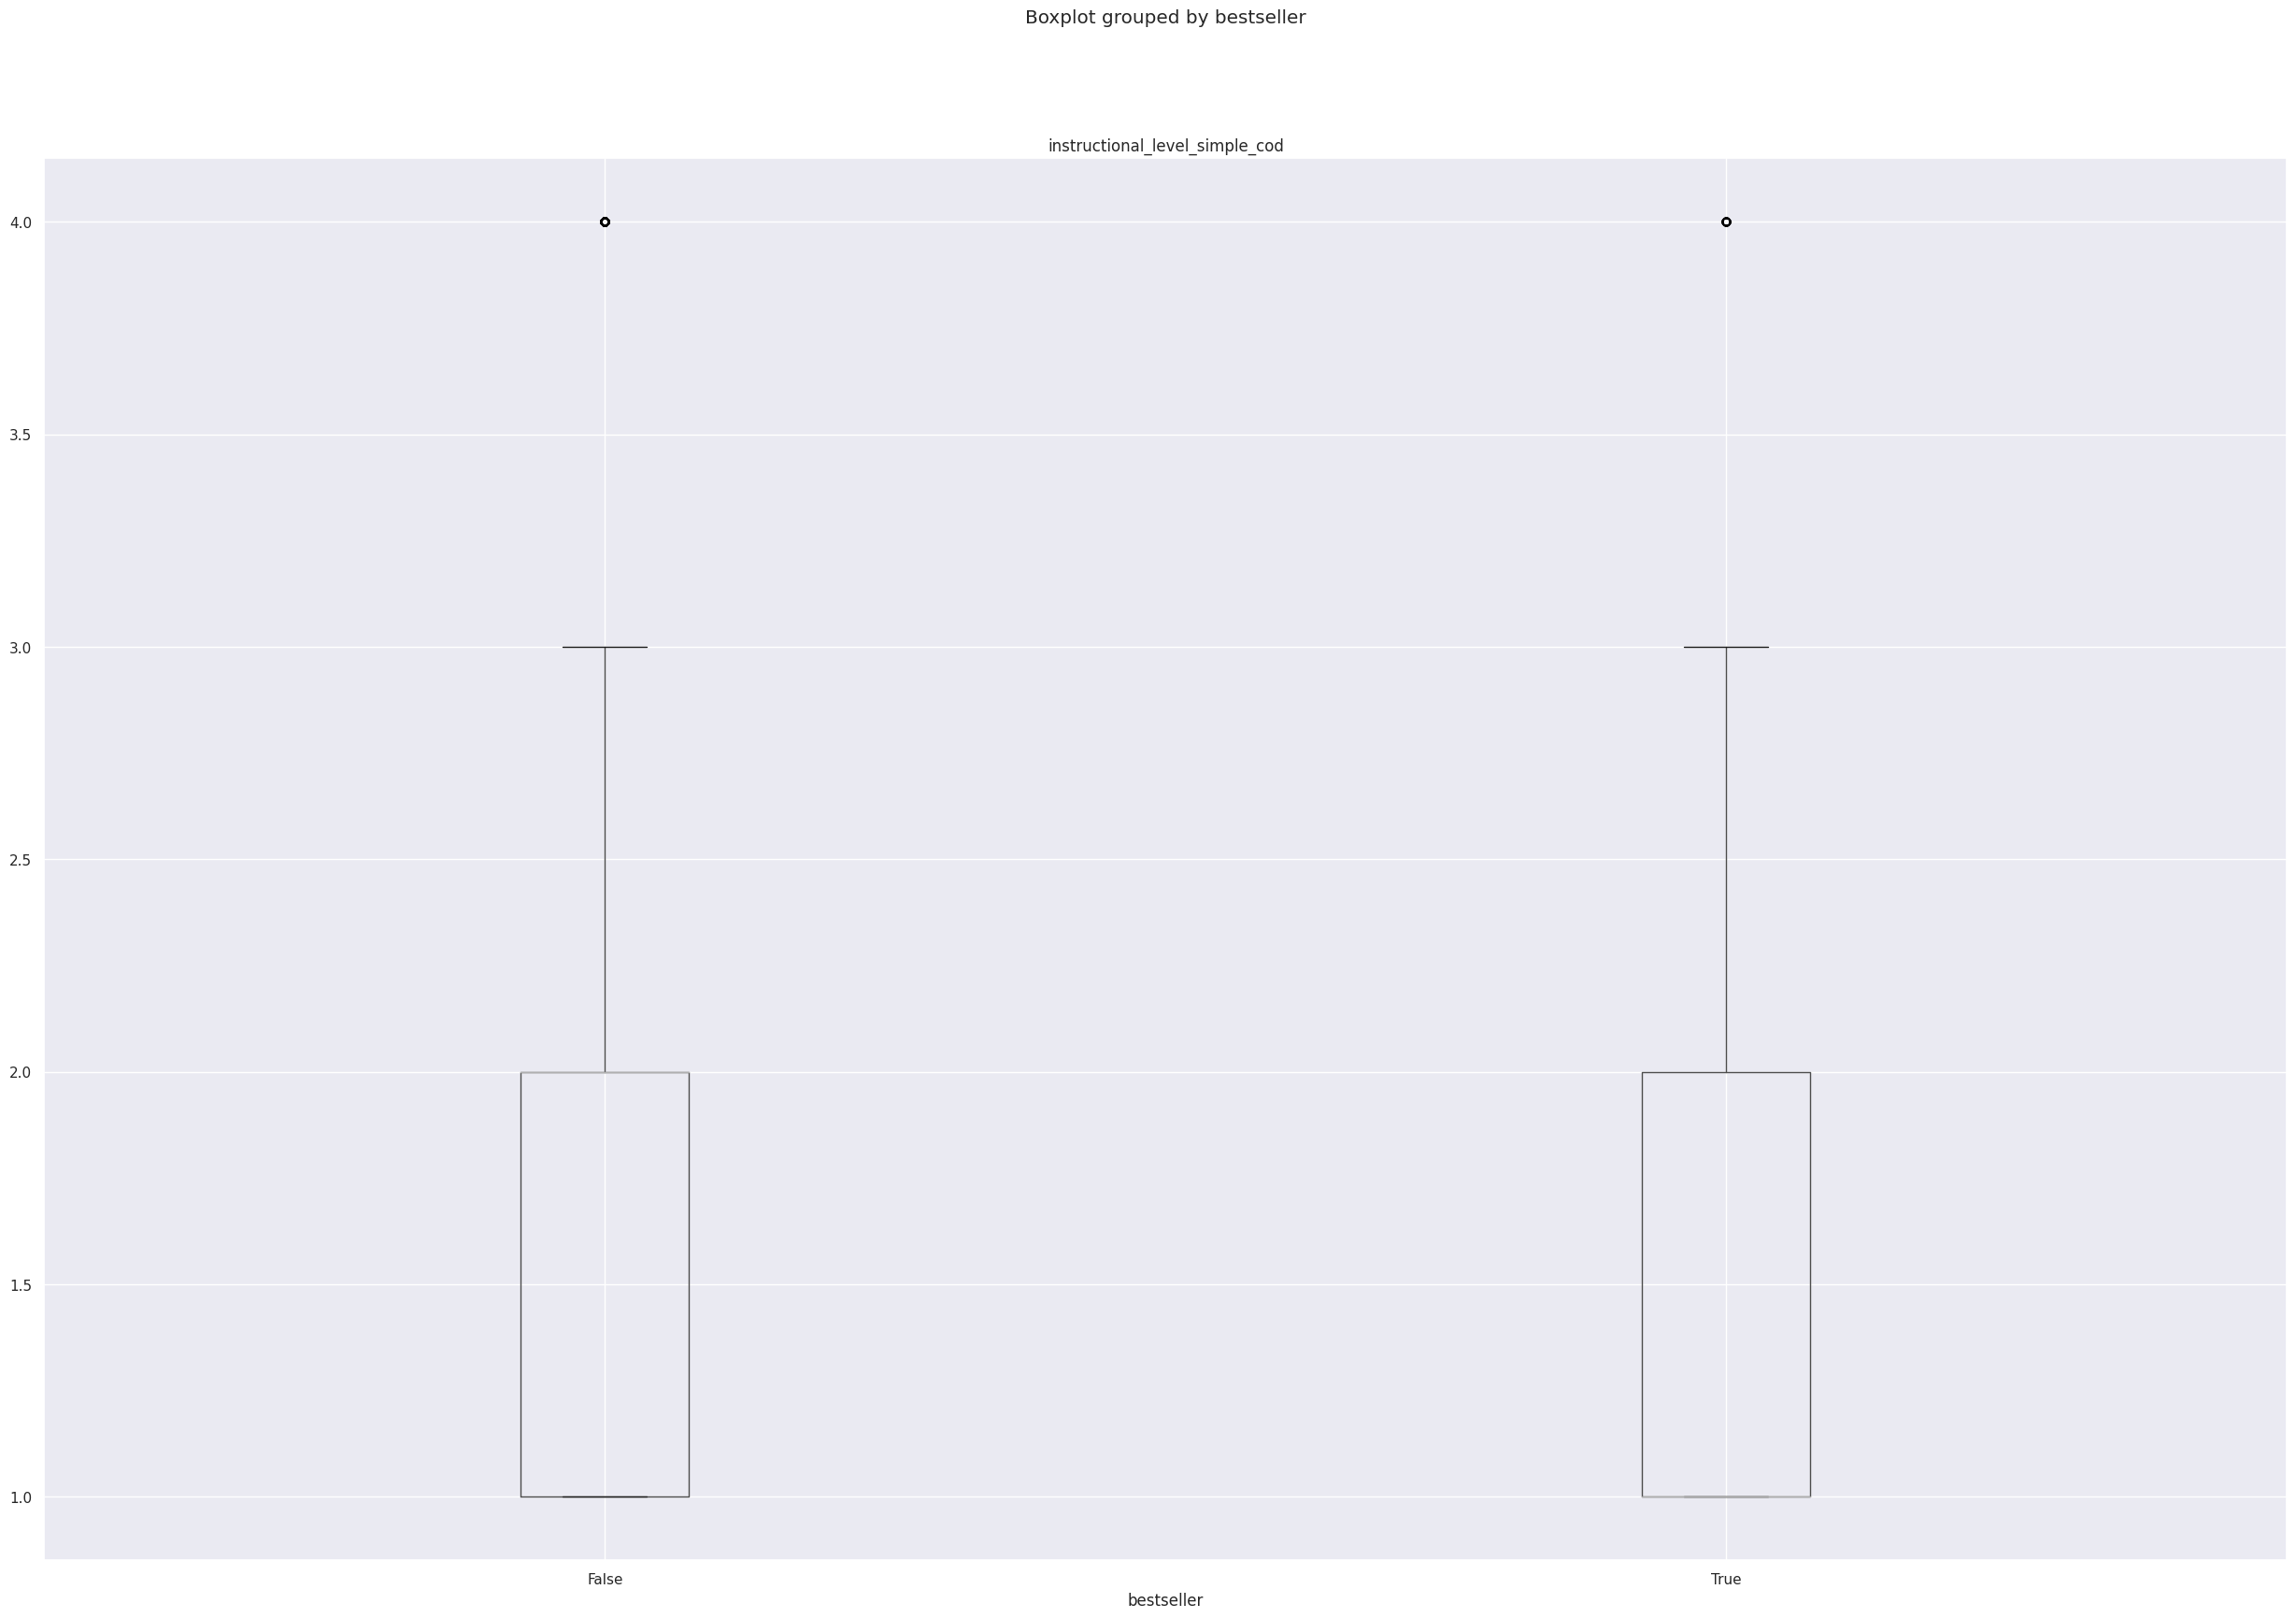

In [ ]:
# Gráfico de Boxplot de las variables "instructional_level_simple_cod" y "bestseller"
ax = df.boxplot(column=["instructional_level_simple_cod"], by="bestseller", figsize=(30, 20))

**Interpretación:**

- Existen outliers en el nivel de instrucción requerido para los diferentes cursos, tanto si fue un éxito como sino. El outlier se marca en "4" , que según la codificación realizada correspone al nivel  de requerimiento de "Experto".

#### **3.5.3. Gráficos Histogramas**

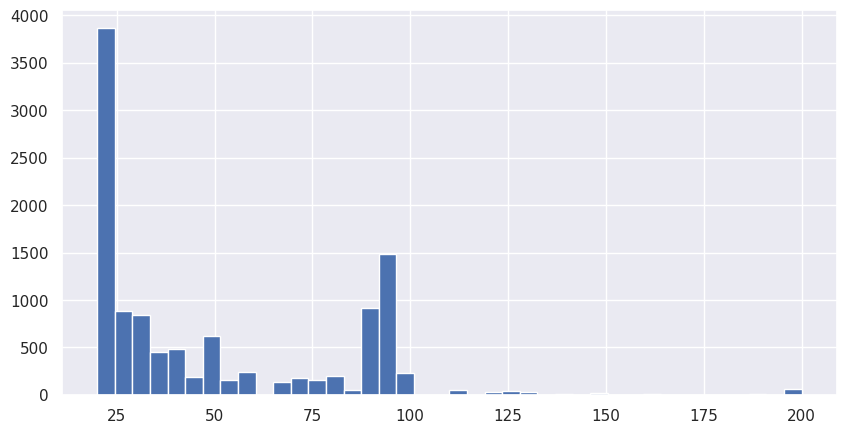

In [ ]:
# Gráfico Histograma de la variable "list_price"
ax = df["list_price"].hist(figsize=(10, 5), bins=40)

**Interpretación:**

- En el histograma de "list_price" se observa una forma asímétrica hacia la derecha.
- Existe una concentración de observaciones entre los cursos con precio de 75 a 100.
- La mayor concentración de cantidad de cursos poseen un precio menor a 25.

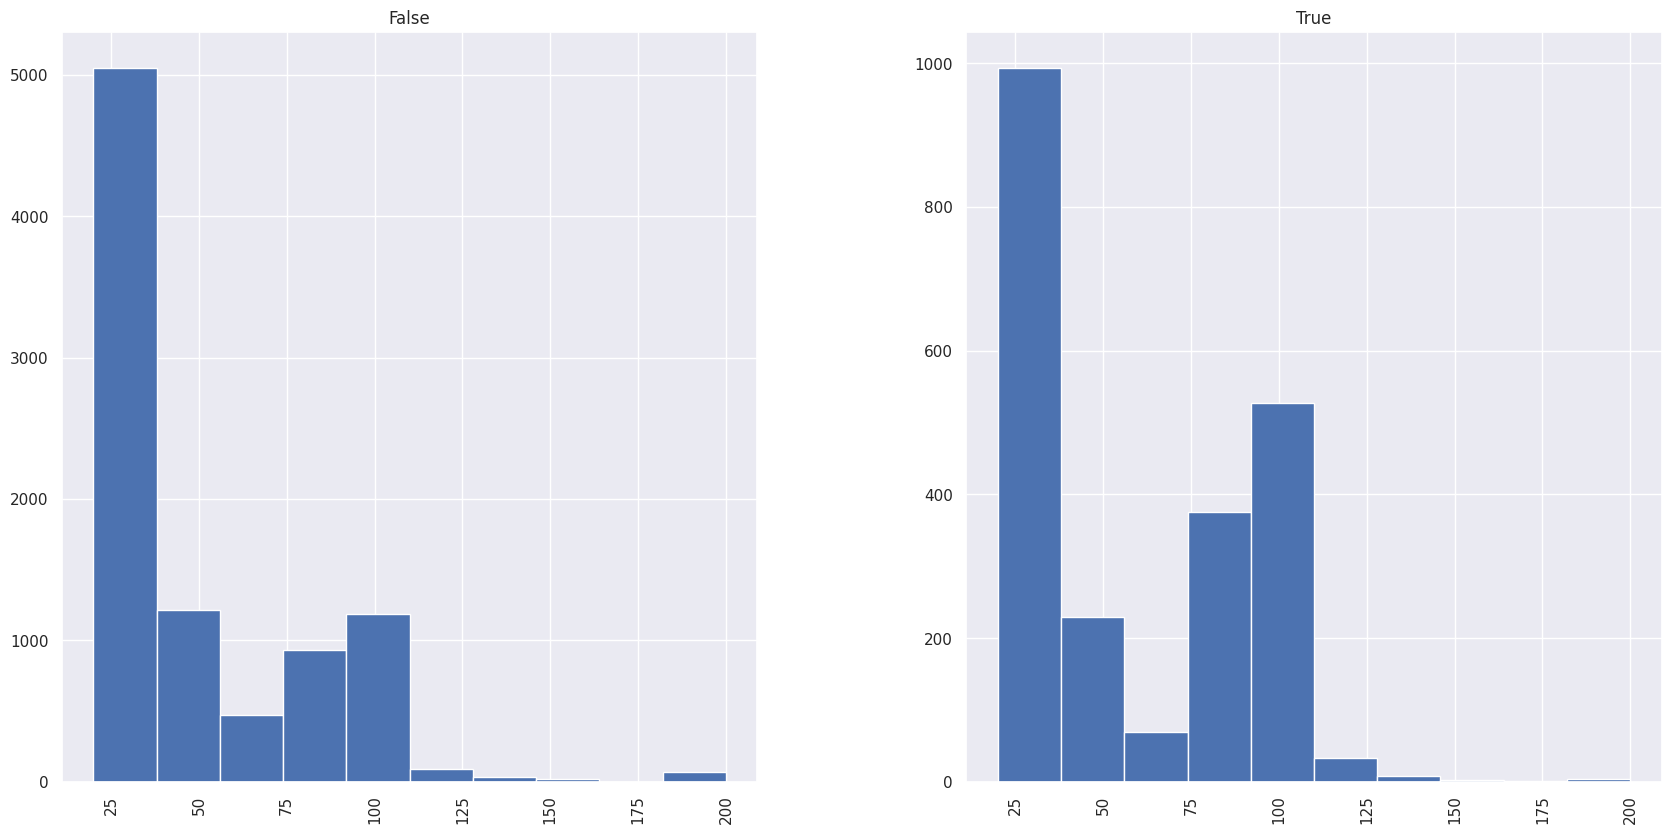

In [ ]:
# Gráfico Histograma de las variables "list_price" y "bestseller"
ax = df.hist(column="list_price", by="bestseller", bins=10, figsize=(20, 10))

**Interpretación:**

- Tanto para "bestseller true" y " bestseller false" se observan formas similares de asímetria hacia la derecha.

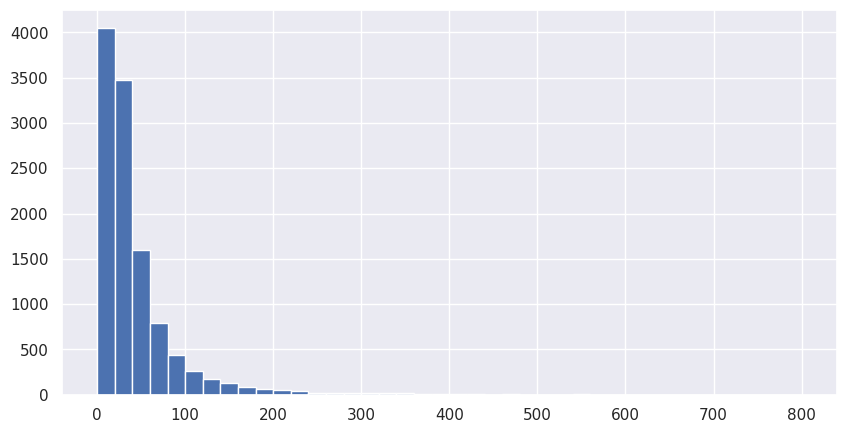

In [ ]:
# Gráfico Histograma de la variable "num_published_lectures"
ax = df["num_published_lectures"].hist(figsize=(10, 5), bins=40)

**Interpretación:**

- Se puede observar en el histograma como la distribución de datos presenta una forma asimétirca hacia la derecha. Concentrando la mayor cantidad de datos entre 0 y 100 clases.
- Posee una forma leptocúrtica.

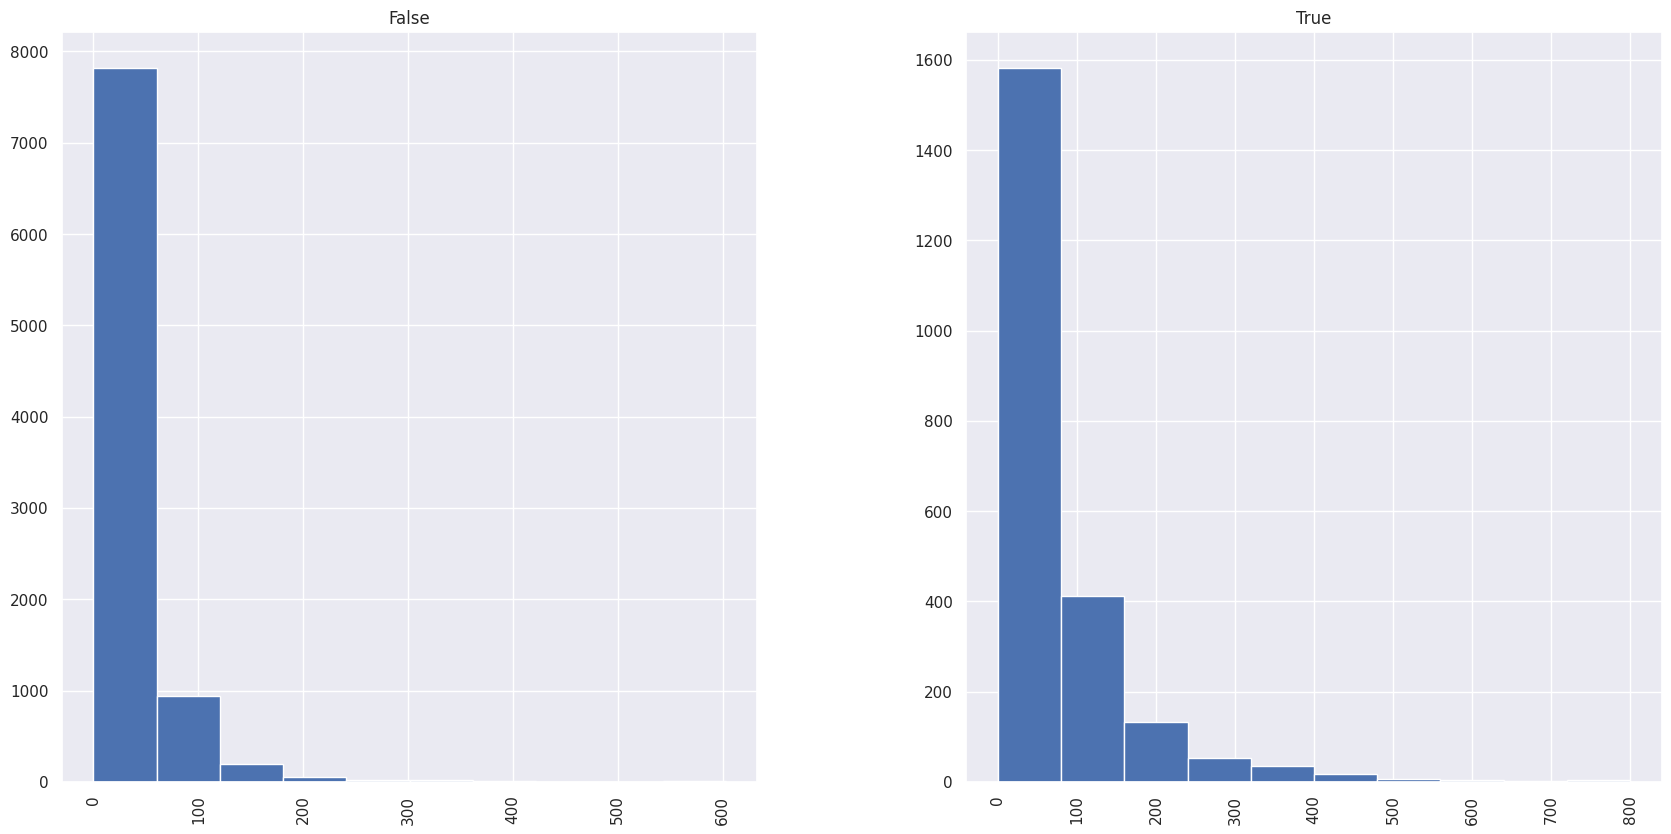

In [ ]:
# Gráfico Histograma de las variables "num_published_lectures" y "bestseller"
ax = df.hist(column="num_published_lectures", by="bestseller", bins=10, figsize=(20, 10))

**Interpretación:**

- Los "bestseller false" concentran casi el total de observaciones en cantidad de clases de la primera barra del histograma.
- Los "bestseller true" concentran alta cantidad de observaciones en el rango de clases de 0 a 100.
- Los "bestseller true" superan en cantidad de cursos a los "bestseller false" a partir de 100 clases.
- Descomponiendo el gráfico anterior se observa que los "bestseller true" concentran una buena cantidad de  observaciones de 100 a 200 clases.

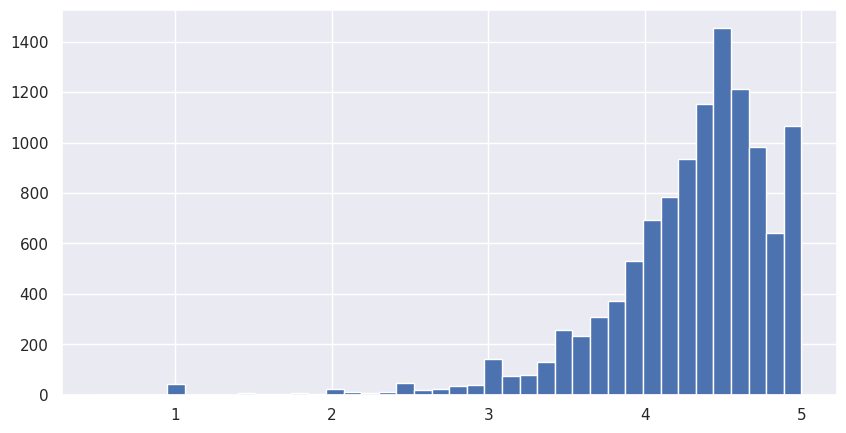

In [ ]:
# Gráfico Histograma de la variable "rating"
ax = df["rating"].hist(figsize=(10, 5), bins=40)

**Interpretación:**

- Se observa una asimetría hacia la izquierda lo cual su media aritmética está sesgada por valores muy bajos.
- La mayor concentración de datos se visualiza a partir de 3,5 puntos.

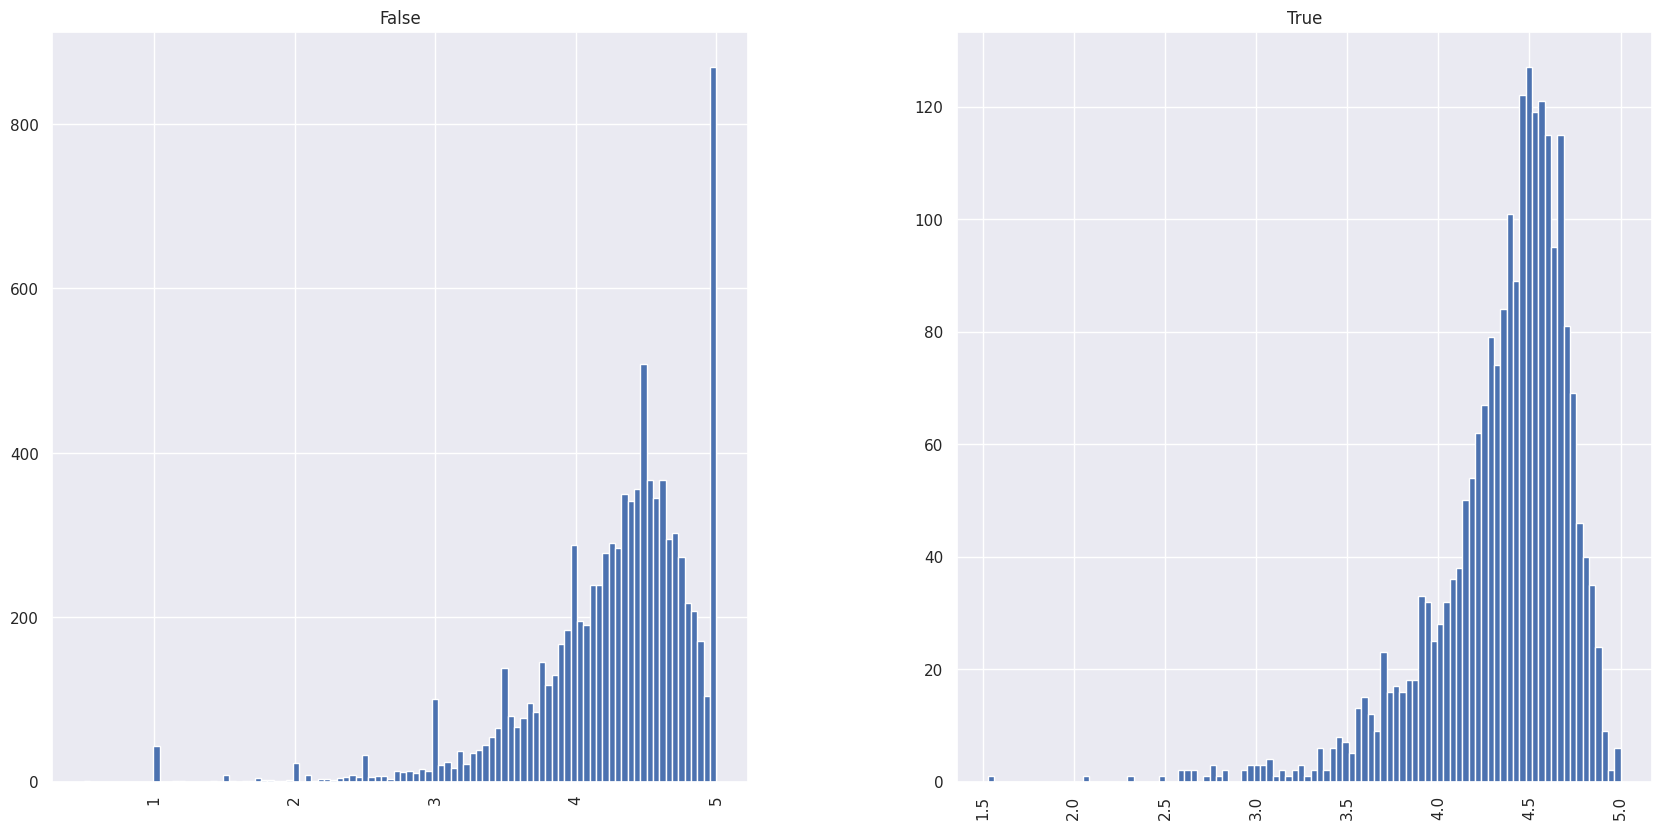

In [ ]:
# Gráfico Histograma de las variables "rating" y "bestseller"
ax = df.hist(column="rating", by="bestseller", bins=100, figsize=(20, 10))

**Interpretación:**

- Se puede observar observar que existe más concentración de cursos con rating bajo en "bestseller false" que en "bestseller true".
- Se observa una forma leptocúrtica en ambos histogramas.

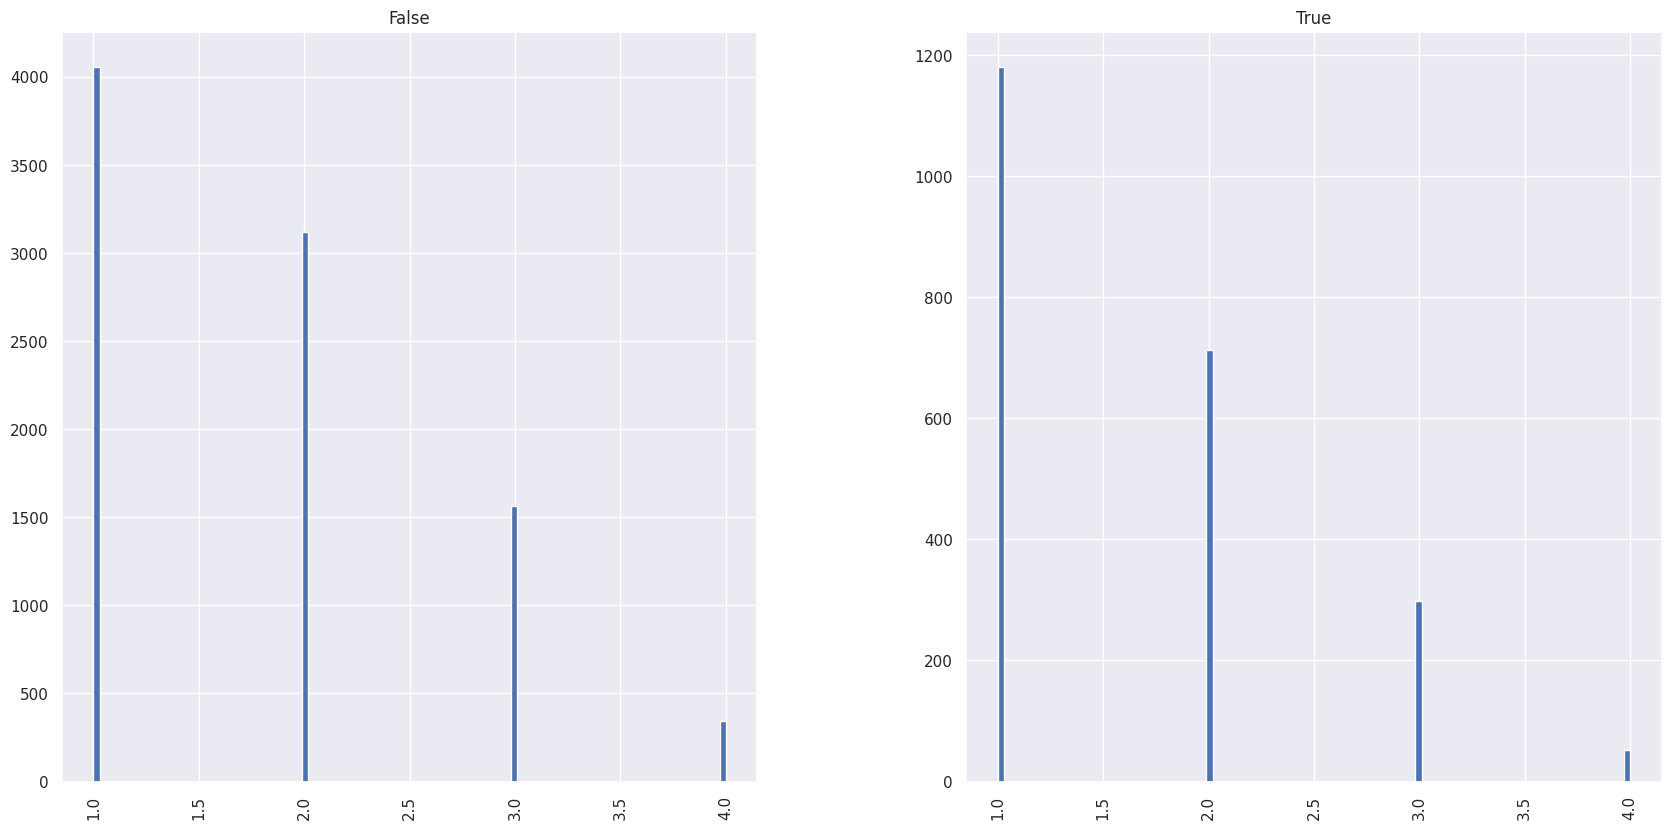

In [ ]:
# Gráfico Histograma de las variables "instructional_level_simple_cod" y "bestseller"
ax = df.hist(column="instructional_level_simple_cod", by="bestseller", bins=100, figsize=(20, 10))

**Interpretación:**

- Tanto en el histograma de bestseller true como de bestseller false de acuerdo al "instructional_level_simple_cod" se concentran los datos en la categoría 1 que contiene a todos los niveles de instrucción.
- La frecuencia más baja se da en ambos histomgramas en la categoría 4 donde el nivel de curso es experto.

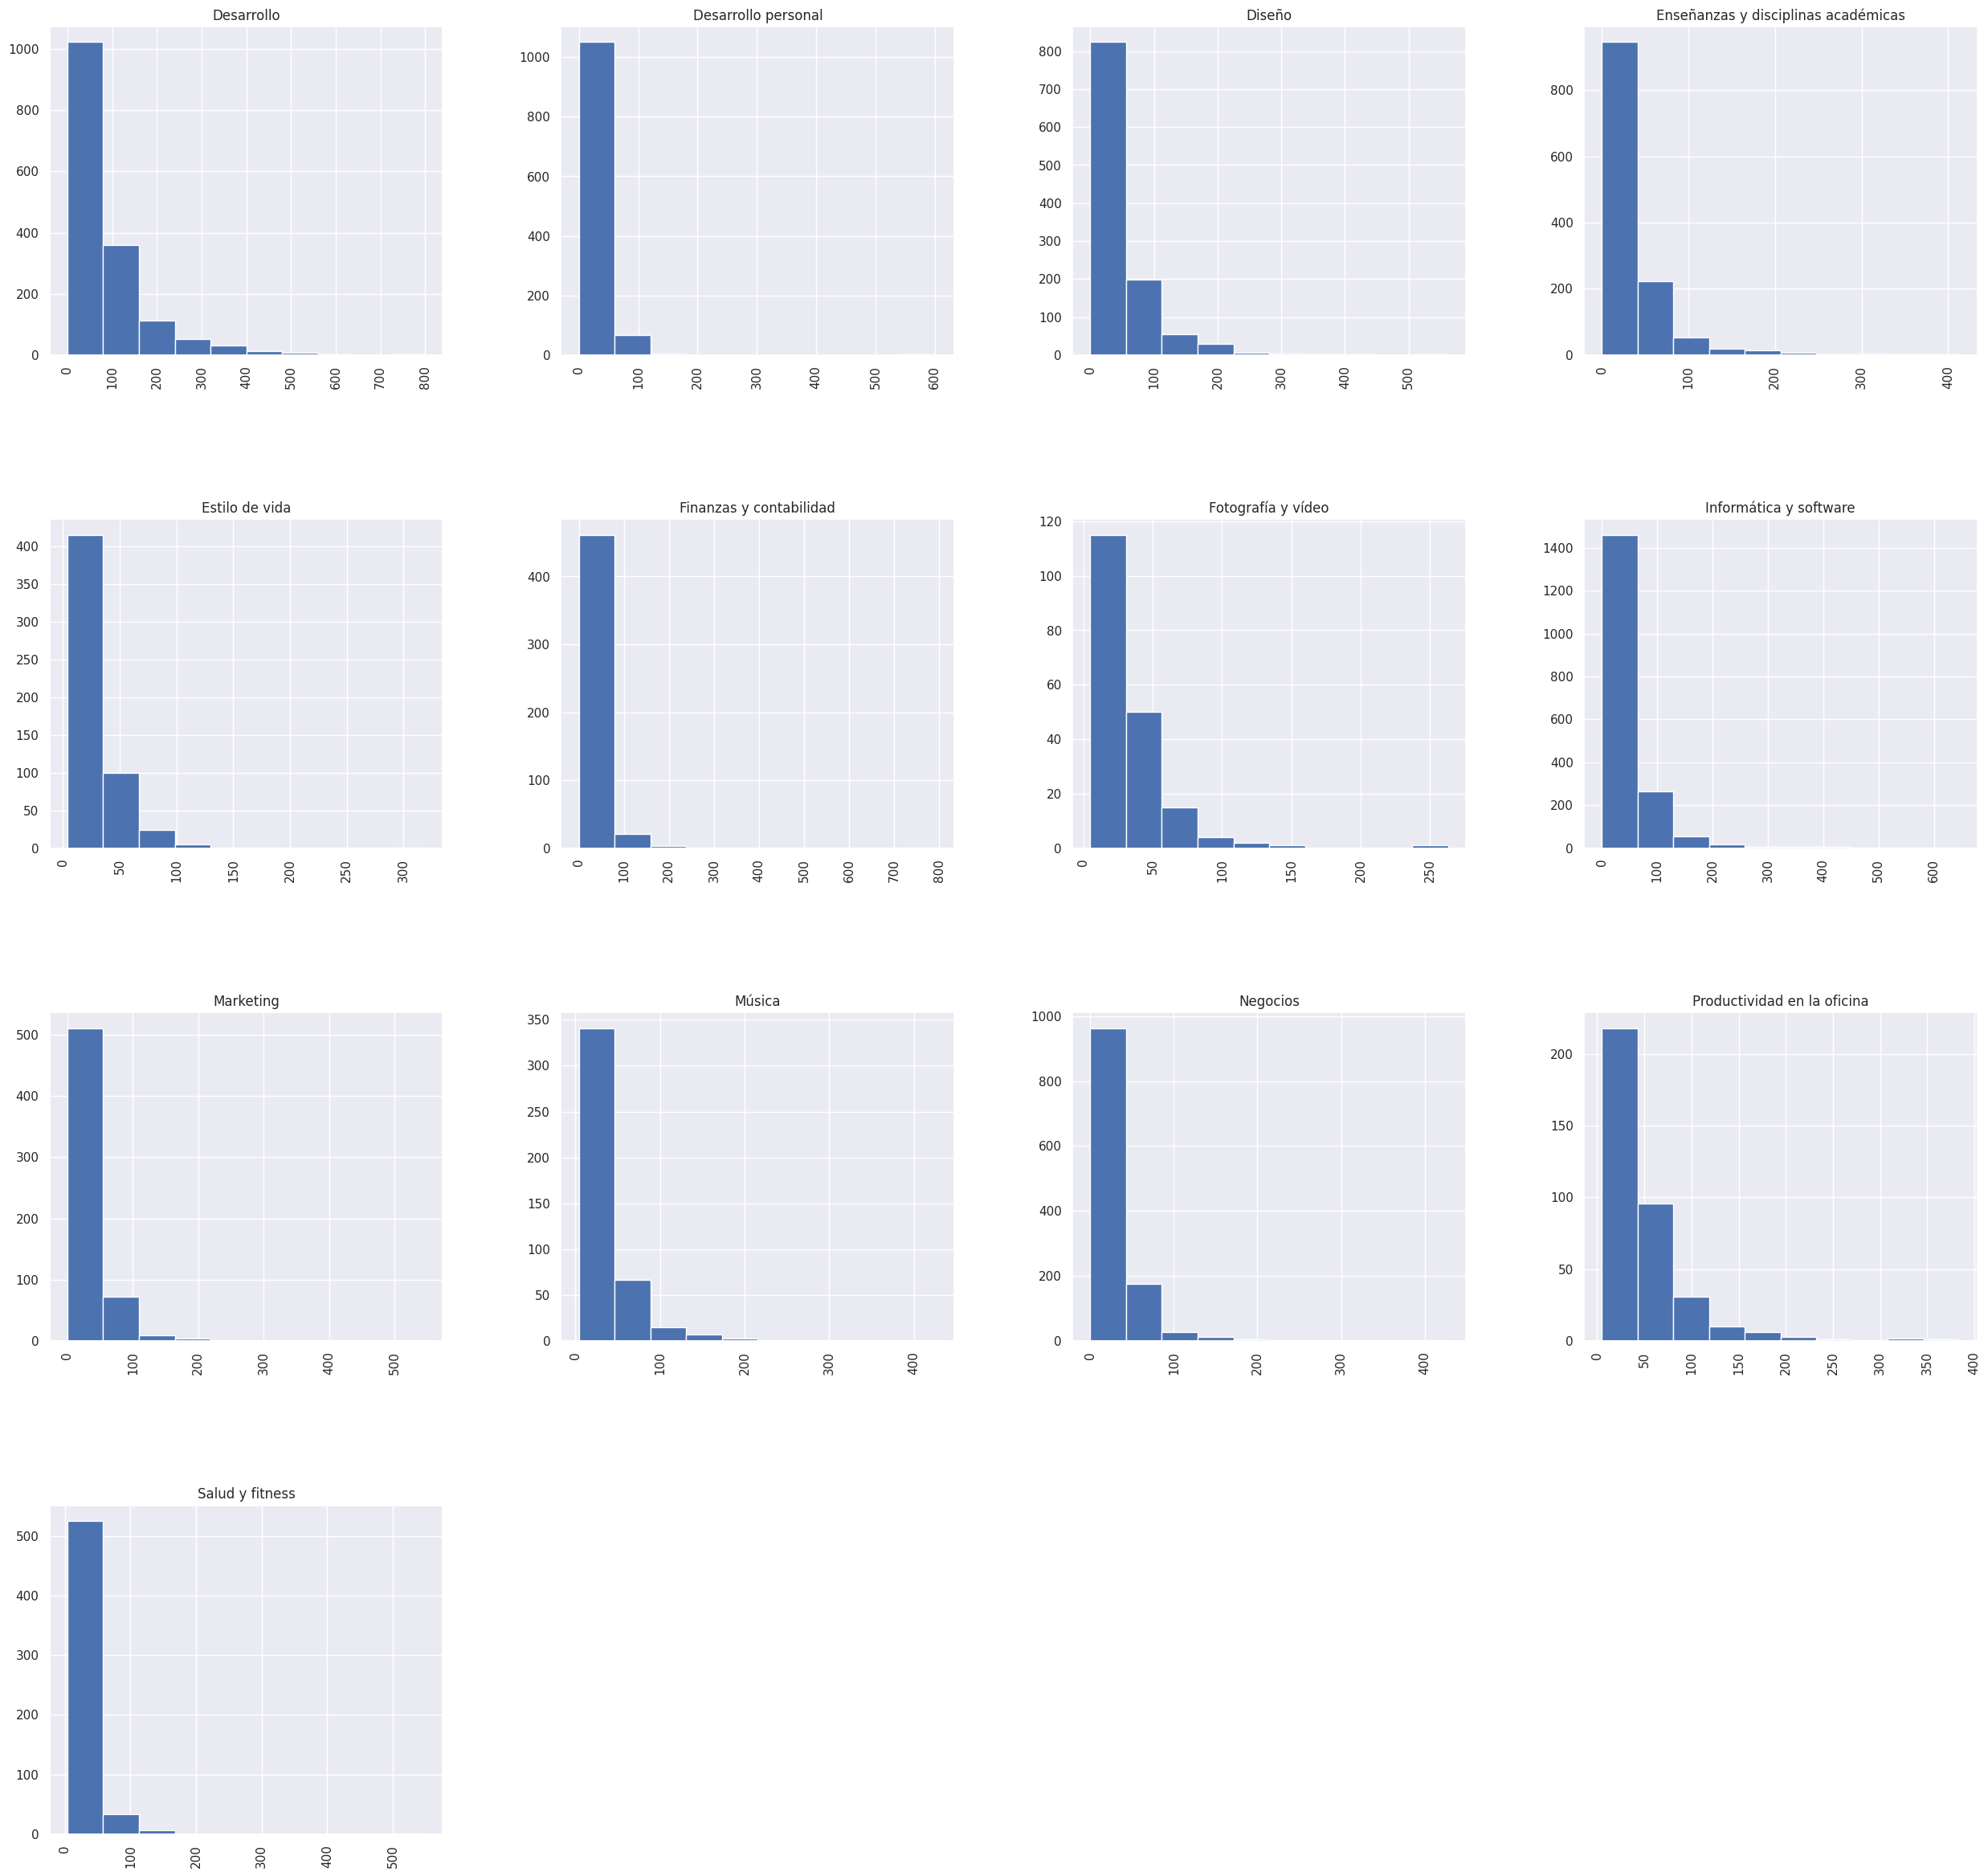

In [ ]:
# Gráfico Histograma de las variables "num_published_lectures" y "category"
ax = df.hist(column="num_published_lectures", by="category", bins=10, figsize=(30, 30))

**Interpretación:**

* Para las diferentes categorías de cursos se pueden visualizar la variable "num_published_lectures".

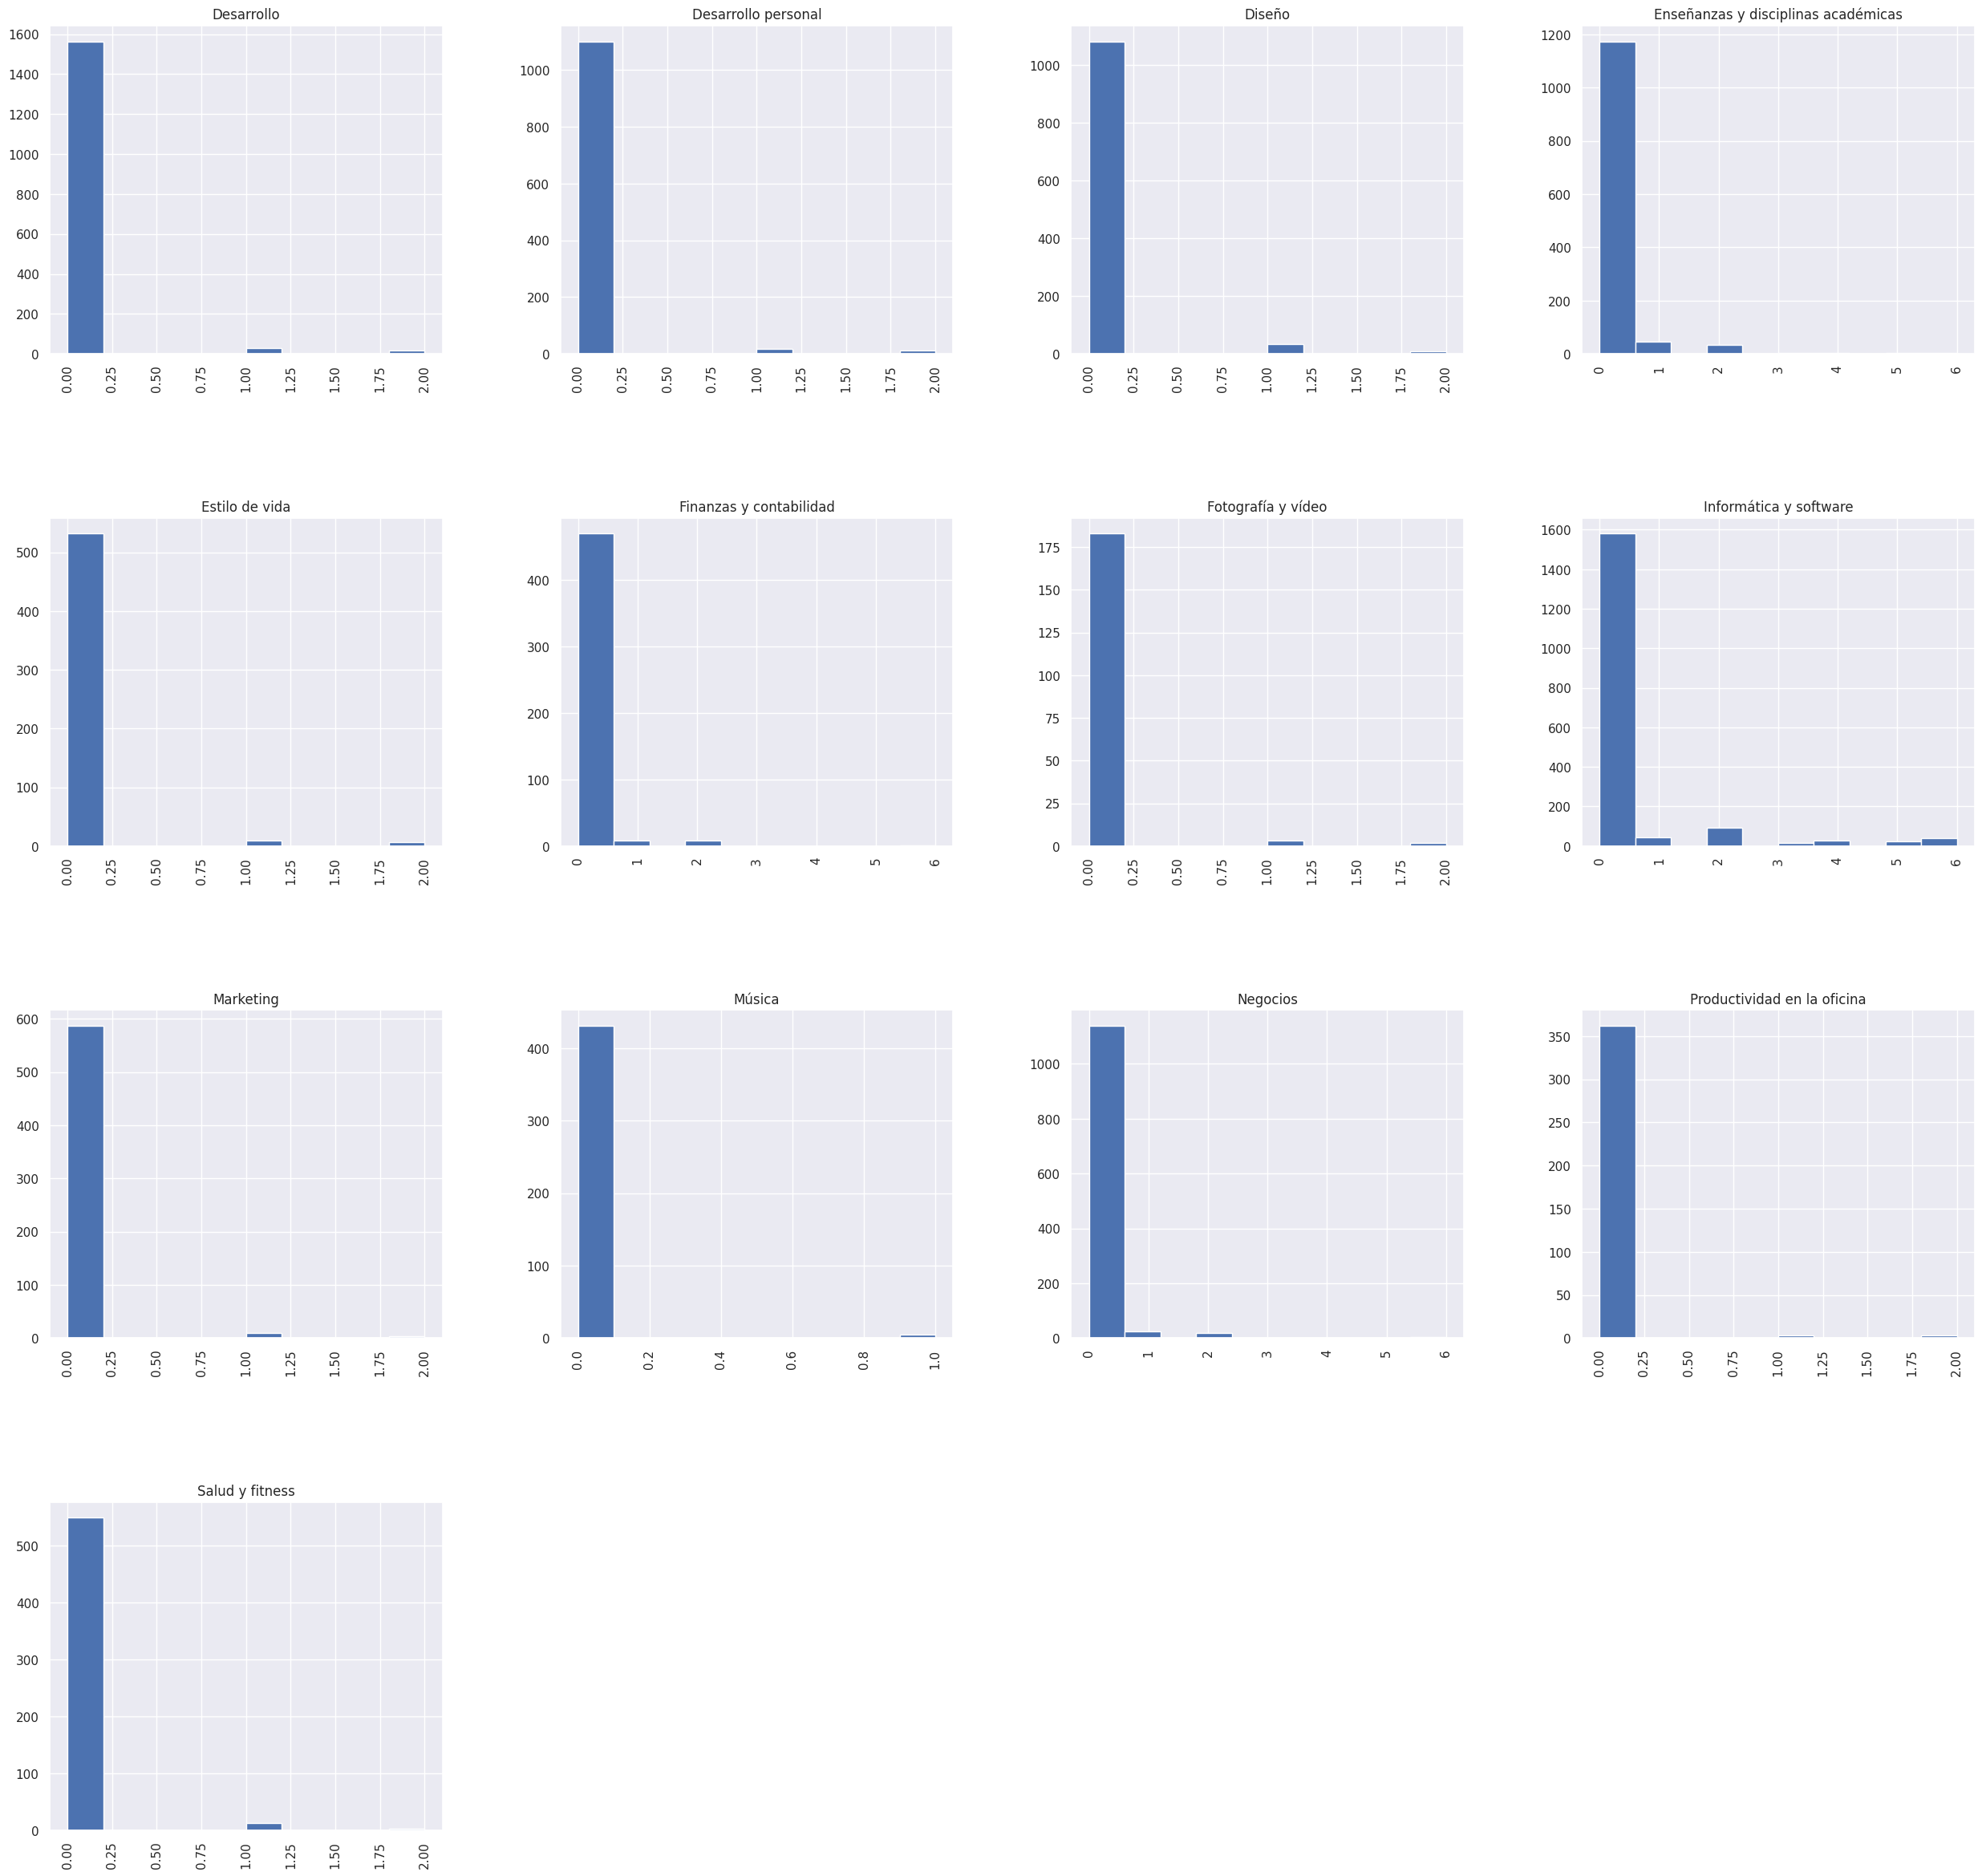

In [ ]:
# Gráfico Histograma de las variables "num_published_practice_tests" y "category"
ax = df.hist(column="num_published_practice_tests", by="category", bins=10, figsize=(30, 30))

**Interpretación:**

* Para las diferentes categorías de cursos se pueden visualizar la variable "num_published_practice_tests".

#### **3.5.4. Gráficos de Dispersión**

<Axes: xlabel='num_published_lectures', ylabel='rating'>

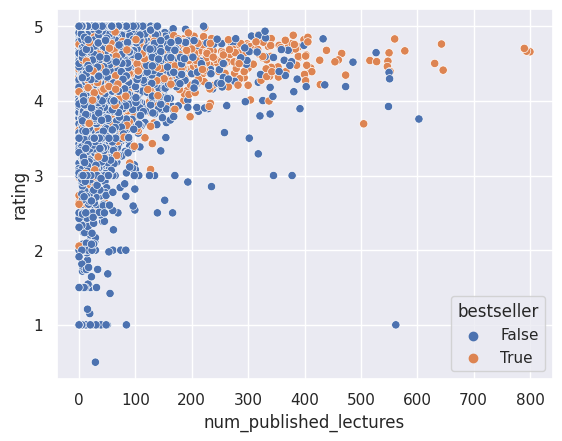

In [ ]:
# Gráfico de Dispersión de las variables "num_published_lectures" y "bestseller"
sns.scatterplot(data=df,x='num_published_lectures',y='rating',hue='bestseller')

**Interpretación:**

- La cantidad de cursos que fueron "bestseller" poseen un "ranting"  mayor a 4.
- El rango de la cantidad de clases de cursos "bestseller" es superior al rango de cantidad de clases de cursos que no fueron "bestseller".
- La mayor cantidad de cursos no "bestseller" se concentran principalmente en  cantidad de clases 0 a 100.
- El "rating de los cursos que no fueron "bestseller" poseen un "rating" menor en general a comparación de los cursos que sí fueron bestseller.
- Los cursos "bestseller" tienen  valores típicos de más cantidad de clases en proporción a los valores típicos de cantidad de clases en cursos que no fueron "bestseller".
- La variable "bestseller true" posee una concentración fuerte en cursos que van desde las 100 clases hasta als 400.

<Axes: xlabel='num_published_lectures', ylabel='rating'>

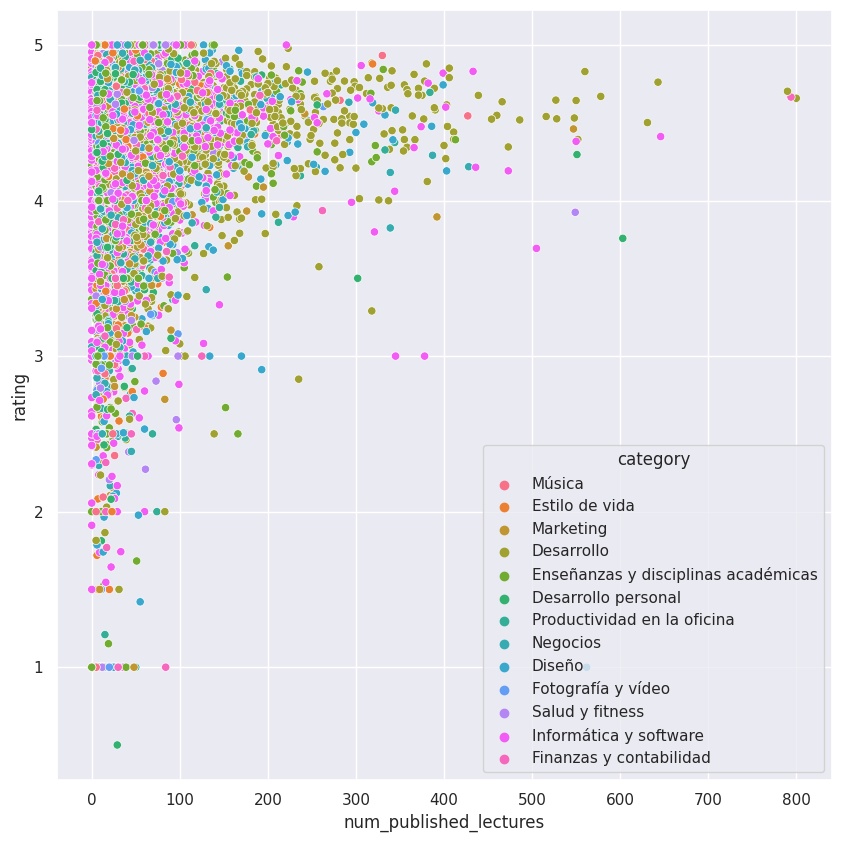

In [ ]:
# Gráfico de Dispersión de las variables "num_published_lectures" y "rating" según "category"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='num_published_lectures',y='rating',hue='category')

**Interpretación:**

- Sobresale en cantidad de ofertas de cursos las categorías de : "Informática y Sofware" y "Desarrollo".
- Se observa que los cursos de "desarrollo" tienen más cantidad de clases por lo general.
-  La mayor cantidad de los cursos se concentran con un rating mayor 3,5.

<Axes: xlabel='num_published_practice_tests', ylabel='rating'>

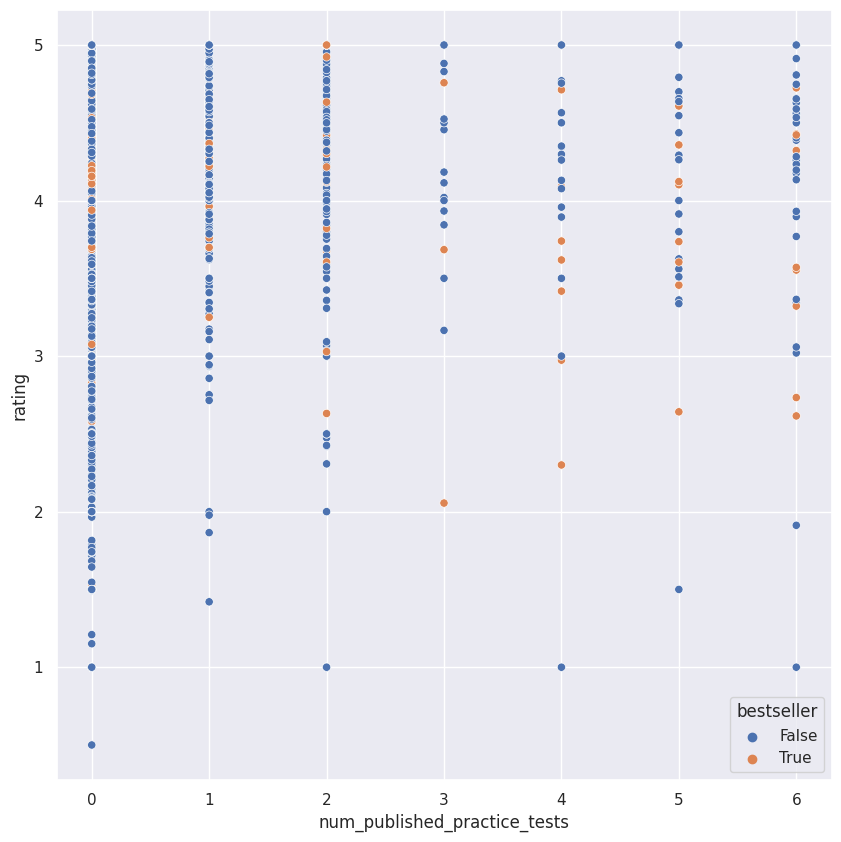

In [ ]:
# Gráfico de Dispersión de las variables "num_published_practice_tests" y "rating" según "bestseller"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='num_published_practice_tests',y='rating',hue='bestseller')

**Interpretación:**

- Se observa que la variable "num_published_practice_tests" generalmente poseee un rating alto.
- Se concentran cursos que no fueron bestseller mayormente cuando no hubo pruebas prácticas.
- Generalmente cuando hay pruebas prácticas el curso es bestseller.

<Axes: xlabel='num_published_practice_tests', ylabel='rating'>

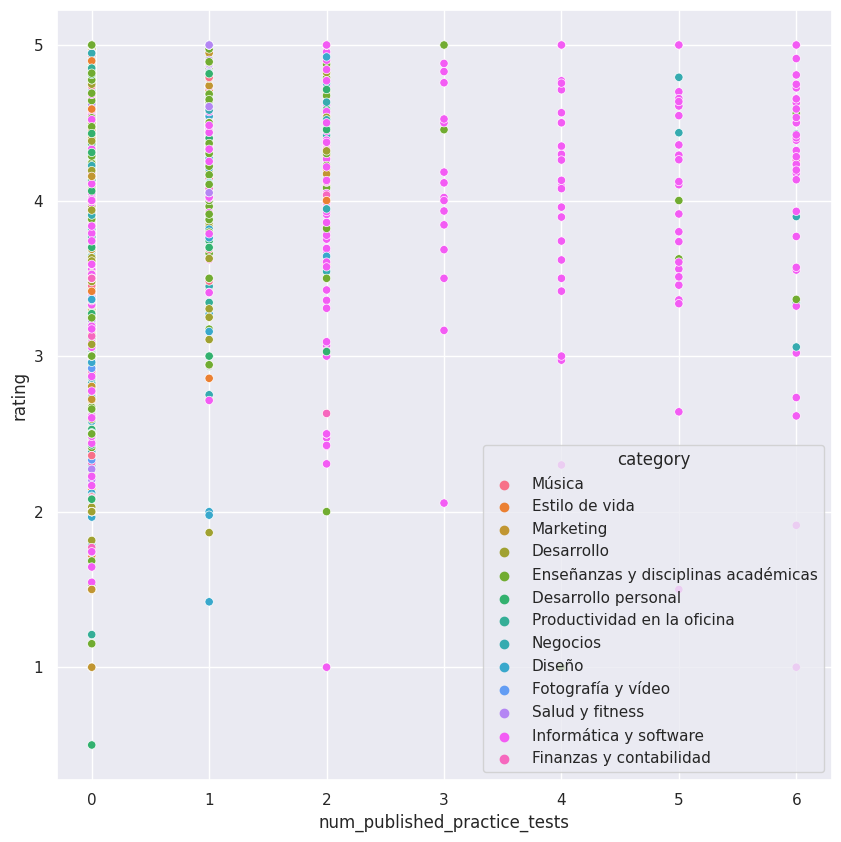

In [ ]:
# Gráfico de Dispersión de las variables "num_published_practice_tests" y "rating" según "category"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='num_published_practice_tests',y='rating',hue='category')

**Interpretación:**

- Se obseva mayor cantidad de cursos de "Informática y Sofware" que poseen pruebas prácticas.
- "Enseñanzas y disciplinas académicas" también poseen gran cantidad de cursos con pruebas prácticas pero generalmente son pocás prácticas.

<Axes: xlabel='list_price', ylabel='rating'>

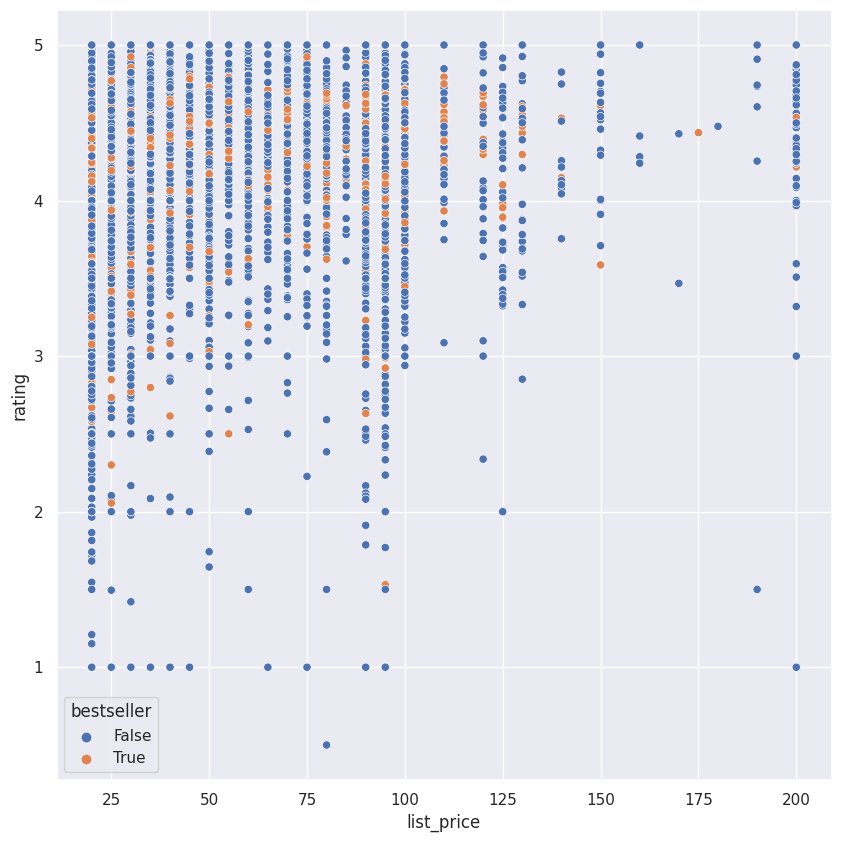

In [ ]:
# Gráfico de Dispersión de las variables "list_price" y "rating" según "bestseller"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='list_price',y='rating',hue='bestseller')

<Axes: xlabel='list_price', ylabel='num_published_lectures'>

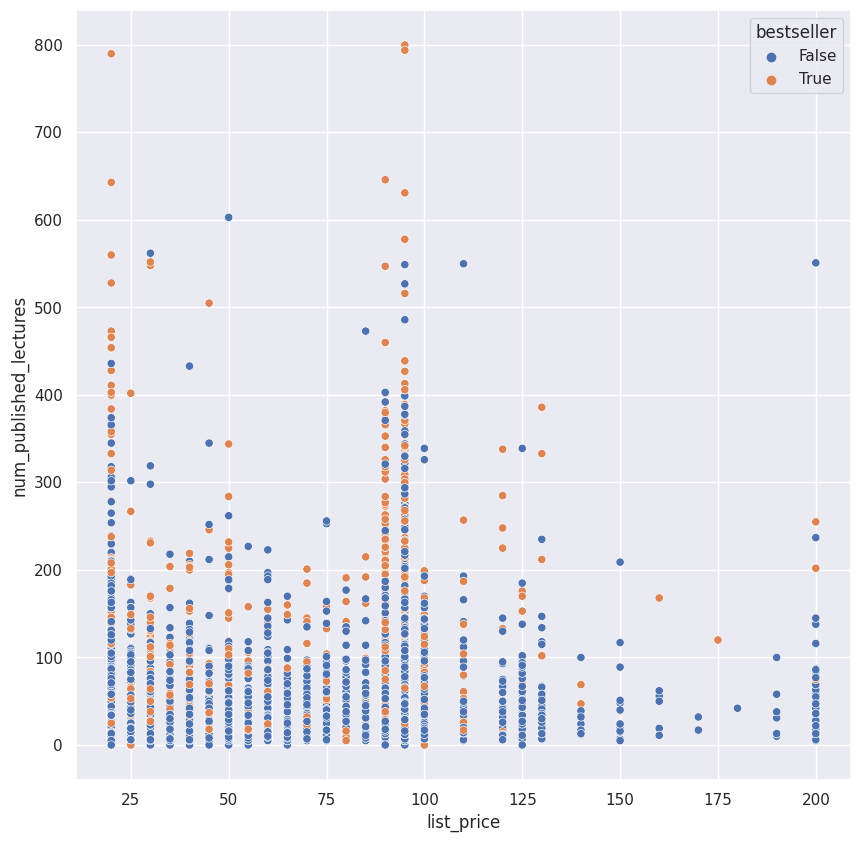

In [ ]:
# Gráfico de Dispersión de las variables "list_price" y "num_published_lectures" según "bestseller"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='list_price',y='num_published_lectures',hue='bestseller')

<Axes: xlabel='num_published_lectures', ylabel='instructional_level_simple_cod'>

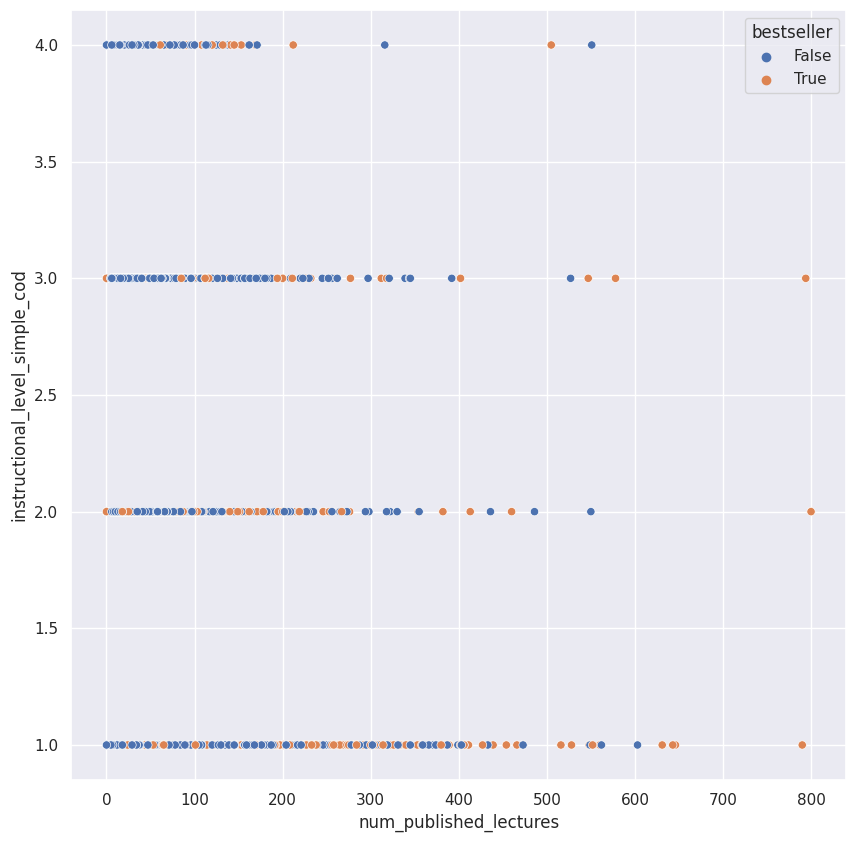

In [ ]:
# Gráfico de Dispersión de las variables "num_published_lectures" y "instructional_level_simple_cod" según "bestseller"
fig, ax = plt.subplots(figsize=[10,10])
sns.scatterplot(data=df,x='num_published_lectures',y='instructional_level_simple_cod',hue='bestseller')

**Interpretación:**

- La cantidad de cursos que abarca todos los niveles (1) concentra más cantidad de bestseller cuando el mismo es > a 200 clases.
- Existen más cursos que no fueron bestseller cuando el nivel del cursos era de intermedio a experto (nivel 3  y 4).

### **3.6. Muestreo**

In [ ]:
# Muestreo con reemplazo
df.sample(frac=0.01, replace=True, random_state=1991)

id                                              title  \
1102    1103  Java a través de ejemplos: Una agenda de conta...   
1331    1332  Calculo para preparar soluciones nutritivas en...   
2445    2446  Spring 5,Programación Reactiva  Flux, MVC Thym...   
884      885            Yoga Salud:Cuerpo, Con-Ciencia y Alma .   
9285    9286           Aprende a Manejar la Ley de la atracción   
...      ...                                                ...   
22        23                              Fotografía con iPhone   
118      119  Desarrollo de Aplicaciones en ASP.NET para la ...   
11016  11017  Google Ads Super Actualizado de Cero a Experto...   
3678    3679    Aprende escultura básica y enséñala a tus niños   
2799    2800  Amazon AWS: Curso Completo Arquitecto Solucion...   

                                                headline  \
1102   Aprende a plantear e implementar aplicaciones ...   
1331   Calculo de cantidades de fertilizantes a aplic...   
2445   Curso Práctico creación Servicios RestFul y Ap...   
884    Experiencia completa  de monitor de yoga  con ...   
9285                       Atrae la abundancia a tu vida   
...                                                  ...   
22     Aprende facilmente cómo hacer maravillosas fot...   
118    Con este curso aprenderas a desarrollar aplica...   
11016            Haz campañas mas optimizadas y éxitosas   
3678   Aprende a modelar figuras en arcilla polimeric...   
2799   Estudie y supere el examen de nivel asociado d...   

       is_practice_test_course  bestseller captions    rating  \
1102                     False       False      NaN  3.475836   
1331                     False       False    es_MX  4.275290   
2445                     False       False      NaN  4.867092   
884                      False        True    es_ES  4.892172   
9285                     False       False    es_ES  4.319274   
...                        ...         ...      ...       ...   
22                       False       False    es_LA  3.669713   
118                      False       False    es_MX  4.175651   
11016                    False       False    es_MX  5.000000   
3678                     False       False    es_MX  4.672403   
2799                     False        True    es_ES  4.213149   

       num_published_lectures  num_published_practice_tests locale  ...  \
1102                       69                             0  es_ES  ...   
1331                       19                             0  es_MX  ...   
2445                       22                             0  es_ES  ...   
884                       148                             0  es_ES  ...   
9285                       11                             0  es_ES  ...   
...                       ...                           ...    ...  ...   
22                         35                             0  es_LA  ...   
118                        58                             0  es_MX  ...   
11016                      14                             0  es_MX  ...   
3678                       11                             0  es_MX  ...   
2799                      100                             0  es_ES  ...   

      content_info_short instructors                             category  \
1102           2,5 horas     6553634                           Desarrollo   
1331             2 horas    16803962  Enseñanzas y disciplinas académicas   
2445           2,5 horas     3134024                           Desarrollo   
884           26,5 horas     6530006                      Salud y fitness   
9285             3 horas    26889278                  Desarrollo personal   
...                  ...         ...                                  ...   
22               4 horas      576382                   Fotografía y vídeo   
118              9 horas      296348                           Desarrollo   
11016          3,5 horas    28065838                            Marketing   
3678           1,5 horas     979

In [ ]:
# Muestreo estratificado
df.groupby('bestseller', group_keys=False).apply(lambda x: x.sample(1000))

id                                              title  \
6563    6564  Técnicas prácticas para mejorar Contenidos en ...   
8259    8260  Introducción a three.js y creación de videojue...   
10839  10840  Web profesional para actores y artistas con wo...   
5487    5488                  Fisiología endocrinológica humana   
8717    8718  (Angular 10 | PHP): Crea un Sistema de Control...   
...      ...                                                ...   
9423    9424   AWS Certified Solutions Architect Associate 2021   
4018    4019  Máster en Front-End: Crea Temas para WordPress...   
5843    5844           Creador de Licencias para Software en C#   
4178    4179  SQL. Curso completo de SQL. Aprende desde cero...   
567      568  Matrices y sistemas de ecuaciones (Álgebra Lin...   

                                                headline  \
6563   Aprendé cómo optimizar tus textos para generar...   
8259   Aprende a crear elementos 3D y videojuegos en ...   
10839  Descubre la forma más fácil y económica de con...   
5487            Curso orientado a la carrera de Medicina   
8717   Imprime recetas médicas, lleva el expediente d...   
...                                                  ...   
9423   Apruebe la Certificación SAA-C02 de AWS Certif...   
4018   Aprende Bootstrap 4, Flexbox, CSS Grid y const...   
5843                                            Lo mejor   
4178   Aprende SQL desde cero para saber manejar cual...   
567    Aprende cómo realizar operaciones básicas con ...   

       is_practice_test_course  bestseller captions    rating  \
6563                     False       False    es_ES  3.909340   
8259                     False       False    es_ES  4.374757   
10839                    False       False    es_ES  4.673355   
5487                     False       False    es_LA  4.560233   
8717                     False       False    es_MX  4.656256   
...                        ...         ...      ...       ...   
9423                     False        True    es_LA  4.534790   
4018                     False        True    es_CO  4.573884   
5843                     False        True    es_ES  4.263064   
4178                     False        True    es_ES  4.377956   
567                      False        True    es_LA  4.430875   

       num_published_lectures  num_published_practice_tests locale  ...  \
6563                        9                             0  es_ES  ...   
8259                       24                             0  es_ES  ...   
10839                      27                             0  es_ES  ...   
5487                       11                             0  es_LA  ...   
8717                       96                             0  es_MX  ...   
...                       ...                           ...    ...  ...   
9423                      182                             0  es_LA  ...   
4018                      141                             0  es_CO  ...   
5843                        9                             0  es_ES  ...   
4178                       77                             0  es_ES  ...   
567                         7                             0  es_LA  ...   

      content_info_short instructors                             category  \
6563          41 minutos    83614566                            Marketing   
8259           3,5 horas    26464048                           Desarrollo   
10839            6 horas    79001558                            Marketing   
5487           4,5 horas    55489260  Enseñanzas y disciplinas académicas   
8717             6 horas     4799248                           Desarrollo   
...                  ...         ...                                  ...   
9423          24,5 horas   133967150               Informática y software   
4018            31 horas    19669210                           Desarrollo   
5843              1 hora    57256496               Informática y software   
4178           2,5 horas    6241

In [ ]:
df["bestseller"].mean()

0.19821649302489847

In [ ]:
means = []
for e in range(1, 1001): # cantidad de muestras
    sample = np.random.choice(df["bestseller"], 100) # tamaño de la muestra
    means.append(sample.mean())
print(means)

[0.22, 0.16, 0.25, 0.19, 0.24, 0.18, 0.19, 0.19, 0.18, 0.21, 0.19, 0.22, 0.23, 0.2, 0.27, 0.2, 0.19, 0.17, 0.2, 0.2, 0.14, 0.14, 0.18, 0.18, 0.21, 0.21, 0.2, 0.18, 0.22, 0.23, 0.17, 0.22, 0.29, 0.18, 0.19, 0.25, 0.21, 0.17, 0.19, 0.2, 0.25, 0.18, 0.11, 0.22, 0.28, 0.22, 0.16, 0.19, 0.23, 0.17, 0.17, 0.21, 0.22, 0.23, 0.12, 0.19, 0.18, 0.15, 0.22, 0.14, 0.17, 0.15, 0.19, 0.24, 0.21, 0.15, 0.23, 0.22, 0.25, 0.14, 0.15, 0.16, 0.19, 0.18, 0.12, 0.22, 0.19, 0.19, 0.22, 0.24, 0.23, 0.24, 0.17, 0.17, 0.19, 0.13, 0.24, 0.22, 0.15, 0.19, 0.2, 0.25, 0.26, 0.29, 0.16, 0.15, 0.14, 0.18, 0.24, 0.23, 0.27, 0.19, 0.19, 0.15, 0.19, 0.17, 0.2, 0.17, 0.16, 0.19, 0.22, 0.19, 0.24, 0.17, 0.2, 0.23, 0.22, 0.21, 0.17, 0.2, 0.21, 0.2, 0.26, 0.11, 0.14, 0.18, 0.18, 0.27, 0.17, 0.23, 0.16, 0.2, 0.2, 0.23, 0.14, 0.26, 0.22, 0.21, 0.19, 0.18, 0.2, 0.22, 0.13, 0.18, 0.23, 0.17, 0.13, 0.18, 0.21, 0.17, 0.15, 0.18, 0.19, 0.21, 0.21, 0.22, 0.23, 0.21, 0.24, 0.17, 0.17, 0.13, 0.24, 0.19, 0.19, 0.24, 0.2, 0.25, 0.21, 

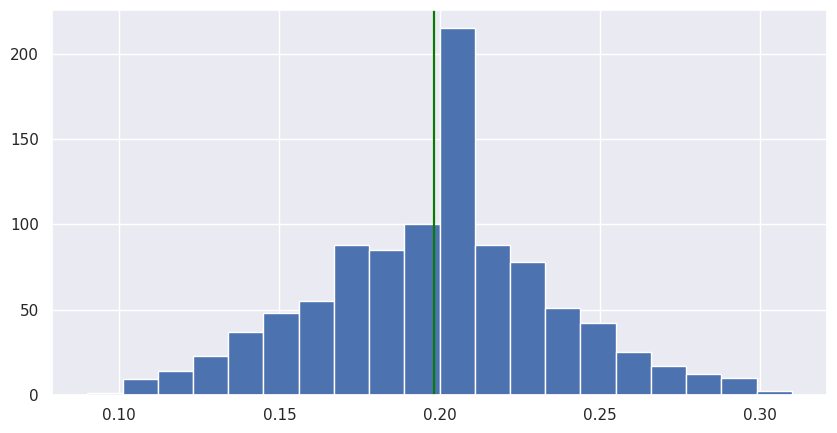

In [ ]:
ax = pd.Series(means).hist(figsize=(10, 5), bins=20)
ax2 = ax.axvline(x = df["bestseller"].mean(), color = "red")
ax3 = ax.axvline(x = pd.Series(means).mean(), color = "green")

**Interpretación:**

- Se demuestra que el indicador es insesgado ya que la media de la población es 0.19821649302489847 y el promedio del promedio de las 1000 muestras da un valor muy similar.

In [ ]:
means = []
for e in range(1, 1001): # cantidad de muestras
    sample = np.random.choice(df["num_published_lectures"], 100) # tamaño de la muestra
    means.append(sample.mean())
print(means)

[53.12, 42.03, 52.72, 35.12, 38.36, 41.84, 43.21, 45.44, 47.68, 42.83, 56.93, 41.33, 37.82, 37.09, 37.61, 45.28, 40.53, 46.49, 31.29, 52.5, 41.54, 41.06, 40.05, 38.31, 46.19, 46.5, 35.29, 39.49, 39.83, 40.46, 52.84, 47.07, 53.92, 46.43, 39.44, 54.36, 33.62, 46.35, 40.88, 47.89, 40.91, 43.49, 38.39, 39.28, 44.18, 48.85, 33.9, 50.21, 49.19, 40.94, 34.47, 42.99, 46.21, 42.32, 43.2, 56.65, 37.34, 49.45, 39.59, 41.73, 38.26, 47.32, 41.81, 41.09, 54.57, 40.73, 37.75, 37.98, 44.93, 43.47, 43.46, 49.54, 45.67, 44.8, 41.02, 38.01, 43.7, 47.31, 54.98, 45.69, 39.25, 53.78, 54.1, 47.38, 44.73, 49.92, 34.83, 42.72, 38.41, 42.24, 36.24, 39.61, 44.17, 39.42, 49.33, 41.46, 51.44, 37.78, 38.95, 42.87, 42.78, 45.68, 35.4, 46.41, 49.11, 48.94, 41.96, 39.8, 33.6, 40.27, 43.59, 44.66, 33.67, 49.22, 49.76, 40.62, 39.82, 45.86, 43.81, 47.27, 44.3, 50.45, 40.69, 43.76, 39.67, 34.84, 52.07, 46.21, 51.12, 50.38, 47.12, 67.19, 52.92, 45.77, 43.11, 54.98, 50.14, 38.72, 51.44, 36.01, 40.85, 45.09, 51.04, 39.16, 47

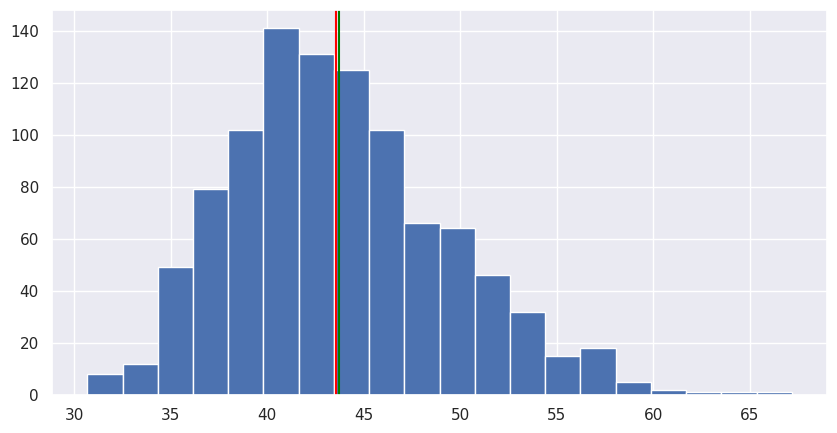

In [ ]:
ax = pd.Series(means).hist(figsize=(10, 5), bins=20)
ax2 = ax.axvline(x = df["num_published_lectures"].mean(), color = "red")
ax3 = ax.axvline(x = pd.Series(means).mean(), color = "green")

**Interpretación:**

- Se verifica que la indicador de media aritmértica es similar al promedio de las medias de cada una de las 1000 muestras realizadas.

In [ ]:
means = []
for e in range(1, 1001): # cantidad de muestras
    sample = np.random.choice(df["list_price"], 100) # tamaño de la muestra
    means.append(sample.mean())
print(means)

[45.33999999999999, 47.28999999999999, 47.08999999999999, 52.29, 54.69, 52.49, 54.79, 48.59, 49.64, 46.69, 48.38999999999999, 48.09, 48.49, 51.73999999999999, 49.58999999999999, 52.08999999999999, 48.04, 48.48999999999999, 58.44, 51.68999999999999, 48.28999999999999, 48.44, 51.54, 45.78999999999999, 46.33999999999999, 49.43999999999999, 45.48999999999999, 42.23999999999999, 50.48999999999999, 50.84, 48.13999999999999, 49.79, 49.54, 50.08999999999999, 46.88999999999999, 45.13999999999999, 45.79, 48.04, 51.44, 52.43999999999999, 55.54, 48.29, 53.09, 50.79, 46.13999999999999, 51.83999999999999, 57.69, 47.98999999999999, 52.43999999999999, 48.89, 47.23999999999999, 57.84, 50.24, 49.94, 49.53999999999999, 46.43999999999999, 49.48999999999999, 51.68999999999999, 51.59, 46.14, 47.09, 49.98999999999999, 48.09, 44.48999999999999, 43.39, 49.84, 47.34, 49.59, 51.74, 48.38999999999999, 52.89, 45.39, 49.58999999999999, 48.68999999999999, 46.14, 49.19, 52.69, 51.29, 48.63999999999999, 48.38999999999

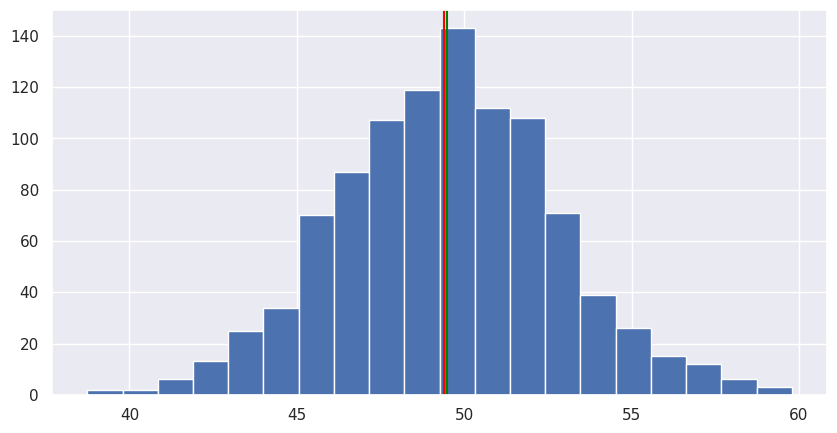

In [ ]:
ax = pd.Series(means).hist(figsize=(10, 5), bins=20)
ax2 = ax.axvline(x = df["list_price"].mean(), color = "red")
ax3 = ax.axvline(x = pd.Series(means).mean(), color = "green")

**Interpretación:**

- Se verifica que el promedio del promedio de las muestras es insesgado y por lo tanto puede usarse para la toma de decisiones.

In [ ]:
means = []
for e in range(1, 1001): # cantidad de muestras
    sample = np.random.choice(df["rating"], 100) # tamaño de la muestra
    means.append(sample.mean())
print(means)

[4.2290146140000004, 4.262121113, 4.243890571, 4.312022143999999, 4.215338887, 4.4310396480000005, 4.217086083, 4.218746858, 4.33940103, 4.231463182, 4.240511105, 4.279268622999999, 4.259172281000001, 4.298113653000001, 4.2905326839999995, 4.233678393, 4.216413545, 4.234593651, 4.400470898, 4.330939227, 4.3340943119999995, 4.3552840360000005, 4.276935259, 4.20398421, 4.236045586, 4.403779719, 4.221659681, 4.287383000999999, 4.242240044, 4.2354890099999984, 4.252314637000001, 4.251531922, 4.323747256999999, 4.253402628, 4.212612562, 4.318312934000001, 4.258632419, 4.311031523, 4.226330559000001, 4.4226004770000005, 4.270623862, 4.356600813000001, 4.22750147, 4.25570749, 4.228230839, 4.225642844, 4.2554103450000005, 4.245391305000001, 4.303430477, 4.249133746999999, 4.324260858, 4.186834237, 4.311524351, 4.212294649, 4.283802096, 4.329908886999999, 4.296280278999999, 4.393050442, 4.296707565, 4.332872902, 4.297938807000001, 4.232001695000001, 4.319699058, 4.343980056, 4.328975979999999, 

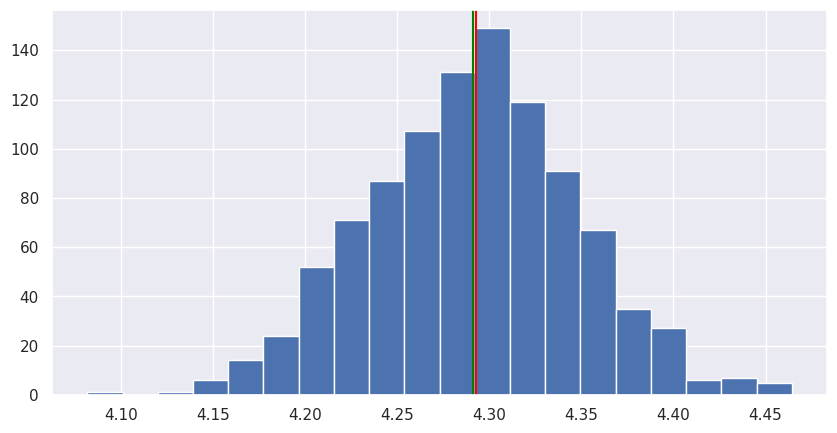

In [ ]:
ax = pd.Series(means).hist(figsize=(10, 5), bins=20)
ax2 = ax.axvline(x = df["rating"].mean(), color = "red")
ax3 = ax.axvline(x = pd.Series(means).mean(), color = "green")

**Interpretación:**

- Se verifica que el promedio del promedio de las muestras es insesgado y por lo tanto puede usarse para la toma de decisiones.

### **3.7. Test de Normalidad**

In [ ]:
from scipy import stats
from scipy.stats import shapiro
stats.shapiro(df["num_published_lectures"])

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.586945652961731, pvalue=0.0)

 **Interpretación:**
 - Se observa un pvalue menor al 0,05 por lo tanto se rechaza la hipótesis de normalidad.

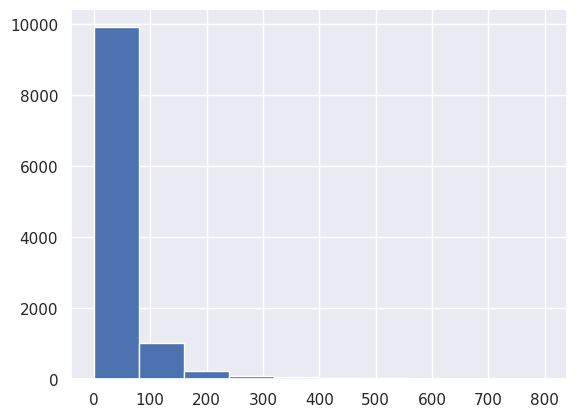

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["num_published_lectures"])
plt.show()

In [ ]:
stats.shapiro(df["list_price"])

ShapiroResult(statistic=0.800238311290741, pvalue=0.0)

- Se rechaza la hipótesis de normalidad.

In [ ]:
stats.shapiro(df["num_published_lectures"])

ShapiroResult(statistic=0.586945652961731, pvalue=0.0)

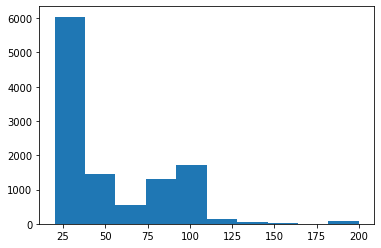

In [ ]:
plt.hist(df["list_price"])
plt.show()

- Se rechaza la hipótesis de normalidad.

In [ ]:
round(df.groupby(['bestseller']).mean(),2)


<ipython-input-82-1f0a180f8f61>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  round(df.groupby(['bestseller']).mean(),2)


id  is_practice_test_course  rating  num_published_lectures  \
bestseller                                                                     
False       5822.60                     0.02    4.28                   35.67   
True        5019.94                     0.02    4.35                   75.41   

            num_published_practice_tests  list_price  discount_price  \
bestseller                                                             
False                               0.11       47.50           12.26   
True                                0.12       57.02           12.31   

            locale_cod  instructional_level_simple_cod  category_cod  
bestseller                                                            
False             3.45                            1.80          7.21  
True              3.51                            1.65          7.05

In [ ]:
round(df.groupby(['category']).mean(),2)

<ipython-input-83-890b1c152d65>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  round(df.groupby(['category']).mean(),2)


id  is_practice_test_course  \
category                                                                
Desarrollo                           4997.54                     0.00   
Desarrollo personal                  5486.30                     0.00   
Diseño                               5024.61                     0.00   
Enseñanzas y disciplinas académicas  6148.16                     0.01   
Estilo de vida                       5559.00                     0.00   
Finanzas y contabilidad              5945.13                     0.00   
Fotografía y vídeo                   4934.77                     0.00   
Informática y software               6528.59                     0.09   
Marketing                            5183.50                     0.00   
Música                               5791.36                     0.00   
Negocios                             5678.80                     0.01   
Productividad en la oficina          4614.14                     0.00   
Salud y fitness                      6473.65                     0.00   

                                     bestseller  rating  \
category                                                  
Desarrollo                                 0.40    4.30   
Desarrollo personal                        0.12    4.37   
Diseño                                     0.19    4.29   
Enseñanzas y disciplinas académicas        0.12    4.33   
Estilo de vida                             0.08    4.39   
Finanzas y contabilidad                    0.14    4.15   
Fotografía y vídeo                         0.14    4.26   
Informática y software                     0.26    4.25   
Marketing                                  0.23    4.12   
Música                                     0.12    4.39   
Negocios                                   0.17    4.23   
Productividad en la oficina                0.24    4.26   
Salud y fitness                            0.05    4.43   

                                     num_published_lectures  \
category                                                      
Desarrollo                                            87.77   
Desarrollo personal                                   27.60   
Diseño                                                49.22   
Enseñanzas y disciplinas académicas                   35.40   
Estilo de vida                                        27.38   
Finanzas y contabilidad                               30.32   
Fotografía y vídeo                                    32.51   
Informática y software                                44.05   
Marketing                                             33.27   
Música                                                37.02   
Negocios                                              31.28   
Productividad en la oficina                           48.21   
Salud y fitness                                       24.60   

                                     num_published_practice_tests  list_price  \
category                                                                        
Desarrollo                                                   0.04       55.46   
Desarrollo personal                                          0.03       49.53   
Diseño                                                       0.04       49.63   
Enseñanzas y disciplinas académicas                          0.14       45.59   
Estilo de vida                                               0.04       43.61   
Finanzas y contabilidad                                      0.06       52.59   
Fotografía y vídeo                                           0.04       52.25   
Informática y software                                       0.40       45.89   
Marketing                                                    0.03       53.03   
Música                                                       0.01       43.63   
Negocios                                                     0.08       52.68   
Productividad en la oficina                                  

## **4. LIMPIEZA Y TRANSFORMACIÓN DE DATOS (Data Wrangling)**

**Data wrangling**, también conocido como data munging o data cleaning, es el proceso de limpieza, transformación y preparación de datos brutos para que sean adecuados y utilizable para análisis o para alimentar modelos de machine learning.

El data wrangling implica diversas tareas, entre las cuales se encuentran:

**1) Limpieza de datos:** Identificar y tratar valores faltantes, corregir errores de formato, eliminar duplicados y resolver problemas similares para garantizar la integridad y coherencia de los datos.

**2) Transformación de datos:** Convertir los datos en el formato adecuado para su análisis, como cambiar el tipo de datos, realizar cálculos, combinar columnas o dividir datos.

**3) Manipulación de datos:** Filtrar y seleccionar subconjuntos de datos relevantes para el análisis o el modelo de machine learning.

**4) Unión de datos:** Combinar datos de diferentes fuentes o tablas para obtener una visión completa y coherente del conjunto de datos.

**5)Normalización:** Escalar los valores de los datos para que se encuentren dentro de un rango específico, lo que ayuda a evitar sesgos cuando se utilizan algoritmos de aprendizaje automático sensibles a la escala.

**6) Creación de variables:** Generar nuevas variables o características a partir de las existentes para obtener información adicional y enriquecer el análisis.

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/drive/MyDrive/udemy.xlsx")

In [ ]:
# Cantidad de filas y columnas
df.shape

(11326, 21)

In [ ]:
# Visualizar los primeros registros
df.head()

id                                              title  \
0   1  Aprende a tocar Piano o Teclado (Desde nivel b...   
1   2  Curso Hipoterapia y Rehabilitacion Ecuestre On...   
2   3                                   Curso SEO Online   
3   4                             Aprende CSS3 sin dolor   
4   5                   Aprende Javascript, HTML5 y CSS3   

                                            headline  is_practice_test_course  \
0  Curso completo de Piano con TEORÍA para el fun...                    False   
1  Terapias asistidas por Caballos (Hipoterapia, ...                    False   
2  Curso SEO práctico. Aprenda a posicionar su si...                    False   
3  Realiza animaciones asombrosas, antes imposibl...                    False   
4  Aprende los principales lenguajes que dominan ...                    False   

  bestseller captions    rating  num_published_lectures  \
0         no    es_LA  4.535809                      58   
1         no    es_ES  4.133590                      32   
2         no    es_ES  3.841912                      76   
3         no    es_MX  4.039739                      68   
4        yes      NaN  4.643154                     550   

   num_published_practice_tests locale  ... instructional_level_simple  \
0                             1  es_LA  ...          Todos los niveles   
1                             0  es_ES  ...               Principiante   
2                             0  es_ES  ...          Todos los niveles   
3                             0  es_MX  ...                 Intermedio   
4                             0  es_MX  ...          Todos los niveles   

  published_date last_update_date content_info_short instructors  \
0     2012-01-26       2021-05-19            4 horas      121211   
1     2012-06-10       2015-12-17           10 horas      236127   
2     2012-07-03       2020-02-28          6,5 horas        3851   
3     2012-08-31       2019-09-08          9,5 horas      171706   
4     2012-09-02       2021-03-04         70,5 horas      171706   

         category                 subcategory  \
0          Música                       Piano   
1  Estilo de vida  Adiestramiento de mascotas   
2       Marketing                         SEO   
3      Desarrollo                         CSS   
4      Desarrollo                  JavaScript   

                                          objectives list_price discount_price  
0  Aprende Piano desde nivel básico. Estudiaras l...     $34.99            $12  
1  La Hipoterapia y la Psicología.La Hipoterapia ...     $99.99            NaN  
2  Entender los fundamentos del SEO.Aprender a ha...     $94.99            $12  
3  El alumno conocerá las principales característ...     $19.99            $12  
4  Desarrollar páginas dinámicas con JavaScript, ...     $29.99            $12  

[5 rows x 21 columns]

In [ ]:
# Visualizar los últimos registros
df.tail()

id                                              title  \
11321  11322  Bootcamp de Redacción Publicitaria (Copywritin...   
11322  11323     Estructuras de Acero I: Elementos a Compresión   
11323  11324                       Fortinet Security 6.4 - NSE4   
11324  11325                         Sanando a tu Niña Interior   
11325  11326  Amazon AWS Certified Solutions Architect SAA-C...   

                                                headline  \
11321  Puede escribir un texto que venda: redes socia...   
11322  Conceptos y aplicación con referencia al AISC ...   
11323  Conviértase en un especialista en el corto tie...   
11324  ¡Reencuéntrate con tu Niña Interior, sana tus ...   
11325  Aprueba el Amazon AWS Certified Solutions Arch...   

       is_practice_test_course bestseller captions    rating  \
11321                    False        yes    es_LA  4.155691   
11322                    False         no    es_LA  4.818863   
11323                    False         no      NaN  3.740466   
11324                    False         no      NaN  4.430968   
11325                     True         no      NaN  5.000000   

       num_published_lectures  num_published_practice_tests locale  ...  \
11321                      65                             0  es_LA  ...   
11322                      16                             0  es_LA  ...   
11323                      40                             0  es_ES  ...   
11324                      18                             0  es_MX  ...   
11325                       0                             5  es_ES  ...   

      instructional_level_simple published_date last_update_date  \
11321          Todos los niveles     2021-04-21       2021-04-21   
11322                 Intermedio     2021-04-22       2021-04-22   
11323                 Intermedio     2021-04-22       2021-04-22   
11324          Todos los niveles     2021-05-21       2021-05-24   
11325          Todos los niveles     2021-05-28              NaN   

      content_info_short                instructors  \
11321            5 horas  19701574,317821,131047686   
11322          5,5 horas                   31705782   
11323            5 horas                   50387672   
11324          2,5 horas                   64540522   
11325      309 preguntas                  144633964   

                                  category  \
11321                            Marketing   
11322  Enseñanzas y disciplinas académicas   
11323               Informática y software   
11324                  Desarrollo personal   
11325               Informática y software   

                                subcategory  \
11321     Redacción de textos publicitarios   
11322                Ingeniería estructural   
11323                          Fortinet NSE   
11324  Superación de traumas de la infancia   
11325                     Certificación AWS   

                                              objectives list_price  \
11321  Aprenderá a redactar la mejor copia para cualq...     $94.99   
11322  Calcular la capacidad a compresión de elemento...     $89.99   
11323  Aprenderar a implementar las distintas funcion...     $24.99   
11324  Descubrirás porque es que actúas como actúas, ...     $89.99   
11325  Amazon AWS Certified Solutions Architect (SAA-...     $19.99   

      discount_price  
11321            $12  
11322            $12  
11323            $12  
11324            $12  
11325            $12  

[5 rows x 21 columns]

In [ ]:
# Tipos de datos de cada variable
# "object" es cadena de caracteres
df.dtypes

id                                int64
title                            object
headline                         object
is_practice_test_course            bool
bestseller                       object
captions                         object
rating                          float64
num_published_lectures            int64
num_published_practice_tests      int64
locale                           object
created_date                     object
instructional_level_simple       object
published_date                   object
last_update_date                 object
content_info_short               object
instructors                      object
category                         object
subcategory                      object
objectives                       object
list_price                       object
discount_price                   object
dtype: object

### **4.1. Revisión de datos duplicados**

In [ ]:
#Revisión de Valores Duplicados
df.duplicated().sum()

0

**Interpretación:**

- No existen datos (lineas) duplicados.

### **4.2. Revisión de datos nulos o vacíos**

In [ ]:
#Revisión de Valores Nulos o Vacíos
df.isnull().sum() # Busca valores vacíos, como no son vacíos indica "False"
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            11326 non-null  int64  
 1   title                         11326 non-null  object 
 2   headline                      11325 non-null  object 
 3   is_practice_test_course       11326 non-null  bool   
 4   bestseller                    11326 non-null  object 
 5   captions                      9330 non-null   object 
 6   rating                        11326 non-null  float64
 7   num_published_lectures        11326 non-null  int64  
 8   num_published_practice_tests  11326 non-null  int64  
 9   locale                        11326 non-null  object 
 10  created_date                  11326 non-null  object 
 11  instructional_level_simple    11321 non-null  object 
 12  published_date                11326 non-null  object 
 13  l

In [ ]:
# Valores nulos en cada columna del DataFrame
df.isna().sum().sort_values(ascending=False)

captions                        1996
last_update_date                1293
discount_price                   993
subcategory                       20
instructional_level_simple         5
headline                           1
objectives                         1
instructors                        1
published_date                     0
list_price                         0
category                           0
content_info_short                 0
id                                 0
title                              0
locale                             0
num_published_practice_tests       0
num_published_lectures             0
rating                             0
bestseller                         0
is_practice_test_course            0
created_date                       0
dtype: int64

In [ ]:
# Valores nulos en cada columna del DataFrame
df.isnull().sum().sort_values(ascending=False)

captions                        1996
last_update_date                1293
discount_price                   993
subcategory                       20
instructional_level_simple         5
headline                           1
objectives                         1
instructors                        1
published_date                     0
list_price                         0
category                           0
content_info_short                 0
id                                 0
title                              0
locale                             0
num_published_practice_tests       0
num_published_lectures             0
rating                             0
bestseller                         0
is_practice_test_course            0
created_date                       0
dtype: int64

In [ ]:
# Columnas con porcentaje de datos nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

captions                      17.623168
last_update_date              11.416210
discount_price                 8.767438
subcategory                    0.176585
instructional_level_simple     0.044146
headline                       0.008829
objectives                     0.008829
instructors                    0.008829
dtype: float64

<Axes: >

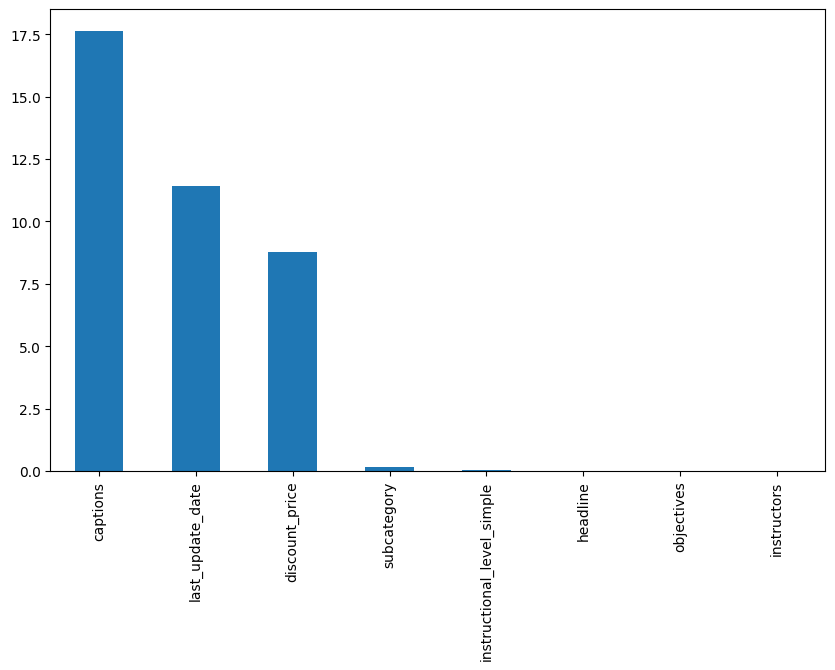

In [ ]:
# Visualización gráfica de datos nulos
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

**Interpretación:**


* El conjunto de datos tiene determinados atributos (variables) con valores del tipo Non-Null. Ellos son "headline","captions", "instructional_level_simple", "last_update_date", "instructors","subcategory", "objectives", "discount_price".

* El método para manejar valores faltantes o nulos depende de las características del conjunto de datos, el propósito del análisis y la disponibilidad de otros datos. Es importante analizar cada caso por separado.

* También es importante realizar un seguimiento de los datos que se imputaron, ya que esto puede introducir sesgos en el análisis.

### **4.3. Heatmap de datos nulos o vacíos**

<Axes: >

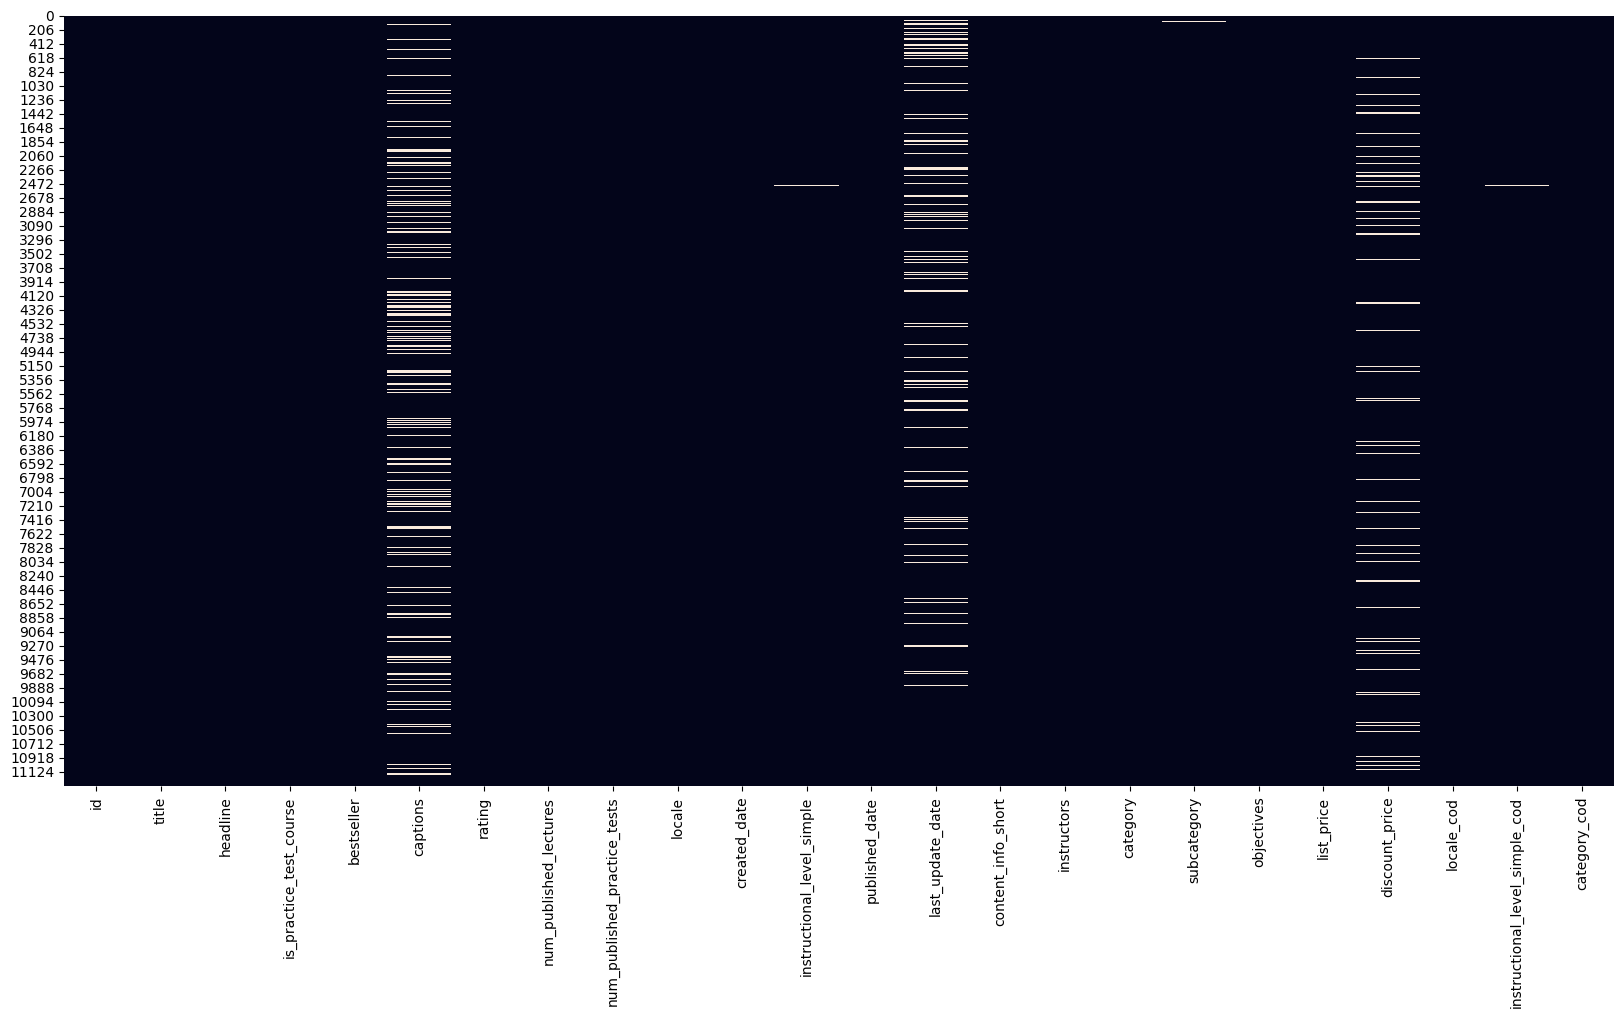

In [ ]:
# Heatmap de valores perdidos
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False,ax=ax)

**Interpretación:**

- Se observa que existen valores perdidos donde se ven líneas en blanco. Se puede observar que hay 3 atributos con problemas("captions","last_update_date", "discount_price") y 2 atributos que prácticamente no tienen problemas ("instructional_level_simple","subcategory").

- El resto de los atributos en los que se observa todo en negro, significan que los valores están bien.

<Axes: >

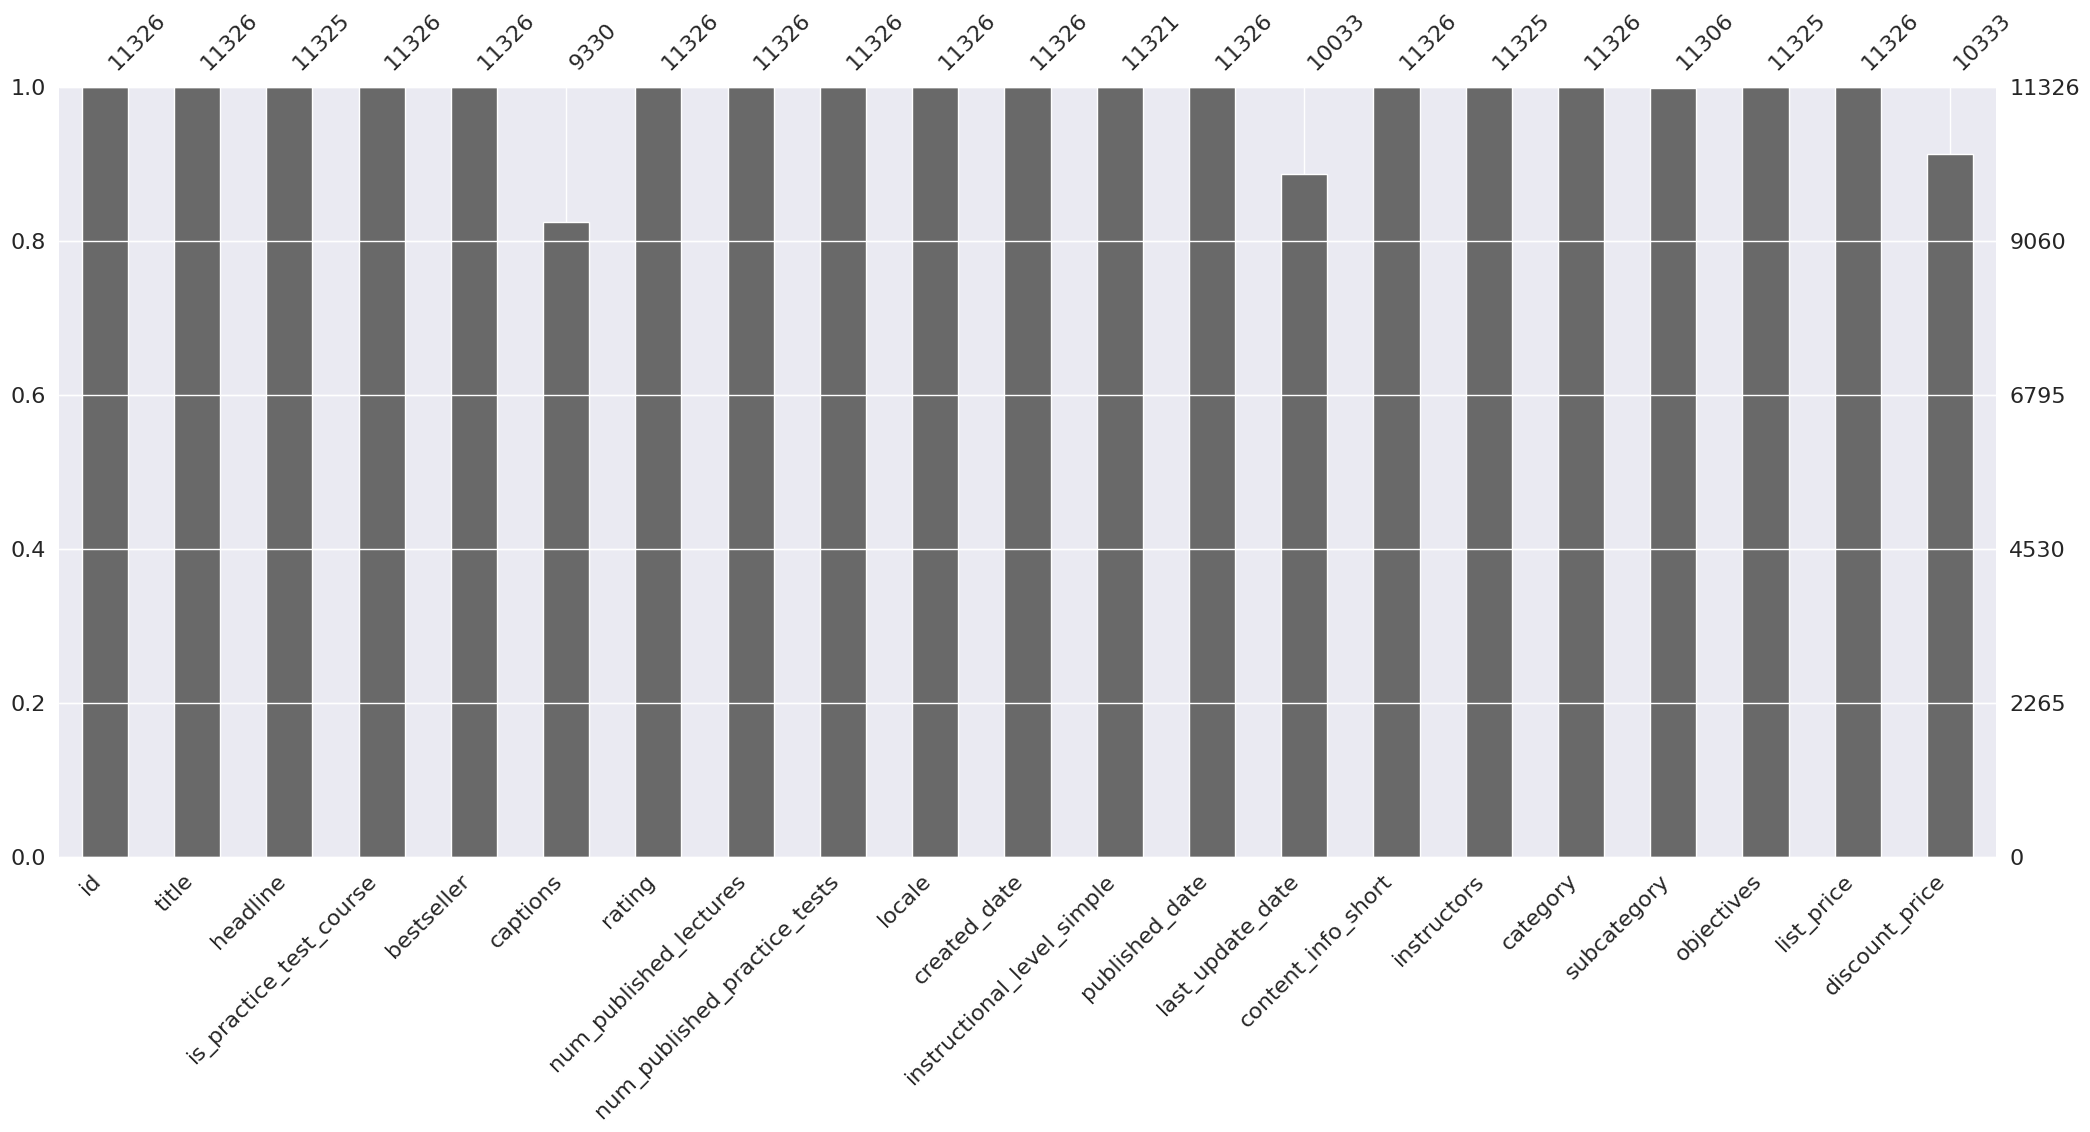

In [ ]:
#Otra manera de visualizar valores perdidos
import missingno as msno
msno.bar(df)

In [ ]:
# Valores unicos de cada columna
df.nunique().sort_values()

is_practice_test_course             2
bestseller                          2
instructional_level_simple          4
locale                              6
num_published_practice_tests        7
discount_price                     12
category                           13
list_price                         29
captions                           58
content_info_short                268
num_published_lectures            358
subcategory                      1887
last_update_date                 1916
published_date                   2080
created_date                     2394
instructors                      5387
rating                           9920
headline                        11094
objectives                      11129
title                           11245
id                              11326
dtype: int64

### **4.4. Frecuencia**

A continuación se retoma un cálculo de las frecuencias de las variables categóricas más relevantes.

In [ ]:
# Frecuencias de la variable "is_practice_test_course"
df["is_practice_test_course"].value_counts()

False    11128
True       198
Name: is_practice_test_course, dtype: int64

In [ ]:
# Frecuencias de la variable "bestseller"
df["bestseller"].value_counts()

no     9081
yes    2245
Name: bestseller, dtype: int64

In [ ]:
# Frecuencias de la variable "instructional_level_simple"
df["instructional_level_simple"].value_counts()

Todos los niveles    5233
Principiante         3830
Intermedio           1863
Experto               395
Name: instructional_level_simple, dtype: int64

In [ ]:
# Frecuencias de la variable "category"
df["category"].value_counts()

Informática y software                 1819
Desarrollo                             1606
Enseñanzas y disciplinas académicas    1266
Negocios                               1191
Desarrollo personal                    1129
Diseño                                 1124
Marketing                               600
Salud y fitness                         565
Estilo de vida                          547
Finanzas y contabilidad                 487
Música                                  436
Productividad en la oficina             368
Fotografía y vídeo                      188
Name: category, dtype: int64

### **4.5. Etiqueta de datos faltantes (creación de variables)**

In [ ]:
# Creación de nuevas columnas del tipo booleanas
df.loc[:,'captions_na'] = df['captions'].isna()
df.loc[:,'last_update_date_na'] = df['last_update_date'].isna()
df.loc[:,'discount_price_na'] = df['discount_price'].isna()
df.loc[:,'subcategory_na'] = df['subcategory'].isna()
df.loc[:,'instructional_level_simple_na'] = df['instructional_level_simple'].isna()
df.loc[:,'headline_na'] = df['headline'].isna()
df.loc[:,'objectives_na'] = df['objectives'].isna()
df.loc[:,'instructors_na'] = df['instructors'].isna()

In [ ]:
df.head()

id                                              title  \
0   1  Aprende a tocar Piano o Teclado (Desde nivel b...   
1   2  Curso Hipoterapia y Rehabilitacion Ecuestre On...   
2   3                                   Curso SEO Online   
3   4                             Aprende CSS3 sin dolor   
4   5                   Aprende Javascript, HTML5 y CSS3   

                                            headline  is_practice_test_course  \
0  Curso completo de Piano con TEORÍA para el fun...                    False   
1  Terapias asistidas por Caballos (Hipoterapia, ...                    False   
2  Curso SEO práctico. Aprenda a posicionar su si...                    False   
3  Realiza animaciones asombrosas, antes imposibl...                    False   
4  Aprende los principales lenguajes que dominan ...                    False   

   bestseller captions    rating  num_published_lectures  \
0       False    es_LA  4.535809                      58   
1       False    es_ES  4.133590                      32   
2       False    es_ES  3.841912                      76   
3       False    es_MX  4.039739                      68   
4        True      NaN  4.643154                     550   

   num_published_practice_tests locale  ... instructional_level_simple_cod  \
0                             1  es_LA  ...                            1.0   
1                             0  es_ES  ...                            2.0   
2                             0  es_ES  ...                            1.0   
3                             0  es_MX  ...                            3.0   
4                             0  es_MX  ...                            1.0   

  category_cod captions_na last_update_date_na discount_price_na  \
0            1       False               False             False   
1            2       False               False              True   
2            3       False               False             False   
3            4       False               False             False   
4            4        True               False             False   

  subcategory_na instructional_level_simple_na headline_na objectives_na  \
0          False                         False       False         False   
1          False                         False       False         False   
2          False                         False       False         False   
3          False                         False       False         False   
4          False                         False       False         False   

   instructors_na  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 32 columns]

Al localizar los datos nulos se procede a realizar la limpieza de datos. Ahora se visualizará como trabajar con ellos. A partir de este punto se estará modificando datos.

### **4.6. Limpieza de variables**

In [ ]:
# Se arreglan las columnas 'captions','subcategory','headline','objectives','instructors' reemplazando NAN  por "Desconocido"
col_inter= ['captions','subcategory','headline','objectives','instructors']
for i in col_inter:
  df[i] = df[i].fillna('Desconocido')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             11326 non-null  int64  
 1   title                          11326 non-null  object 
 2   headline                       11326 non-null  object 
 3   is_practice_test_course        11326 non-null  bool   
 4   bestseller                     11326 non-null  object 
 5   captions                       11326 non-null  object 
 6   rating                         11326 non-null  float64
 7   num_published_lectures         11326 non-null  int64  
 8   num_published_practice_tests   11326 non-null  int64  
 9   locale                         11326 non-null  object 
 10  created_date                   11326 non-null  object 
 11  instructional_level_simple     11321 non-null  object 
 12  published_date                 11326 non-null 

In [ ]:
# Se arregla la columna 'last_update_date' reemplazando NAN  por su "published_date"
df.loc[pd.isna(df["last_update_date"]), "last_update_date"] = df[pd.isna(df["last_update_date"])]["published_date"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             11326 non-null  int64  
 1   title                          11326 non-null  object 
 2   headline                       11326 non-null  object 
 3   is_practice_test_course        11326 non-null  bool   
 4   bestseller                     11326 non-null  object 
 5   captions                       11326 non-null  object 
 6   rating                         11326 non-null  float64
 7   num_published_lectures         11326 non-null  int64  
 8   num_published_practice_tests   11326 non-null  int64  
 9   locale                         11326 non-null  object 
 10  created_date                   11326 non-null  object 
 11  instructional_level_simple     11321 non-null  object 
 12  published_date                 11326 non-null 

In [ ]:
#Se convierte la columna "discount_price" de Object a float64
df["discount_price"] = df["discount_price"].str.replace('$','')
df["discount_price"] = df.discount_price.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             11326 non-null  int64  
 1   title                          11326 non-null  object 
 2   headline                       11326 non-null  object 
 3   is_practice_test_course        11326 non-null  bool   
 4   bestseller                     11326 non-null  object 
 5   captions                       11326 non-null  object 
 6   rating                         11326 non-null  float64
 7   num_published_lectures         11326 non-null  int64  
 8   num_published_practice_tests   11326 non-null  int64  
 9   locale                         11326 non-null  object 
 10  created_date                   11326 non-null  object 
 11  instructional_level_simple     11321 non-null  object 
 12  published_date                 11326 non-null 

<ipython-input-39-cfc8ebb1ab9e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["discount_price"] = df["discount_price"].str.replace('$','')


In [ ]:
#Se convierte la columna "list_price" de Object a float64
df["list_price"] = df["list_price"].str.replace('$','')
df["list_price"] = df.list_price.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             11326 non-null  int64  
 1   title                          11326 non-null  object 
 2   headline                       11326 non-null  object 
 3   is_practice_test_course        11326 non-null  bool   
 4   bestseller                     11326 non-null  object 
 5   captions                       11326 non-null  object 
 6   rating                         11326 non-null  float64
 7   num_published_lectures         11326 non-null  int64  
 8   num_published_practice_tests   11326 non-null  int64  
 9   locale                         11326 non-null  object 
 10  created_date                   11326 non-null  object 
 11  instructional_level_simple     11321 non-null  object 
 12  published_date                 11326 non-null 

<ipython-input-40-4922755d5b9d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["list_price"] = df["list_price"].str.replace('$','')


In [ ]:
#Se convierte la columna "bestseller" de object a bool
df['bestseller']= df['bestseller'].replace(["yes"],1)
df['bestseller']= df['bestseller'].replace(["no"],0)
df["bestseller"] = df.bestseller.astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             11326 non-null  int64  
 1   title                          11326 non-null  object 
 2   headline                       11326 non-null  object 
 3   is_practice_test_course        11326 non-null  bool   
 4   bestseller                     11326 non-null  bool   
 5   captions                       11326 non-null  object 
 6   rating                         11326 non-null  float64
 7   num_published_lectures         11326 non-null  int64  
 8   num_published_practice_tests   11326 non-null  int64  
 9   locale                         11326 non-null  object 
 10  created_date                   11326 non-null  object 
 11  instructional_level_simple     11321 non-null  object 
 12  published_date                 11326 non-null 

In [ ]:
# Se convierte la columna "Date" en "Datetime64"
df['created_date']=pd.to_datetime(df['created_date'],errors='coerce')
df['published_date']=pd.to_datetime(df['published_date'],errors='coerce')
df['last_update_date']=pd.to_datetime(df['last_update_date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             11326 non-null  int64         
 1   title                          11326 non-null  object        
 2   headline                       11326 non-null  object        
 3   is_practice_test_course        11326 non-null  bool          
 4   bestseller                     11326 non-null  bool          
 5   captions                       11326 non-null  object        
 6   rating                         11326 non-null  float64       
 7   num_published_lectures         11326 non-null  int64         
 8   num_published_practice_tests   11326 non-null  int64         
 9   locale                         11326 non-null  object        
 10  created_date                   11326 non-null  datetime64[ns]
 11  instructional_l

In [ ]:
#SE CONSIDERÓ REEMPLAZAR LOS "NAN" A "0" PARA PODER CONVERTIRLOS EN INT64
# Se convierte la columna "instructional_level_simple" de object a float64
df['instructional_level_simple']= df['instructional_level_simple'].replace(['Todos los niveles'],0)
df['instructional_level_simple']= df['instructional_level_simple'].replace(['Principiante'],1)
df['instructional_level_simple']= df['instructional_level_simple'].replace(['Intermedio'],2)
df['instructional_level_simple']= df['instructional_level_simple'].replace(['Experto'],3)
#Se convirtió los valores NAN en 0
df.instructional_level_simple=df.instructional_level_simple.fillna(0)
#Se convierte la columna "instructional_level_simple" de float64 a int64
df.instructional_level_simple=df.instructional_level_simple.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             11326 non-null  int64         
 1   title                          11326 non-null  object        
 2   headline                       11326 non-null  object        
 3   is_practice_test_course        11326 non-null  bool          
 4   bestseller                     11326 non-null  bool          
 5   captions                       11326 non-null  object        
 6   rating                         11326 non-null  float64       
 7   num_published_lectures         11326 non-null  int64         
 8   num_published_practice_tests   11326 non-null  int64         
 9   locale                         11326 non-null  object        
 10  created_date                   11326 non-null  datetime64[ns]
 11  instructional_l

In [ ]:
# Se convierte la columna "Locale" de object a bool (Mediante DUMMY)
locale_dummy=pd.get_dummies(df["locale"],prefix="locale")
df=pd.concat([df,locale_dummy],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             11326 non-null  int64         
 1   title                          11326 non-null  object        
 2   headline                       11326 non-null  object        
 3   is_practice_test_course        11326 non-null  bool          
 4   bestseller                     11326 non-null  bool          
 5   captions                       11326 non-null  object        
 6   rating                         11326 non-null  float64       
 7   num_published_lectures         11326 non-null  int64         
 8   num_published_practice_tests   11326 non-null  int64         
 9   locale                         11326 non-null  object        
 10  created_date                   11326 non-null  datetime64[ns]
 11  instructional_l

In [ ]:
# Se convierte la columna "category" de object a bool (Mediante DUMMY)
category_dummy=pd.get_dummies(df["category"],prefix="category")
df=pd.concat([df,category_dummy],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            11326 non-null  int64         
 1   title                                         11326 non-null  object        
 2   headline                                      11326 non-null  object        
 3   is_practice_test_course                       11326 non-null  bool          
 4   bestseller                                    11326 non-null  bool          
 5   captions                                      11326 non-null  object        
 6   rating                                        11326 non-null  float64       
 7   num_published_lectures                        11326 non-null  int64         
 8   num_published_practice_tests                  11326 non-null  int6

In [ ]:
from sklearn.impute import SimpleImputer
# Imputación discout_price tiene valores perdidos
df['discount_price'].isna().sum()

993

In [ ]:
# Imputación de valores perdidos de "discount_price" por la mediana de dicha variable
imp = SimpleImputer(strategy='median')
# strategy == mean, median, most_frequent, constant

df.loc[:, ['discount_price']] = imp.fit_transform(df[['discount_price']])
df.loc[:, ['discount_price']]

discount_price
0                12.0
1                12.0
2                12.0
3                12.0
4                12.0
...               ...
11321            12.0
11322            12.0
11323            12.0
11324            12.0
11325            12.0

[11326 rows x 1 columns]

In [ ]:
# Verificación de que no existen valores nulos o vacíos
df.isna().sum().sort_values(ascending=False)

id                                              0
title                                           0
headline_na                                     0
objectives_na                                   0
instructors_na                                  0
locale_es_CL                                    0
locale_es_CO                                    0
locale_es_ES                                    0
locale_es_LA                                    0
locale_es_MX                                    0
locale_es_VE                                    0
category_Desarrollo                             0
category_Desarrollo personal                    0
category_Diseño                                 0
category_Enseñanzas y disciplinas académicas    0
category_Estilo de vida                         0
category_Finanzas y contabilidad                0
category_Fotografía y vídeo                     0
category_Informática y software                 0
category_Marketing                              0


### **4.7. Verificación que no existen datos nulos o vacíos**

<Axes: >

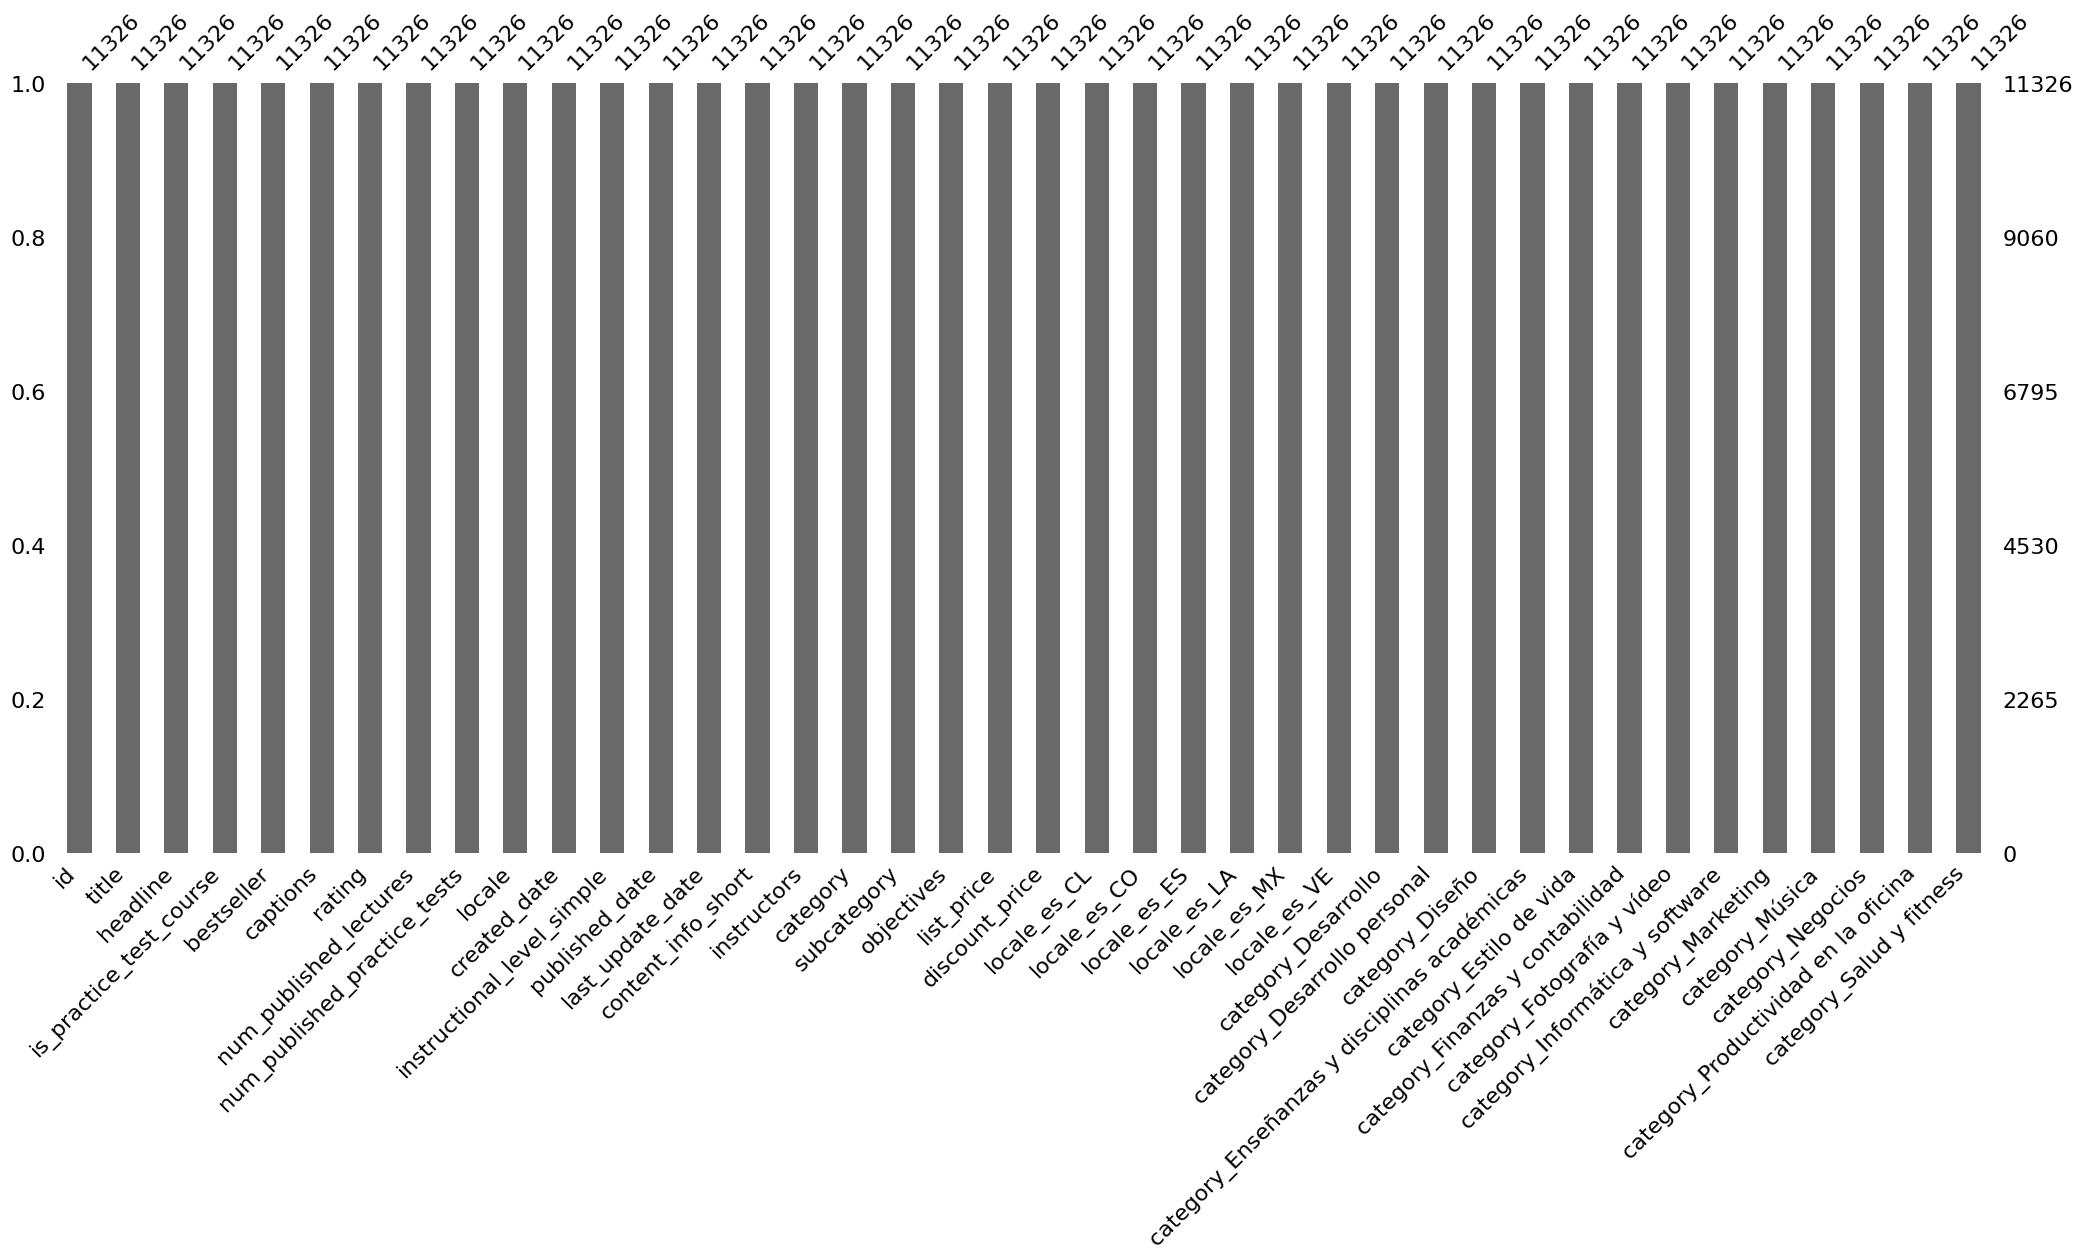

In [ ]:
# Otra manera de visualizar valores perdidos
import missingno as msno
msno.bar(df)

**Interpretación:**

* En el gráfico se observa que ya no existen variables con valores nulos o vacíos, siendo la cantidad de filas completas igual a 11.326 para cada una de las variables.

In [ ]:
#Exportar a Excel el Dataframe con datos limpios sin eliminar outliers
df.to_excel('df_limpio_con_outliers.xlsx',index=False)

### **4.8. Eliminación de outliers en las variables analizadas**

- Se eliminan los outliers de las variables identificadas en EDA, para ello se utilizarán gráficos Boxplot para identificar aquellos valores atípicos y se procederá a su reemplazo o imputación por la media o mediana de cada variable.

- Al mismo tiempo se visualizarán mediante gráficos boxplot las imputaciones resultantes, permitiendo observar el ajustes de los outliers.

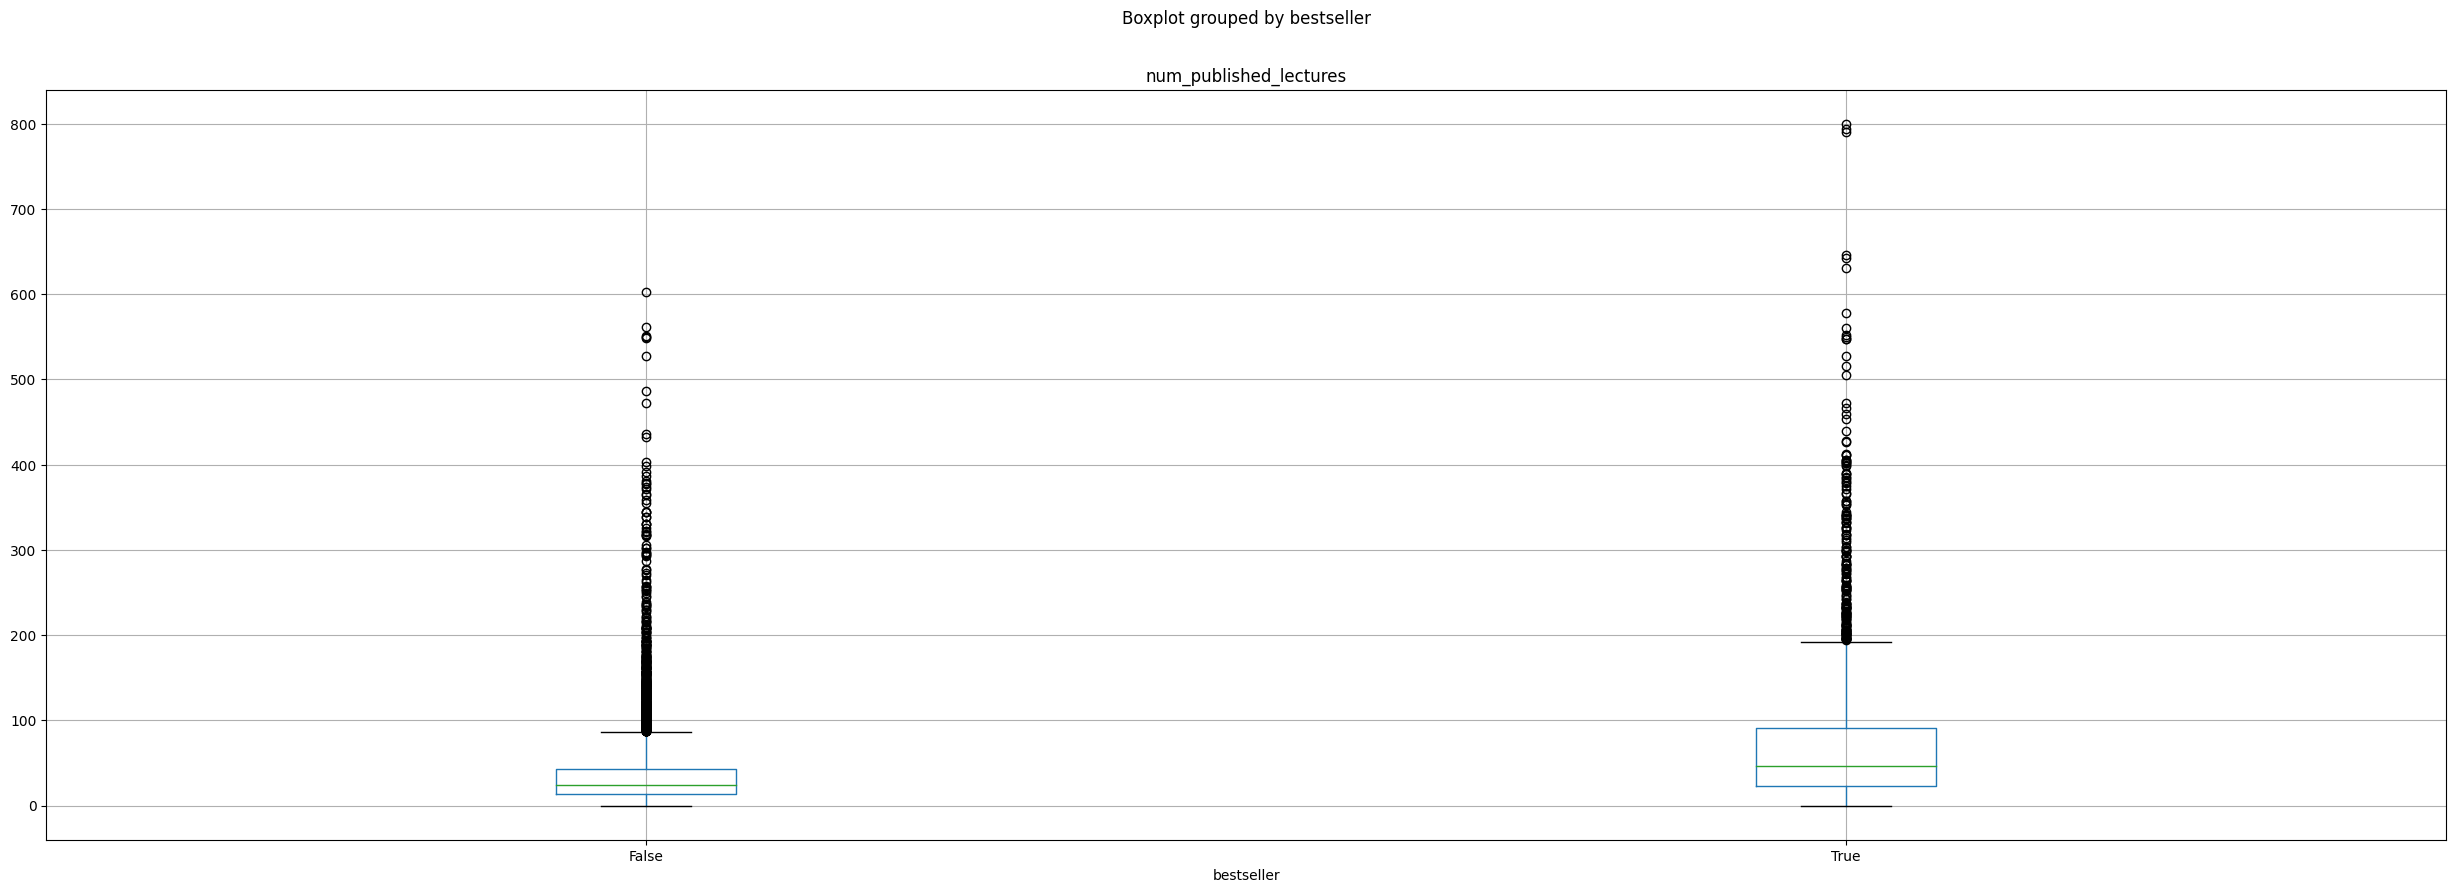

In [ ]:
# Gráfico boxplot de "bestseller" by "num_published_lectures"
ax = df.boxplot(column=["num_published_lectures"], by="bestseller", figsize=(30, 10))

In [ ]:
# Mediana de "num_published_lectures" según "bestseller"
df.groupby("bestseller")[["num_published_lectures"]].median()

num_published_lectures
bestseller                        
False                         24.0
True                          46.0

In [ ]:
# Media de "num_published_lectures" según "bestseller"
df.groupby("bestseller")[["num_published_lectures"]].mean()

num_published_lectures
bestseller                        
False                    35.672063
True                     75.410245

In [ ]:
# Imputación de valores atípicos en "num_published_lectures" por la media según tipo de "bestseller"
df.loc[(df["num_published_lectures"]>80) & (df["bestseller"] == 0), "num_published_lectures"] = df["num_published_lectures"].mean()
df.loc[(df["num_published_lectures"]>55) & (df["bestseller"] == 1), "num_published_lectures"] = df["num_published_lectures"].mean()
df.loc[(df["num_published_lectures"]<5) & (df["bestseller"] == 1), "num_published_lectures"] = df["num_published_lectures"].mean()

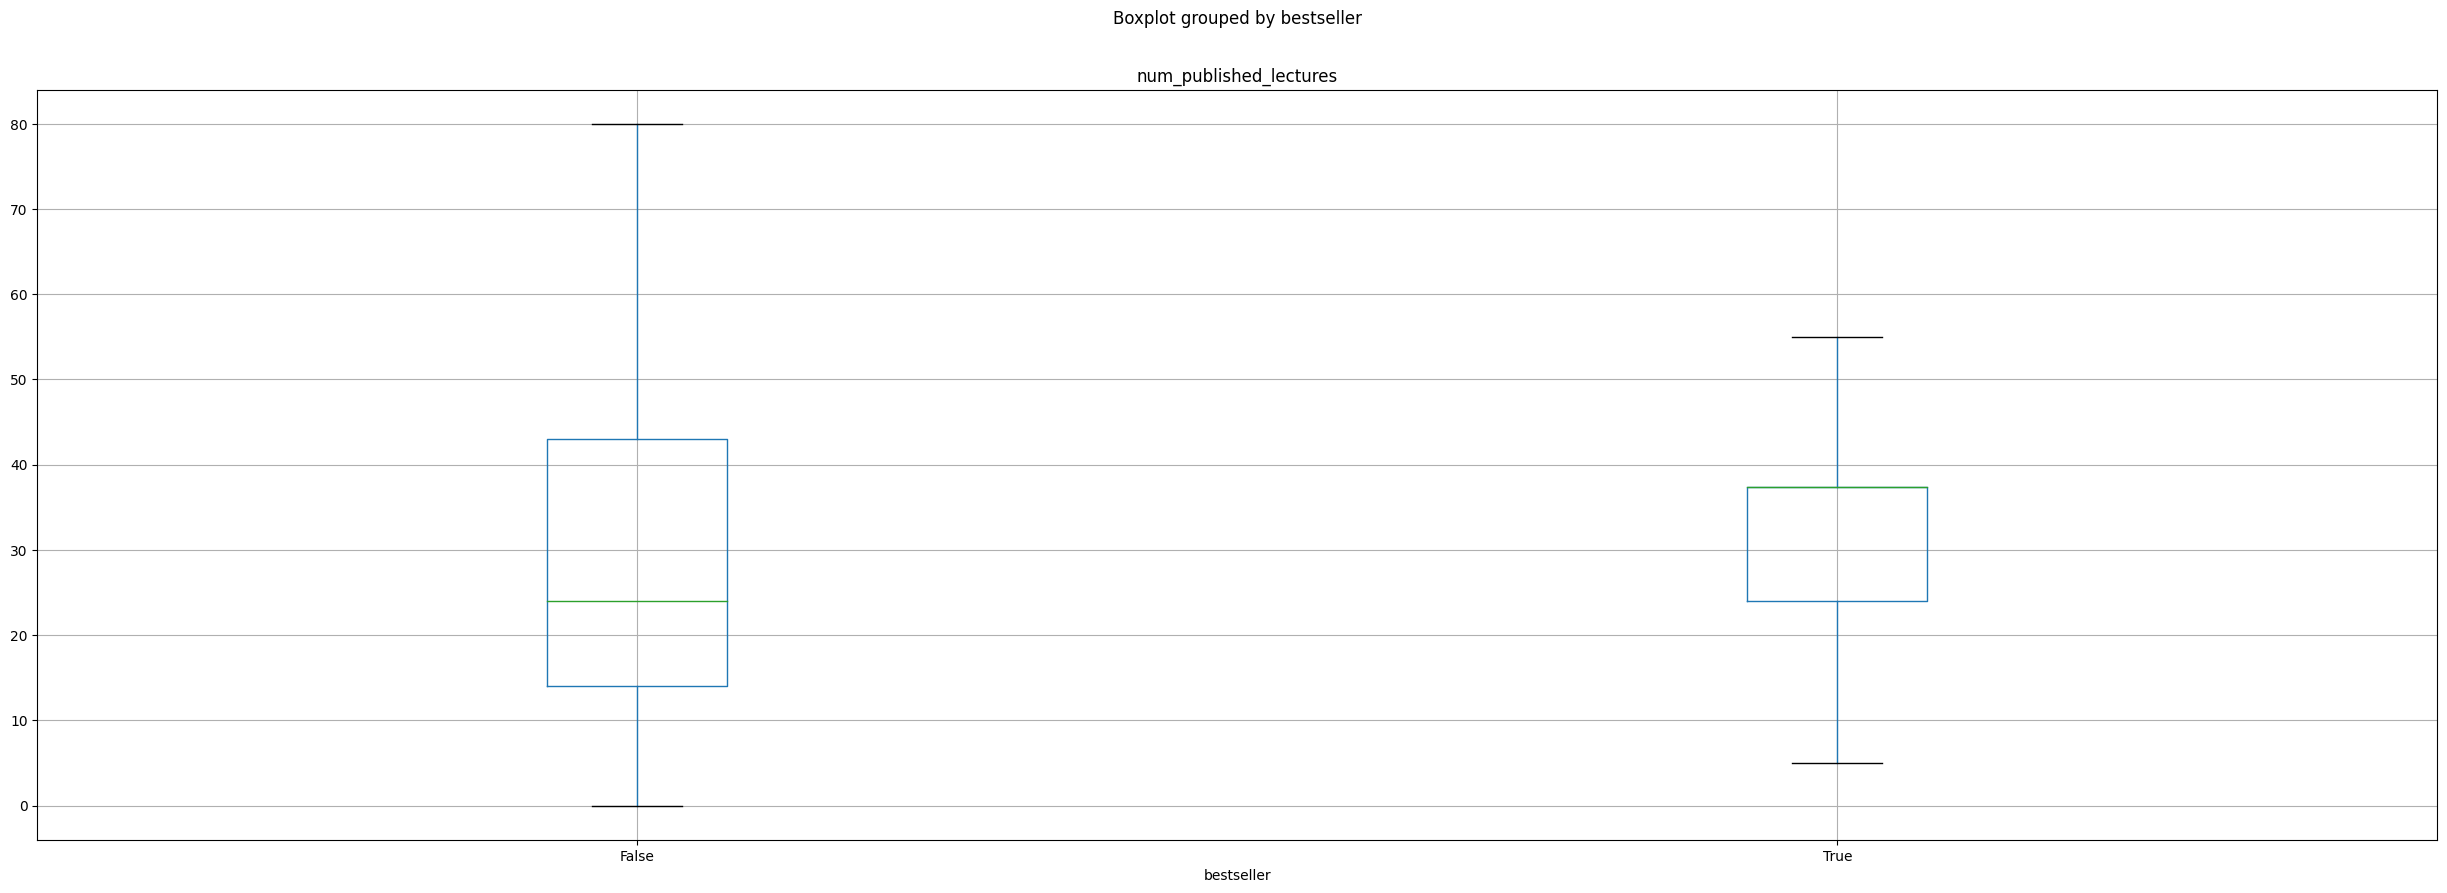

In [ ]:
# Gráfico boxplot de "bestseller" by "num_published_lectures"  luego de la imputación
ax = df.boxplot(column=["num_published_lectures"], by="bestseller", figsize=(30, 10))

<Axes: title={'center': 'rating'}, xlabel='bestseller'>

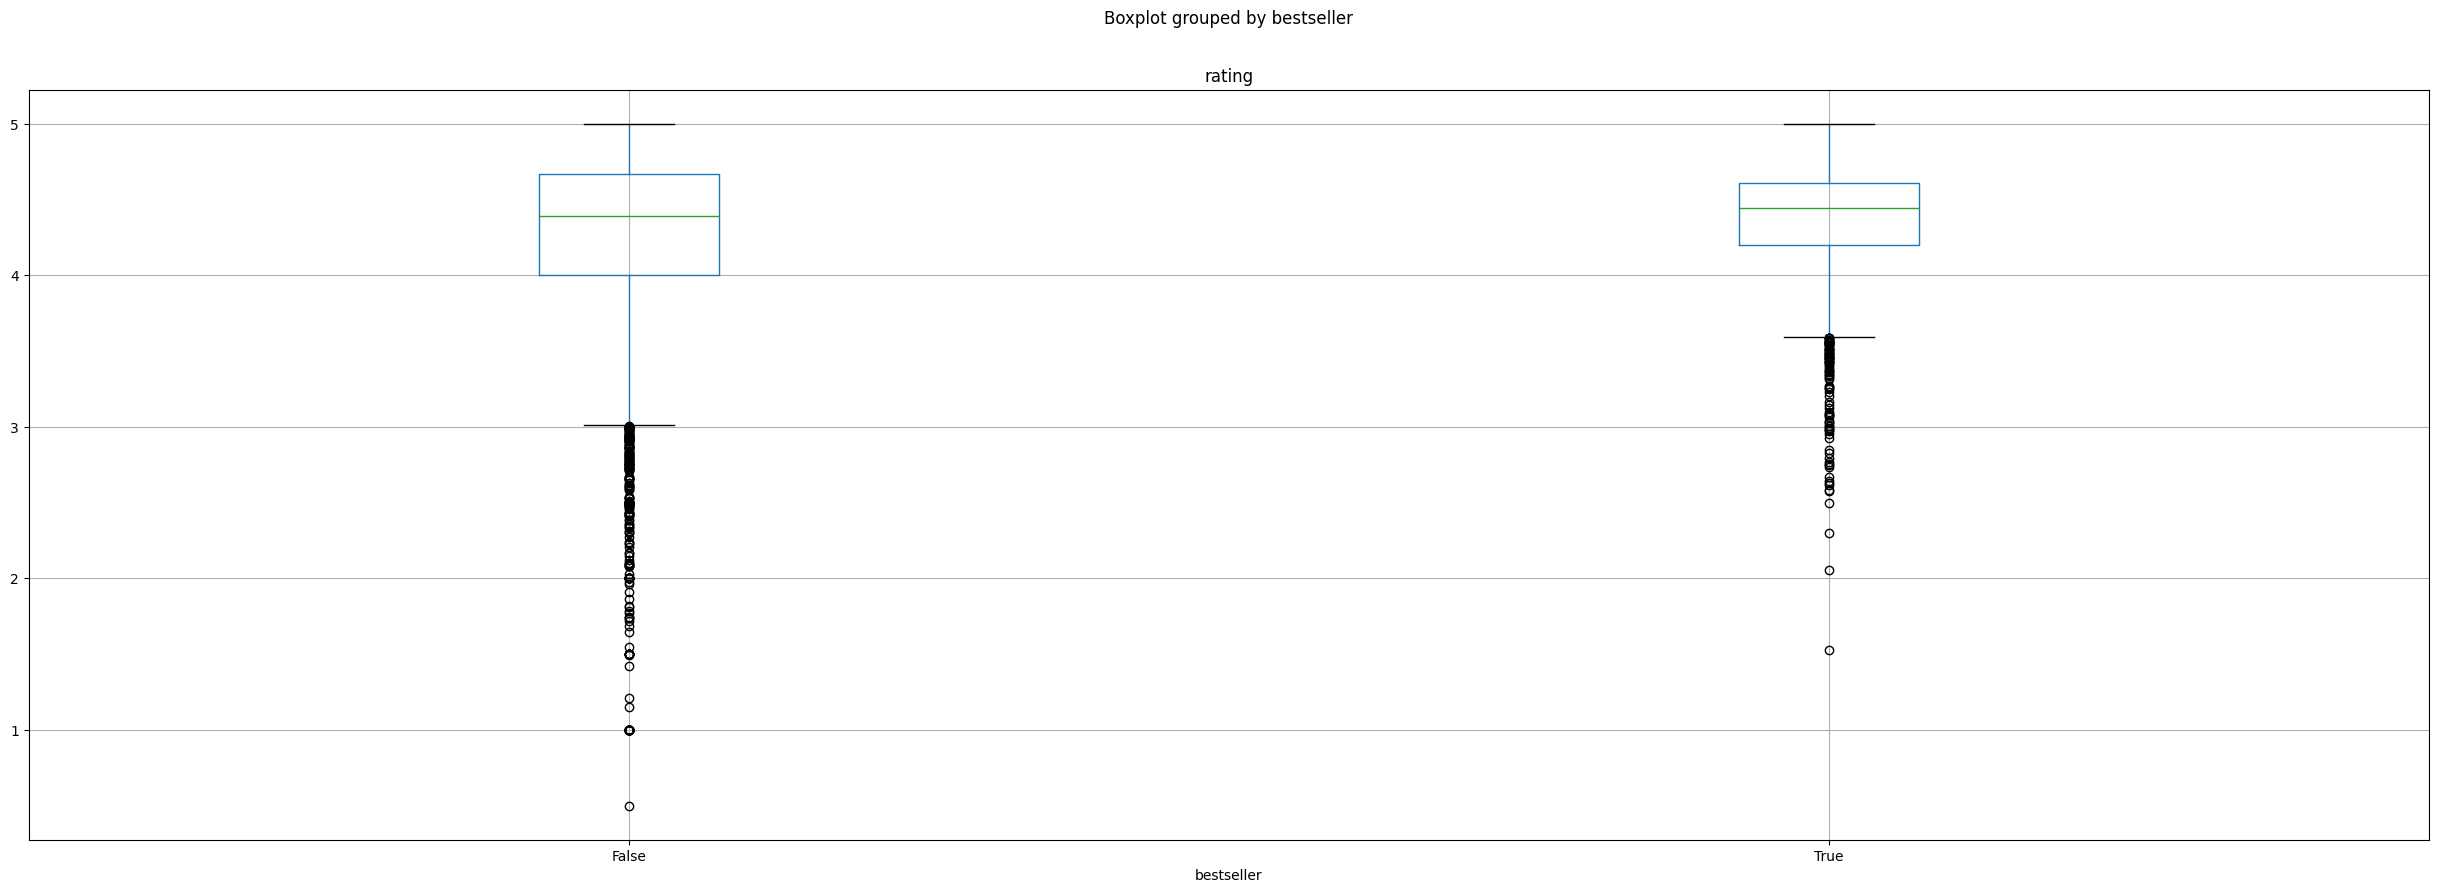

In [ ]:
# Gráfico boxplot de "bestseller" by "rating"
df.boxplot(column=["rating"], by="bestseller", figsize=(30, 10))

In [ ]:
# Mediana de "rating" según "bestseller"
df.groupby("bestseller")[["rating"]].median()

rating
bestseller          
False       4.391740
True        4.445913

In [ ]:
# Media de "rating" según "bestseller"
df.groupby("bestseller")[["rating"]].mean()

rating
bestseller          
False       4.277213
True        4.354627

In [ ]:
# Máximo de "rating" según "bestseller"
df.groupby("bestseller")[["rating"]].max()

rating
bestseller        
False          5.0
True           5.0

In [ ]:
# Mínimo de "rating" según "bestseller"
df.groupby("bestseller")[["rating"]].min()

rating
bestseller          
False       0.500000
True        1.530249

In [ ]:
# Imputación de valores atípicos en "rating" por la media según tipo de "bestseller"
df.loc[(df["rating"]<3.5) & (df["bestseller"] == 0), "rating"] = df["rating"].mean()
df.loc[(df["rating"]<3.9) & (df["bestseller"] == 1), "rating"] = df["rating"].mean()

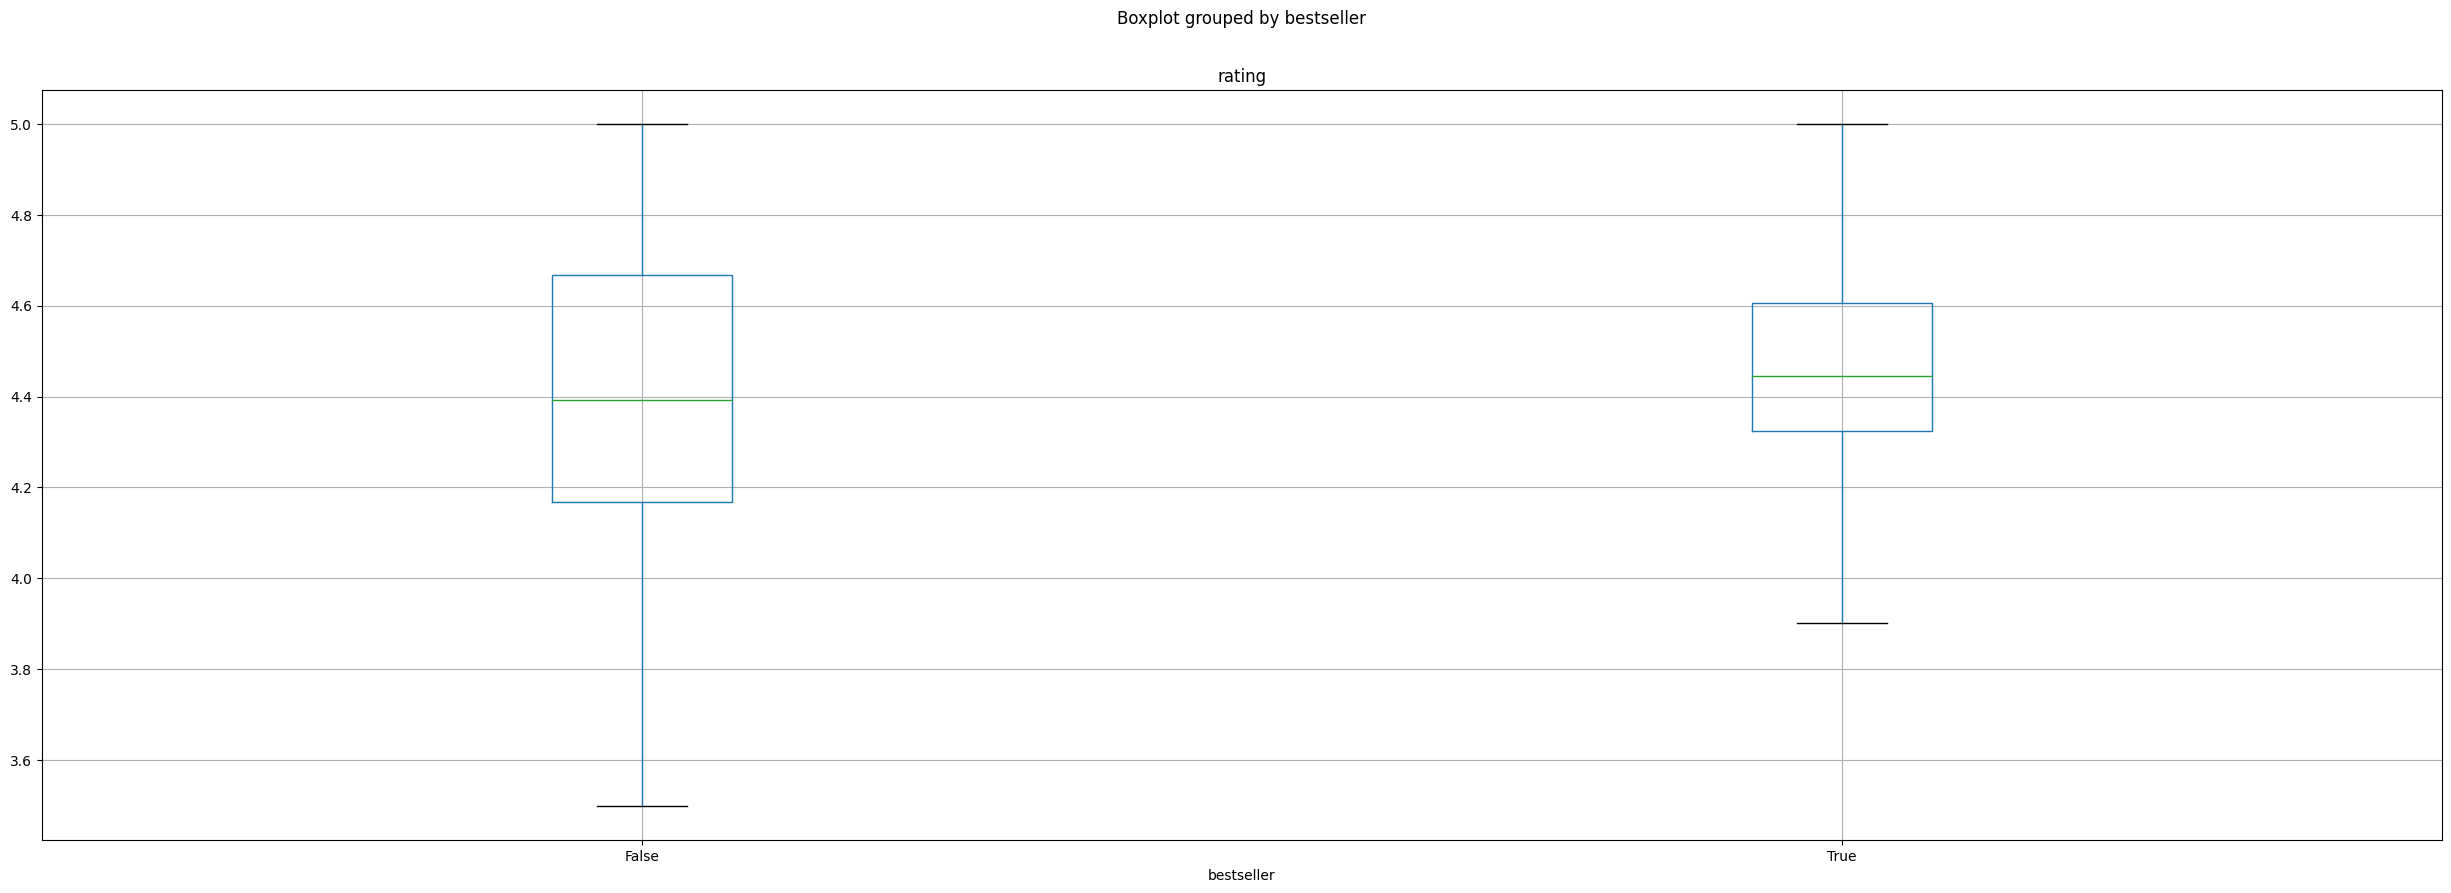

In [ ]:
# Gráfico boxplot de "bestseller" by "rating"  luego de la imputación
ax = df.boxplot(column=["rating"], by="bestseller", figsize=(30, 10))

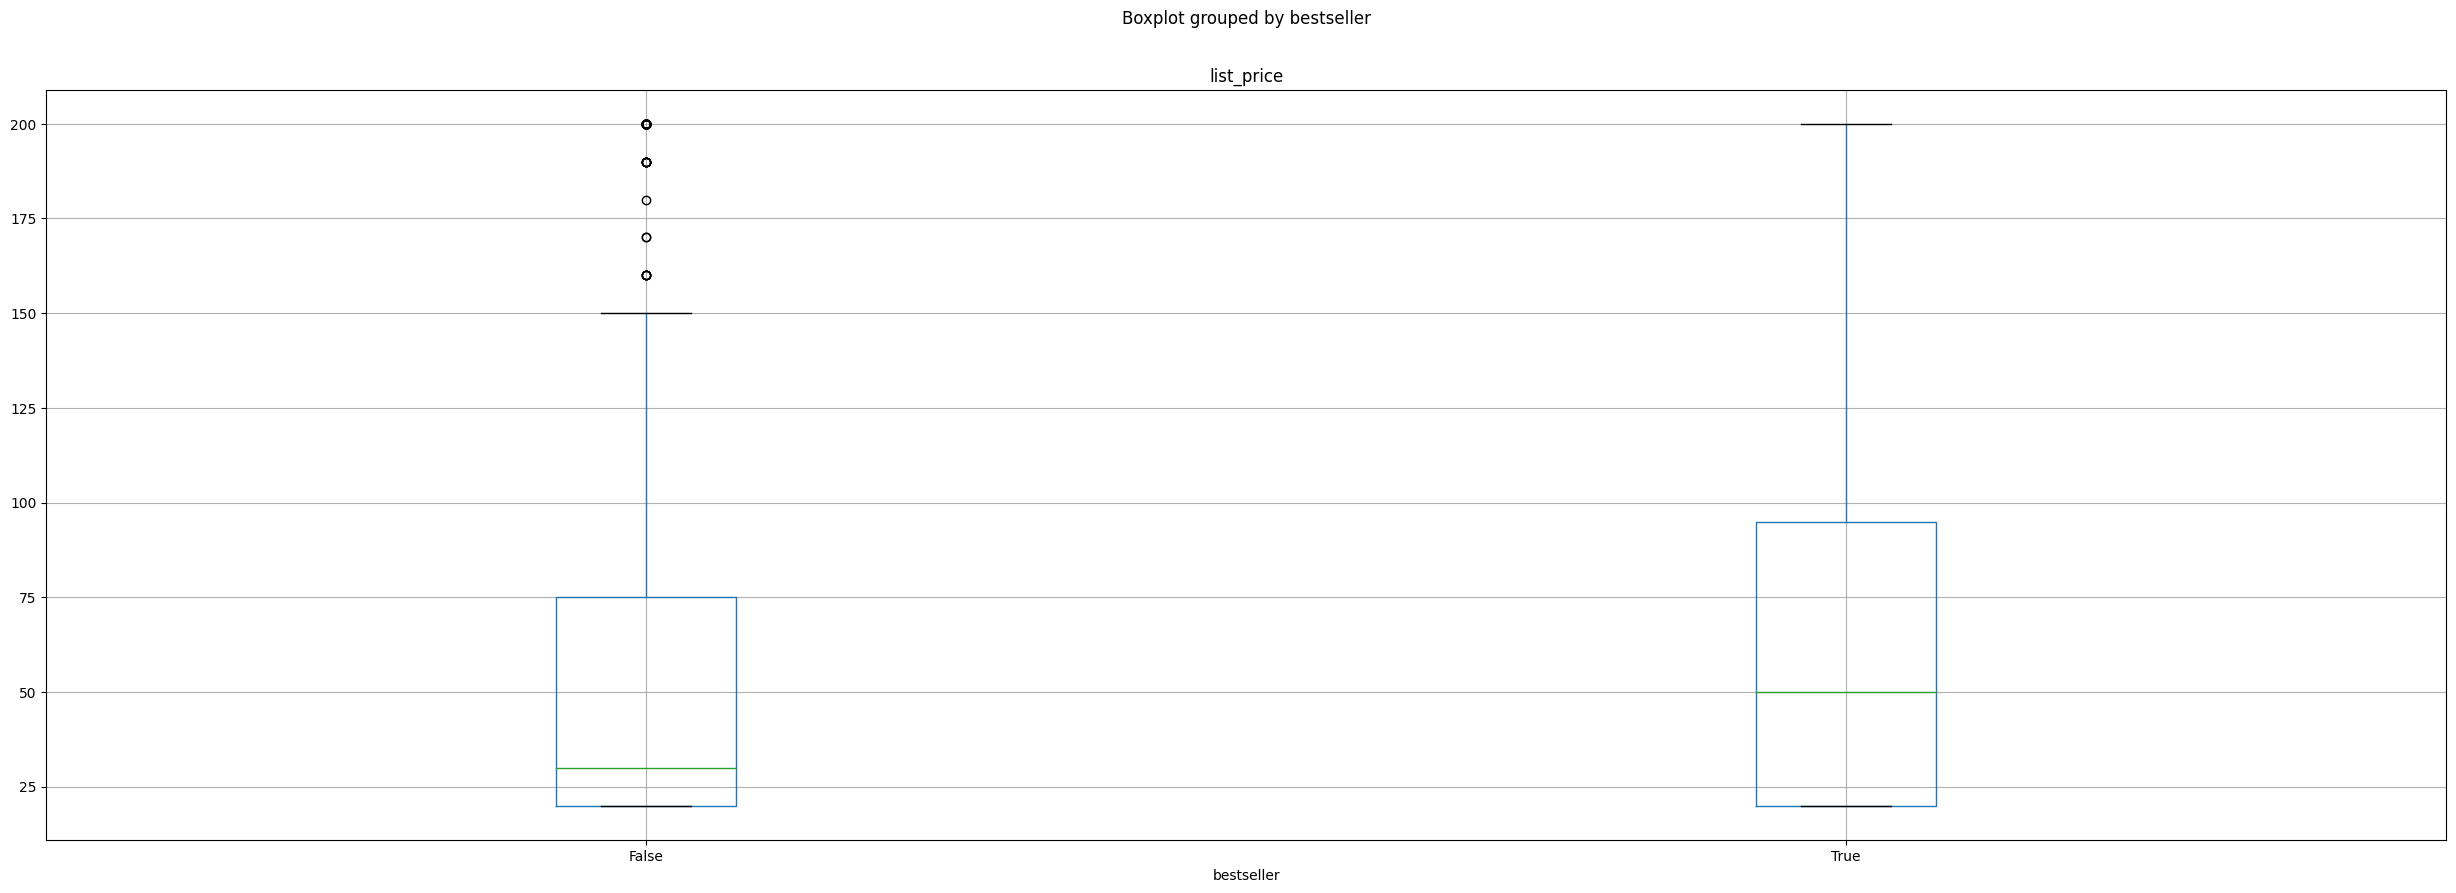

In [ ]:
# Gráfico boxplot de "bestseller" by "list_price"
ax = df.boxplot(column=["list_price"], by="bestseller", figsize=(30, 10))

In [ ]:
# Media de "list_price" según "bestseller"
df.groupby("bestseller")[["list_price"]].mean()

list_price
bestseller            
False        47.501287
True         57.018953

In [ ]:
# Imputación de valores atípicos en "list_price" por la media según tipo de "bestseller"
df.loc[(df["list_price"]>120) & (df["bestseller"] == 0), "list_price"] = df["list_price"].mean()

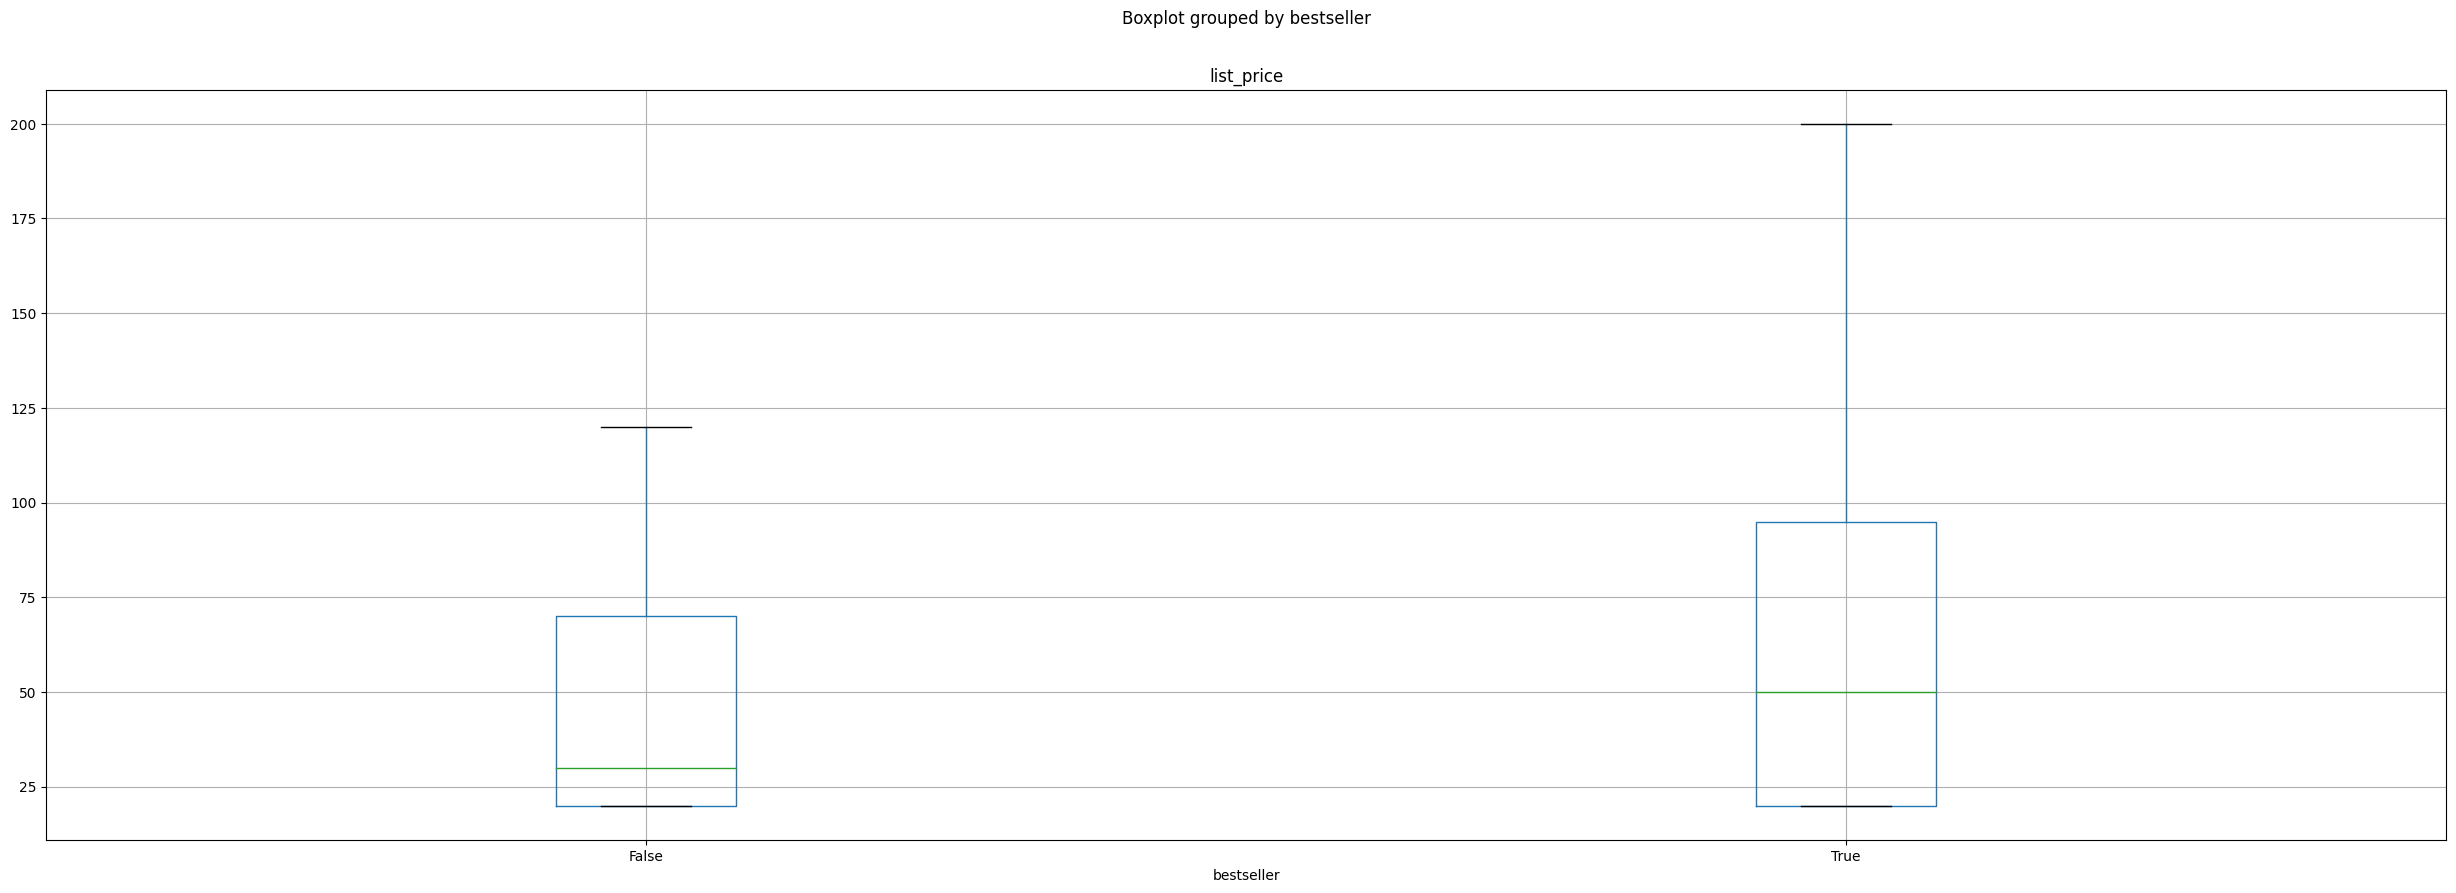

In [ ]:
# Gráfico boxplot de "bestseller" by "list_price"  luego de la imputación
ax = df.boxplot(column=["list_price"], by="bestseller", figsize=(30, 10))

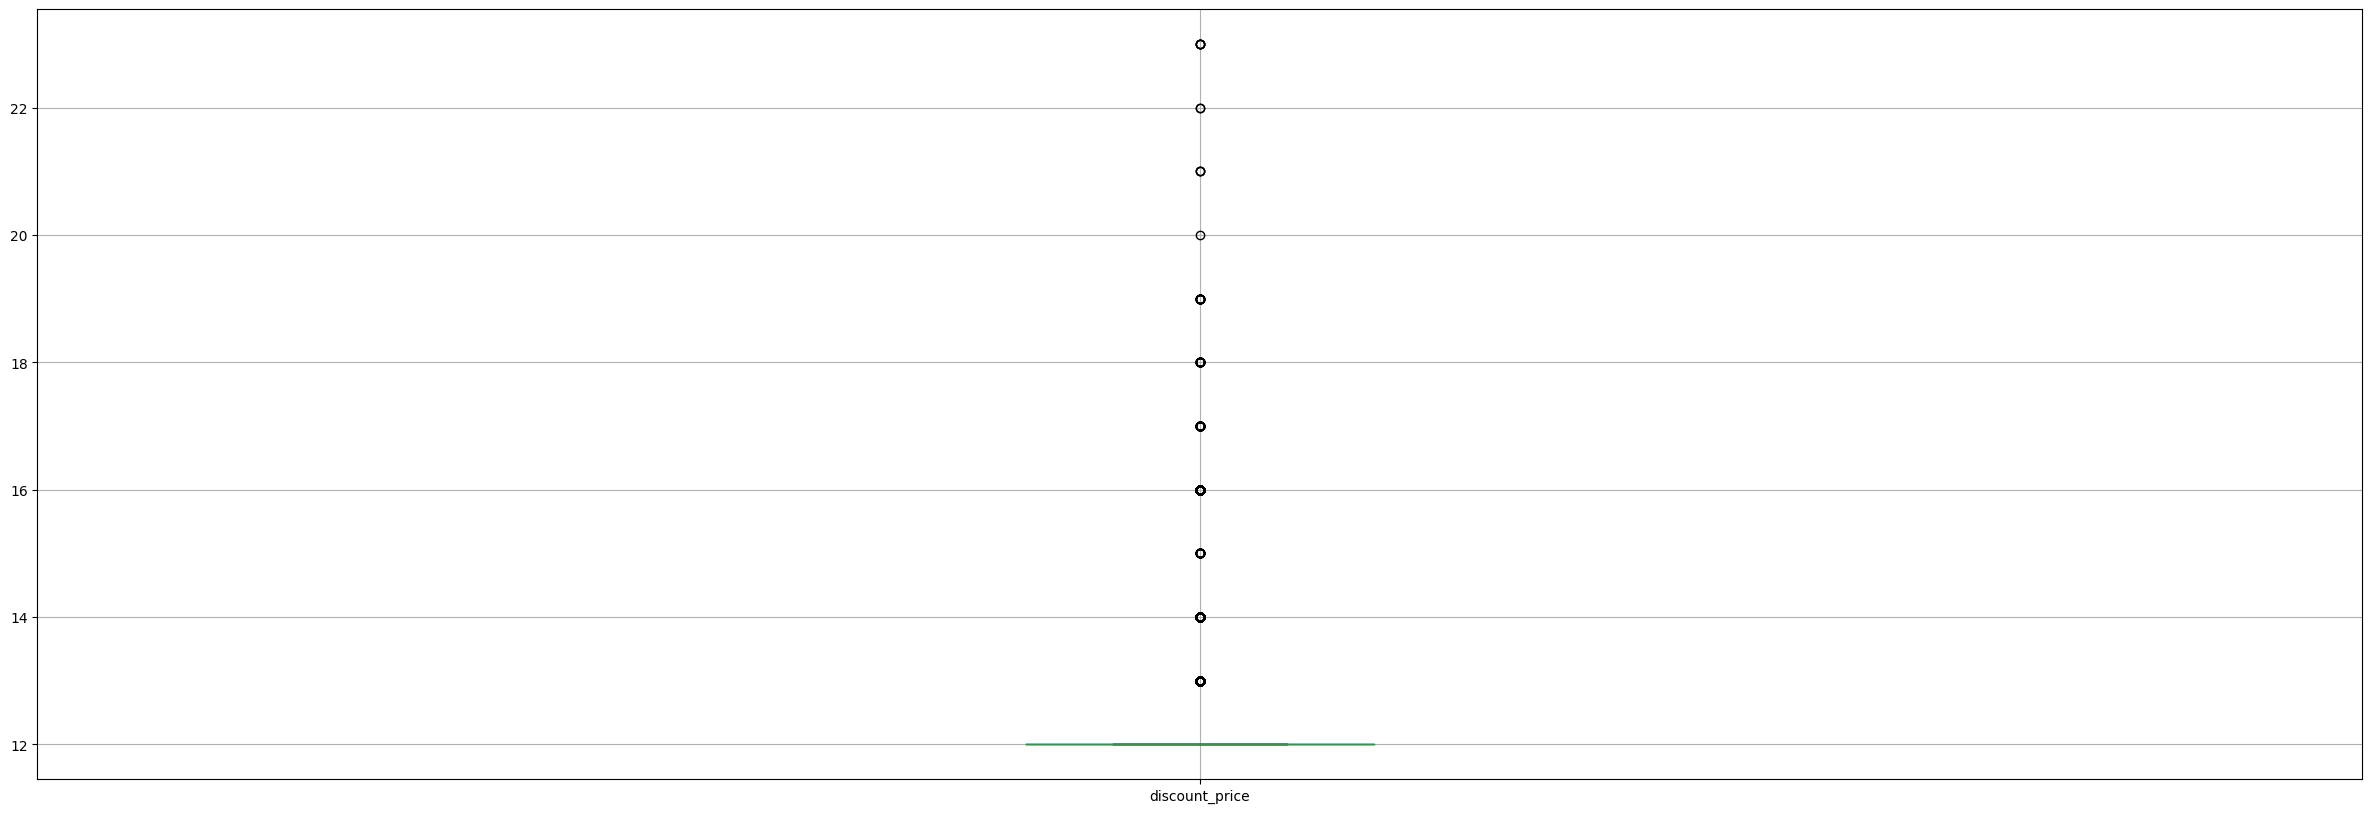

In [ ]:
# # Gráfico boxplot de "discount_price"
ax = df.boxplot(column=["discount_price"], figsize=(30, 10))

**Interpretación:**



* Se observa que hay valores atípicos en la variable "discount_price".



array([[<Axes: title={'center': 'discount_price'}>]], dtype=object)

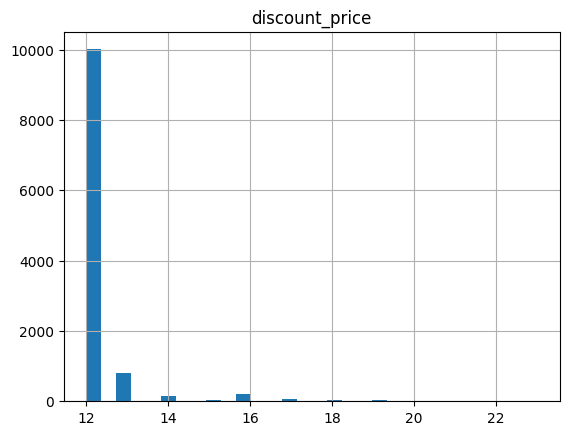

In [ ]:
# Gráfico histograma de la variable "discount_price"
df.hist(column=["discount_price"], bins=30)

**Interpretación:**



* Se observa que la mayor concentración de valores es en 12.

In [ ]:
# Mediana de "discount_price" según "list_price"
df.groupby("discount_price")[["list_price"]].median()

list_price
discount_price            
12.0             34.990000
13.0             19.990000
14.0             92.490000
15.0             99.990000
16.0             49.990000
17.0             49.387846
18.0             54.990000
19.0             49.688923
20.0             49.387846
21.0             94.990000
22.0             92.490000
23.0             99.990000

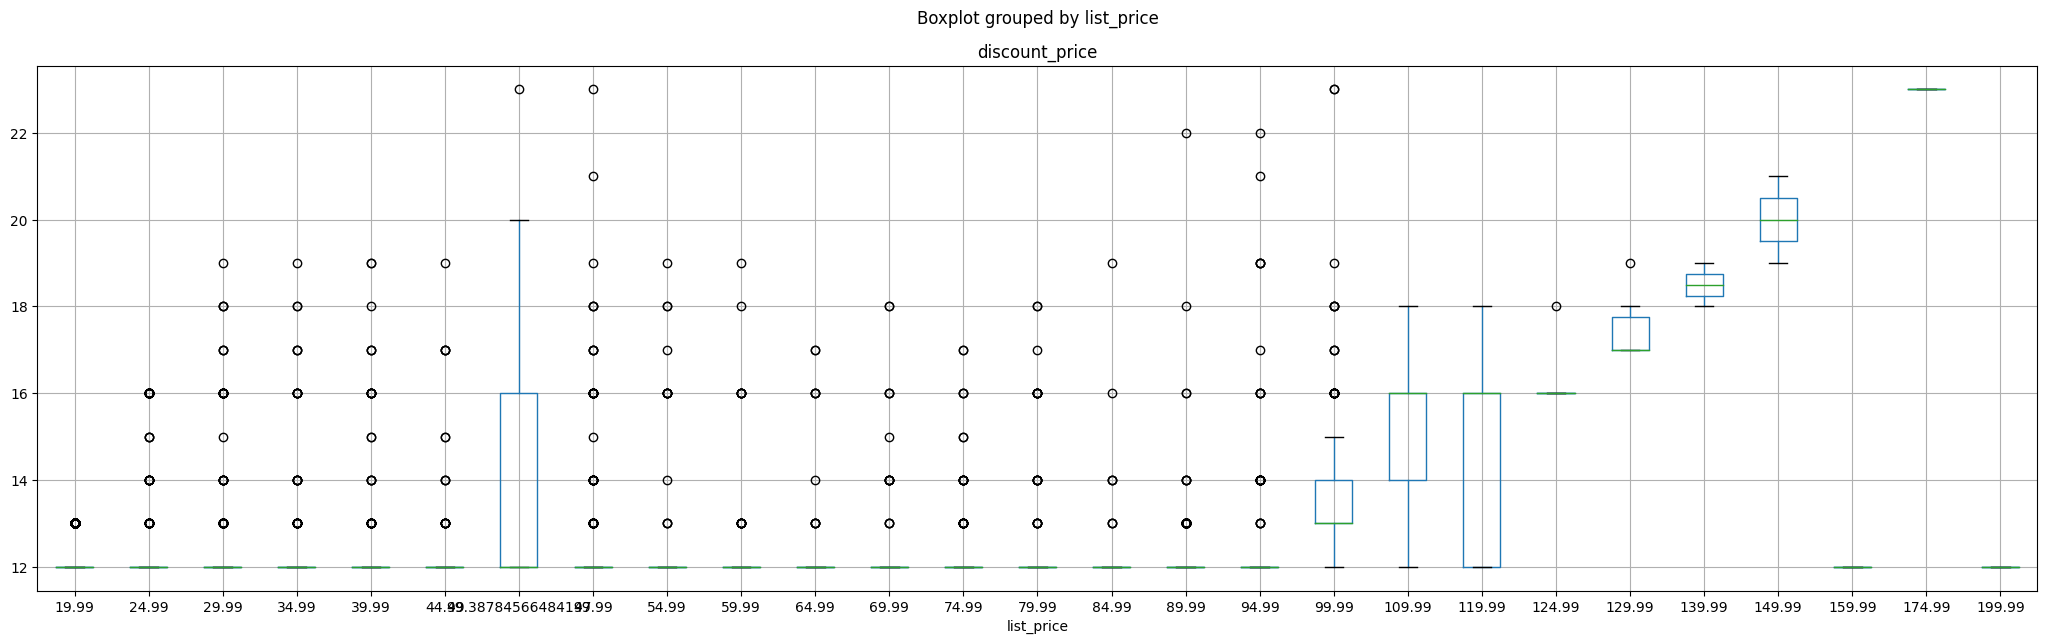

In [ ]:
# Gráfico boxplot de "discount_price" by "list_price"  luego de la imputación
ax = df.boxplot(column=["discount_price"], by="list_price", figsize=(25, 7))

In [ ]:
# Mediana de "discount_price"
df["discount_price"].median()

12.0

In [ ]:
# Imputación de valores atípicos en "discount_price" por la mediana
df.loc[df["discount_price"]>12, 'discount_price'] = df["discount_price"].median()

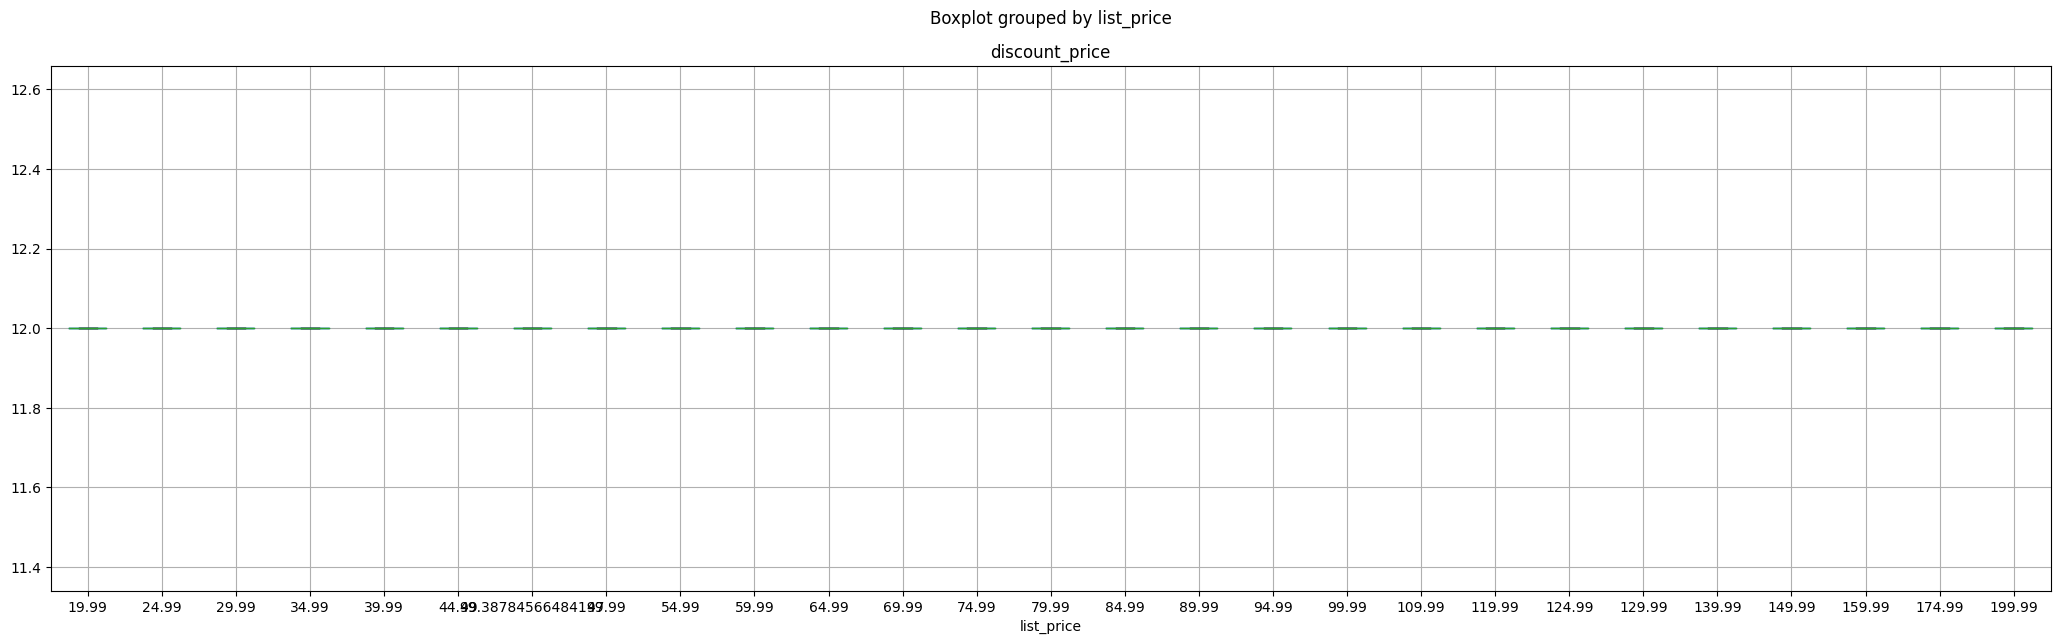

In [ ]:
# Gráfico boxplot de "discount_price" by "list_price"  luego de la imputación
ax = df.boxplot(column=["discount_price"], by="list_price", figsize=(25, 7))

### **4.9. Breve descripción estadística de las variables luego de la limpieza de datos**



- Se utiliza la función describe() que permite resumir la información estadística de las variables.

In [ ]:
# Estadística descriptiva con la función describe()
df.describe()

id        rating  num_published_lectures  \
count  11326.000000  11326.000000            11326.000000   
mean    5663.500000      4.405782               28.819941   
std     3269.678909      0.348377               16.780859   
min        1.000000      3.500000                0.000000   
25%     2832.250000      4.207288               15.000000   
50%     5663.500000      4.406595               27.000000   
75%     8494.750000      4.646992               40.000000   
max    11326.000000      5.000000               80.000000   

       num_published_practice_tests  instructional_level_simple    list_price  \
count                  11326.000000                11326.000000  11326.000000   
mean                       0.110277                    0.771764     47.735350   
std                        0.591572                    0.845244     30.486216   
min                        0.000000                    0.000000     19.990000   
25%                        0.000000                    0.000000     19.990000   
50%                        0.000000                    1.000000     34.990000   
75%                        0.000000                    1.000000     79.990000   
max                        6.000000                    3.000000    199.990000   

       discount_price  locale_es_CL  locale_es_CO  locale_es_ES  ...  \
count         11326.0  11326.000000  11326.000000  11326.000000  ...   
mean             12.0      0.009006      0.038407      0.593767  ...   
std               0.0      0.094475      0.192186      0.491151  ...   
min              12.0      0.000000      0.000000      0.000000  ...   
25%              12.0      0.000000      0.000000      0.000000  ...   
50%              12.0      0.000000      0.000000      1.000000  ...   
75%              12.0      0.000000      0.000000      1.000000  ...   
max              12.0      1.000000      1.000000      1.000000  ...   

       category_Enseñanzas y disciplinas académicas  category_Estilo de vida  \
count                                  11326.000000             11326.000000   
mean                                       0.111778                 0.048296   
std                                        0.315107                 0.214400   
min                                        0.000000                 0.000000   
25%                                        0.000000                 0.000000   
50%                                        0.000000                 0.000000   
75%                                        0.000000                 0.000000   
max                                        1.000000                 1.000000   

       category_Finanzas y contabilidad  category_Fotografía y vídeo  \
count                      11326.000000                 11326.000000   
mean                           0.042998                     0.016599   
std                            0.202862                     0.127769   
min                            0.000000                     0.000000   
25%                            0.000000                     0.000000   
50%                            0.000000                     0.000000   
75%                            0.000000                     0.000000   
max                            1.000000                     1.000000   

       category_Informática y software  category_Marketing  category_Música  \
count                     11326.000000        11326.000000     11326.000000   
mean                          0.160604            0.052975         0.038495   
std                           0.367181            0.223994         0.192398   
min                           0.000000            0.000000         0.000000   
25%                           0.000000            0.000000         0.000000   
50%                           0.000000            0.000000         0.000000   
75%                           0.000000            0.000000         0.000000   
max                           1.000000            1.000000         1.000000   

      

### **4.10. Exportar a Excel el Dataframe con datos limpios**

In [ ]:
#Exportar a Excel el Dataframe con datos limpios
df.to_excel('df_limpio.xlsx',index=False)

In [ ]:
 # Leer archivo df_limpio.xlsx
df = pd.read_excel("/content/drive/MyDrive/df_limpio.xlsx")

## **5.CONEXIÓN CON APIs PÚBLICAS**

### **5.1. API Chanacademy**

In [ ]:
import requests

# URL de la API educativa
url = "https://www.khanacademy.org/api/v1/topic/math"

# Parámetros de la solicitud (si los hay)
params = {
    "lang": "es"
}

# Realizar la solicitud GET
response = requests.get(url, params=params)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener los datos de respuesta en formato JSON
    data = response.json()

    # Acceder a la información de la API
    # Por ejemplo, imprimir el título de los temas de matemáticas
    for topic in data["children"]:
        title = topic["translated_title"]
        print(title)
else:
    # La solicitud no fue exitosa, manejar el error apropiadamente
    print("Error en la solicitud:", response.status_code)

Error en la solicitud: 410


- El código de estado de respuesta "410" indica que la API ha sido desactivada o que la ruta a la que se quiere acceder ya no está disponible.

In [ ]:
# URL de la API educativa
url = "https://www.khanacademy.org/api/"

# Parámetros de la solicitud (si los hay)
params = {
    "lang": "es"
}

# Realizar la solicitud GET
response = requests.get(url, params=params)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener los datos de respuesta en formato JSON
    data = response.json()

    # Acceder a la información de la API
    # Por ejemplo, imprimir el título de los temas de matemáticas
    for topic in data["children"]:
        title = topic["translated_title"]
        print(title)
else:
    # La solicitud no fue exitosa, manejar el error apropiadamente
    print("Error en la solicitud:", response.status_code)

Error en la solicitud: 404


- El error 404 en una solicitud HTTP significa "Not Found" (no encontrado). Esto indica que el recurso solicitado en la URL no existe en el servidor.

### **5.2. API Ministerio de Cultura de Argentina**

In [ ]:
# URL de la API educativa
url = "https://www.cultura.gob.ar/api/v2.0/organismos/32/"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Obtener los datos de respuesta en formato JSON
    data = response.json()

    # Acceder a la información de la API
    nombre = data["nombre"]
    direccion = data["direccion"]
    telefono = data["telefono"]
    descripcion = data["descripcion"]
    # Procesar los datos como desees
    print("Nombre:", nombre)
    print("Dirección:", direccion)
    print("Teléfono:", telefono)
    print("Descripción:", descripcion)
else:
    # La solicitud no fue exitosa, manejar el error apropiadamente
    print("Error en la solicitud:", response.status_code)

Nombre: Instituto Nacional de Antropología y Pensamiento Latinoamericano
Dirección: 3 de Febrero 1378, Ciudad de Buenos Aires
Teléfono: +54 (011) 4782-7251 / 4783-6554
Descripción: <p>El Instituto Nacional de Antropolog&iacute;a y Pensamiento Latinoamericano (INAPL) fue creado el 20 de diciembre de 1943 con el nombre de Instituto Nacional de la Tradici&oacute;n, siendo su primer director el maestro Juan Alfonso Carrizo. El Estado Nacional adquiere su actual sede en el a&ntilde;o 1973, donde alberga el Museo, la Biblioteca y los laboratorios de investigaci&oacute;n. A partir del a&ntilde;o 1991 se le da su presente denominaci&oacute;n.</p>
<p>Desde su creaci&oacute;n, se dedica a la investigaci&oacute;n en las &aacute;reas de antropolog&iacute;a social, folklore y arqueolog&iacute;a. Actualmente se llevan adelante m&aacute;s de 20 proyectos de investigaci&oacute;n, especializados en recuperar, documentar y gestionar el patrimonio cultural tangible e intangible. Asimismo, asesora en prop

In [ ]:
for key, value in data.items():
    print(key, type(value))

id <class 'int'>
url <class 'str'>
link <class 'str'>
nombre <class 'str'>
direccion <class 'str'>
telefono <class 'str'>
descripcion <class 'str'>
email <class 'str'>
provincia <class 'str'>
depende_de <class 'str'>
autoridad <class 'NoneType'>


- Se realiza una solicitud GET a la URL del Ministerio de Cultura y se obtiene la respuesta en formato JSON. Luego, se accede a los campos relevantes del diccionario data, como el nombre, la dirección, el teléfono y la descripción.

## **6. ALGORITMOS DE CLASIFICACIÓN Y REGRESIÓN & ALGORITMOS DE AGRUPACIÓN I**


#### **6.1. EVALUACIÓN DEL MODELO CON EXACTITUD (ACCURACY) RANDOM FOREST CLASSIFIER**


In [ ]:
 # Leer archivo df_limpio_con_outliers.xlsx
df = pd.read_excel("/content/drive/MyDrive/df_limpio_con_outliers.xlsx")

In [ ]:
# Requisitos de sklearn:
#Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple"]

df = df[cols]

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Creamos el modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Evaluamos el modelo
scores = sk.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Exactitud:", scores.mean(), scores.std())

Exactitud: 0.8118485179708095 0.006816446665547246


In [ ]:
 # Leer archivo df_limpio.xlsx luego de eliminar los outliers de diferentes variables
df = pd.read_excel("/content/drive/MyDrive/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple"]

df = df[cols]

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Creamos el modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Evaluamos el modelo
scores = sk.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Exactitud:", scores.mean(), scores.std())

Exactitud: 0.8743599305600206 0.009408966216728834


**Interpretación:**

- El modelo se mejoró de 81,18% al 87,43% con la limpieza y transformación de los datos anteriores.
- Se ajusta un modelo de Random Forest a los datos X y y, y luego evalúa el rendimiento del modelo utilizando validación cruzada. El resultado impreso es el promedio de las exactitudes obtenidas en cada fold y la desviación estándar de esas exactitudes. Esto proporciona una estimación de qué tan bien puede generalizar el modelo a nuevos datos.

## **7.ALGORITMOS DE AGRUPACIÓN II & Y SELECCIÓN DEL ALGORITMO Y ENTRENAMIENTO DEL MODELO I**

### **7.1. EVALUACIÓN DEL MODELO CON EXACTITUD (ACCURACY)**



- (VP+VN) / (VP+VN+FP+FN)

- Supone conjunto de datos balanceados

#### **7.1.1. Prueba del modelo con variables originales**

##### **7.1.1.1. Prueba de exactitud con las variables originales y los siguientes parámetros:**




*   Max depth: 3.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

[Text(0.4230769230769231, 0.875, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.022\nsamples = 637\nvalue = [630, 7]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 37.704\ngini = 0.427\nsamples = 3537\nvalue = [2442, 1095]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 37.204\ngini = 0.351\nsamples = 1066\nvalue = [242, 824]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.359\nsamples = 316\nvalue = [242, 74]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 750\nvalue = [0, 750]'),
 Text(0.8461538461538461, 0.375, 'x[2] <= 55.5\ngini = 0.195\nsample

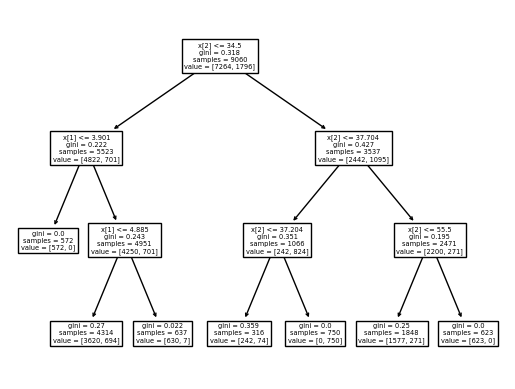

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8936451897616946

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.8845474613686535

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1817,    0],
       [ 241,  208]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.87908208, 0.90291262, 0.89585172, 0.88437776, 0.88437776,
       0.9082083 , 0.88515901, 0.88869258, 0.86837456, 0.86660777])

In [ ]:
print(scores.mean(), scores.std())

0.8863644160566869 0.012738784894636934


##### **7.1.1.2. Prueba de exactitud con las variables originales y los siguientes parámetros:**




*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

[Text(0.5, 0.9166666666666666, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.21875, 0.75, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.1875, 0.5833333333333334, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.125, 0.4166666666666667, 'x[1] <= 4.295\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.0625, 0.25, 'x[1] <= 4.291\ngini = 0.193\nsamples = 1782\nvalue = [1589, 193]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.256\nsamples = 1275\nvalue = [1083, 192]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.004\nsamples = 507\nvalue = [506, 1]'),
 Text(0.1875, 0.25, 'x[1] <= 4.395\ngini = 0.317\nsamples = 2532\nvalue = [2031, 501]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.467\nsamples = 576\nvalue = [362, 214]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.25\nsamples = 1956\nvalue = [1669, 287

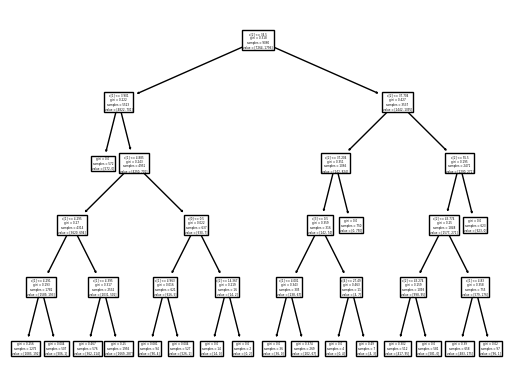

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8932038834951457

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.8852097130242825

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1816,    1],
       [ 241,  208]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.88879082, 0.90467785, 0.90467785, 0.89496911, 0.89938217,
       0.92674316, 0.88515901, 0.88869258, 0.86837456, 0.86749117])

In [ ]:
print(scores.mean(), scores.std())

0.8928958267709166 0.016765175704494005


##### **7.1.1.3. Prueba de exactitud con las variables originales y los siguientes parámetros:**


*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

[Text(0.5976133241758241, 0.9545454545454546, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.41569368131868134, 0.8636363636363636, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.4101991758241758, 0.7727272727272727, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.4211881868131868, 0.7727272727272727, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.25858516483516486, 0.6818181818181818, 'x[1] <= 4.295\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.15247252747252749, 0.5909090909090909, 'x[1] <= 4.291\ngini = 0.193\nsamples = 1782\nvalue = [1589, 193]'),
 Text(0.11538461538461539, 0.5, 'x[2] <= 14.5\ngini = 0.256\nsamples = 1275\nvalue = [1083, 192]'),
 Text(0.057692307692307696, 0.4090909090909091, 'x[4] <= 22.49\ngini = 0.176\nsamples = 473\nvalue = [427, 46]'),
 Text(0.027472527472527472, 0.3181818181818182, 'x[1] <= 4.286\ngini = 0.232\nsamples = 224\nvalue = [194, 30]'),
 

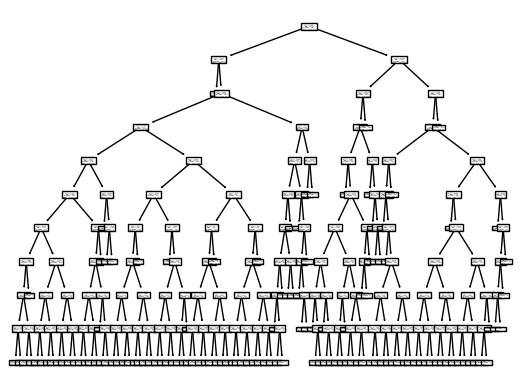

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8989408649602825

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.9109271523178808

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1782,   35],
       [ 194,  255]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.88879082, 0.89761695, 0.89320388, 0.88261253, 0.89938217,
       0.91350397, 0.90371025, 0.89929329, 0.87985866, 0.87632509])

In [ ]:
print(scores.mean(), scores.std())

0.893429760571858 0.01100606588288067


#### **7.1.2. Prueba del modelo con variable dummy "category" + variables originales**

##### **7.1.2.1. Prueba de exactitud con las variables originales + category con los siguientes parámetros:**




*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness'] #'']

df = df[cols]

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Creamos el modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Evaluamos el modelo
scores = sk.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Exactitud:", scores.mean(), scores.std())

Exactitud: 0.8402787730711603 0.005143600275234308


[Text(0.5, 0.9166666666666666, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.21875, 0.75, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.1875, 0.5833333333333334, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.125, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.0625, 0.25, 'x[14] <= 0.5\ngini = 0.252\nsamples = 3985\nvalue = [3396, 589]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.222\nsamples = 3320\nvalue = [2898, 422]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.376\nsamples = 665\nvalue = [498, 167]'),
 Text(0.1875, 0.25, 'x[1] <= 4.334\ngini = 0.435\nsamples = 329\nvalue = [224, 105]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.349\nsamples = 164\nvalue = [127, 37]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.485\nsamples = 165\nvalue = [97, 68]'),
 T

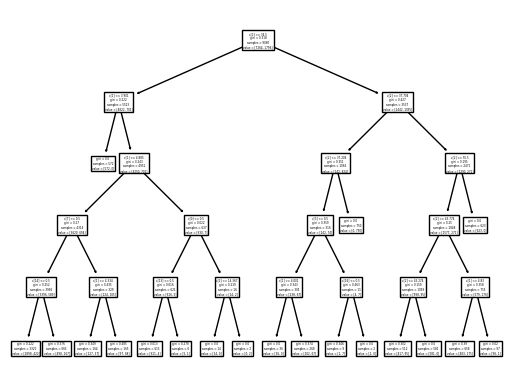

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8914386584289496

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.8853200883002208

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1812,    5],
       [ 241,  208]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.88526037, 0.90556046, 0.90467785, 0.88437776, 0.89585172,
       0.92409532, 0.88515901, 0.88869258, 0.86837456, 0.86837456])

In [ ]:
print(scores.mean(), scores.std())

0.8910424184207162 0.01630328801983979


#### **7.1.3. Variable dummy "category"+ "locale" + variables originales**

##### **7.1.3.1. Prueba de exactitud con las variables originales + category + locale con los siguientes parámetros:**




*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'] #'']

df = df[cols]

In [ ]:
df.shape

(11326, 27)

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Creamos el modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

# Evaluamos el modelo
scores = sk.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Exactitud:", scores.mean(), scores.std())

Exactitud: 0.8363050683001818 0.005847025582103844


[Text(0.5, 0.9166666666666666, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.21875, 0.75, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.1875, 0.5833333333333334, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.125, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.0625, 0.25, 'x[14] <= 0.5\ngini = 0.252\nsamples = 3985\nvalue = [3396, 589]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.222\nsamples = 3320\nvalue = [2898, 422]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.376\nsamples = 665\nvalue = [498, 167]'),
 Text(0.1875, 0.25, 'x[1] <= 4.334\ngini = 0.435\nsamples = 329\nvalue = [224, 105]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.349\nsamples = 164\nvalue = [127, 37]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.485\nsamples = 165\nvalue = [97, 68]'),
 T

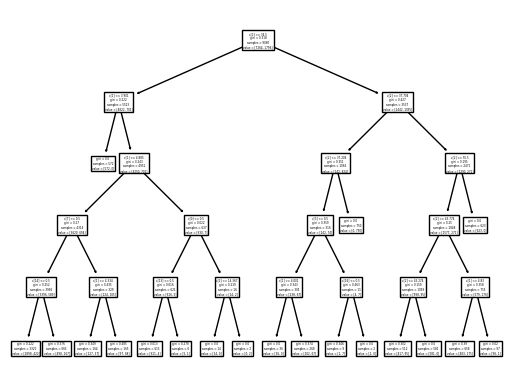

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8914386584289496

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.8853200883002208

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1812,    5],
       [ 241,  208]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.88614298, 0.90467785, 0.90467785, 0.88437776, 0.89673433,
       0.92586055, 0.88515901, 0.88780919, 0.86837456, 0.86837456])

In [ ]:
print(scores.mean(), scores.std())

0.8912188629580307 0.0166053986885227


##### **7.1.3.2. Prueba de exactitud con las variables originales + category + locale con los siguientes parámetros:**




*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'] #'']

df = df[cols]

In [ ]:
df.shape

(11326, 27)

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Creamos el modelo
clf = sk.ensemble.RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=10, n_jobs=-1, random_state=42)

# Evaluamos el modelo
scores = sk.model_selection.cross_val_score(clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Exactitud:", scores.mean(), scores.std())

Exactitud: 0.887250515831497 0.009708053933328633


[Text(0.6443850267379679, 0.9545454545454546, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.47058823529411764, 0.8636363636363636, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.46524064171123, 0.7727272727272727, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.47593582887700536, 0.7727272727272727, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.303475935828877, 0.6818181818181818, 'x[7] <= 0.5\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.18348930481283424, 0.5909090909090909, 'x[14] <= 0.5\ngini = 0.252\nsamples = 3985\nvalue = [3396, 589]'),
 Text(0.10227272727272728, 0.5, 'x[1] <= 4.293\ngini = 0.222\nsamples = 3320\nvalue = [2898, 422]'),
 Text(0.0481283422459893, 0.4090909090909091, 'x[1] <= 4.291\ngini = 0.152\nsamples = 1336\nvalue = [1225, 111]'),
 Text(0.0427807486631016, 0.3181818181818182, 'x[18] <= 0.5\ngini = 0.205\nsamples = 958\nvalue = [847, 111]'),
 Text(0

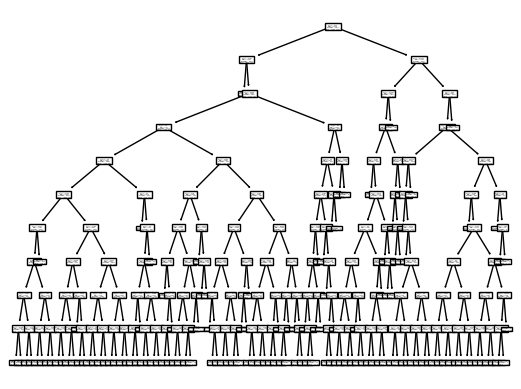

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
# Medimos la performance de la predicción usando exactitud
sk.metrics.accuracy_score(y_test, y_pred)

0.8940864960282436

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.accuracy_score(y_train, clf.predict(X_train) )

0.9123620309050773

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1771,   46],
       [ 194,  255]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='accuracy')
scores

array([0.86142983, 0.90026478, 0.89055605, 0.89143866, 0.88879082,
       0.91615181, 0.91077739, 0.90194346, 0.8745583 , 0.86749117])

In [ ]:
print(scores.mean(), scores.std())

0.8903402268594899 0.01711040771008454


### **7.2. EVALUACIÓN DEL MODELO CON SENSIBILIDAD (RECALL)**




- VP / (VP+FN)

- Uso: Situaciones de riesgo donde no debo tener FN

##### **7.2.1. Prueba de sensibilidad con las variables originales con los siguientes parámetros:**





*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple"]

df = df[cols]

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando sensibilidad
sk.metrics.recall_score(y_test, y_pred)

0.5679287305122495

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.recall_score(y_train, clf.predict(X_train) )

0.5684855233853007

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1782,   35],
       [ 194,  255]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='recall')
scores

array([0.49553571, 0.57777778, 0.54222222, 0.50666667, 0.55555556,
       0.65777778, 0.58482143, 0.56696429, 0.45982143, 0.41071429])

In [ ]:
print(scores.mean(), scores.std())

0.5357857142857143 0.06658505326624083


##### **7.2.2. Prueba de sensibilidad con las variables originales + dummy "category" con los siguientes parámetros:**




*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness'] #'']

df = df[cols]

[Text(0.6500934103260869, 0.9545454545454546, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.47172214673913043, 0.8636363636363636, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.46628736413043476, 0.7727272727272727, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.4771569293478261, 0.7727272727272727, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.3062160326086957, 0.6818181818181818, 'x[7] <= 0.5\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.18648097826086957, 0.5909090909090909, 'x[14] <= 0.5\ngini = 0.252\nsamples = 3985\nvalue = [3396, 589]'),
 Text(0.10394021739130435, 0.5, 'x[1] <= 4.293\ngini = 0.222\nsamples = 3320\nvalue = [2898, 422]'),
 Text(0.04891304347826087, 0.4090909090909091, 'x[1] <= 4.291\ngini = 0.152\nsamples = 1336\nvalue = [1225, 111]'),
 Text(0.043478260869565216, 0.3181818181818182, 'x[18] <= 0.5\ngini = 0.205\nsamples = 958\nvalue = [847, 111]'),
 

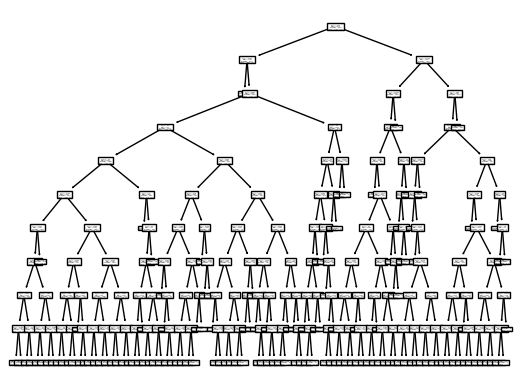

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando sensibilidad
sk.metrics.recall_score(y_test, y_pred)

0.5701559020044543

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.recall_score(y_train, clf.predict(X_train) )

0.5657015590200446

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1773,   44],
       [ 193,  256]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='recall')
scores

array([0.5       , 0.57333333, 0.55111111, 0.53777778, 0.55555556,
       0.68444444, 0.58928571, 0.57589286, 0.45982143, 0.4375    ])

In [ ]:
print(scores.mean(), scores.std())

0.5464722222222222 0.06646729613145441


##### **7.2.3. Prueba de sensibilidad con las variables originales + dummy "category" + dummy "locale" con los siguientes parámetros:**



*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'] #'']

df = df[cols]

[Text(0.6443850267379679, 0.9545454545454546, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.47058823529411764, 0.8636363636363636, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.46524064171123, 0.7727272727272727, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.47593582887700536, 0.7727272727272727, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.303475935828877, 0.6818181818181818, 'x[7] <= 0.5\ngini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.18348930481283424, 0.5909090909090909, 'x[14] <= 0.5\ngini = 0.252\nsamples = 3985\nvalue = [3396, 589]'),
 Text(0.10227272727272728, 0.5, 'x[1] <= 4.293\ngini = 0.222\nsamples = 3320\nvalue = [2898, 422]'),
 Text(0.0481283422459893, 0.4090909090909091, 'x[1] <= 4.291\ngini = 0.152\nsamples = 1336\nvalue = [1225, 111]'),
 Text(0.0427807486631016, 0.3181818181818182, 'x[18] <= 0.5\ngini = 0.205\nsamples = 958\nvalue = [847, 111]'),
 Text(0

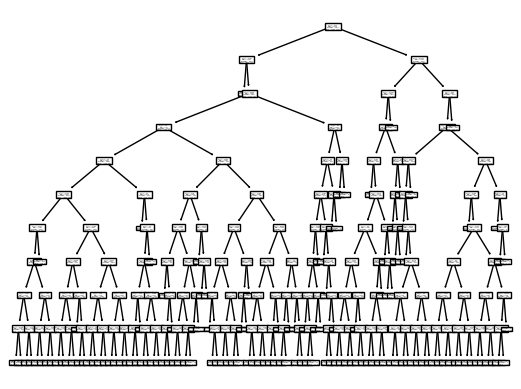

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 20% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False,  True, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando sensibilidad
sk.metrics.recall_score(y_test, y_pred)

0.5679287305122495

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.recall_score(y_train, clf.predict(X_train) )

0.5757238307349666

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[1771,   46],
       [ 194,  255]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='recall')
scores

array([0.49553571, 0.58222222, 0.55555556, 0.54666667, 0.55555556,
       0.68444444, 0.59821429, 0.57589286, 0.45535714, 0.44196429])

In [ ]:
print(scores.mean(), scores.std())

0.549140873015873 0.06765311563191465


**Interpretación**:

El modelo queda en 54,91% y la varianza aumenta 6,76%.

**Conclusión**: El mejor resultado considerando media y varianza es con max depth 10, aún así la sensibilidad es del 55%.

### **7.3. EVALUACIÓN DEL MODELO CON ESPECIFICIDAD (PRECISION)**



- VP / (VP+FP)

- Uso: Quiero mejorar la correctitud del modelo y no me
importan los errores

#### **7.3.1. Variables dummies: variables originales + "locale"**

##### **7.3.1.1. Prueba de especificidad con las variables originales + dummy "locale" con los siguientes parámetros:**




*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 30% / 70%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'] #'']

df = df[cols]

[Text(0.5, 0.9166666666666666, 'x[2] <= 34.5\ngini = 0.318\nsamples = 7928\nvalue = [6357, 1571]'),
 Text(0.21875, 0.75, 'x[1] <= 3.901\ngini = 0.22\nsamples = 4820\nvalue = [4213, 607]'),
 Text(0.1875, 0.5833333333333334, 'gini = 0.0\nsamples = 493\nvalue = [493, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 4.885\ngini = 0.241\nsamples = 4327\nvalue = [3720, 607]'),
 Text(0.125, 0.4166666666666667, 'x[1] <= 4.295\ngini = 0.268\nsamples = 3764\nvalue = [3163, 601]'),
 Text(0.0625, 0.25, 'x[1] <= 4.291\ngini = 0.199\nsamples = 1546\nvalue = [1373, 173]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.264\nsamples = 1106\nvalue = [933, 173]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.0\nsamples = 440\nvalue = [440, 0]'),
 Text(0.1875, 0.25, 'x[1] <= 4.395\ngini = 0.311\nsamples = 2218\nvalue = [1790, 428]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.46\nsamples = 503\nvalue = [323, 180]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.247\nsamples = 1715\nvalue = [1467, 248]')

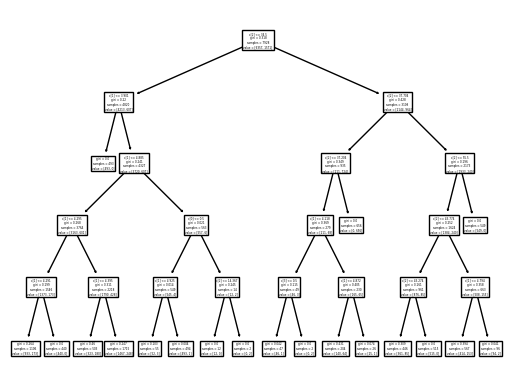

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Partimos en 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

# Creamos el modelo, con algunos parámetros seleccionados

clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Entrenamos el modelo con el 70% de los datos
clf.fit(X_train, y_train)

# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 30% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando Especifidad
sk.metrics.precision_score(y_test, y_pred)

1.0

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.precision_score(y_train, clf.predict(X_train) )

1.0

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[2724,    0],
       [ 372,  302]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='precision')
scores

array([0.98039216, 0.99159664, 1.        , 1.        , 1.        ,
       0.99305556, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
print(scores.mean(), scores.std())

0.9965044351073763 0.006173488186095508


##### **7.3.1.2. Prueba de especificidad con las variables originales +  "locale"  + "category" con los siguientes parámetros:**




*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 30% / 70%

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("//content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'] #'']

df = df[cols]

[Text(0.5, 0.9166666666666666, 'x[2] <= 34.5\ngini = 0.318\nsamples = 7928\nvalue = [6357, 1571]'),
 Text(0.21875, 0.75, 'x[1] <= 3.901\ngini = 0.22\nsamples = 4820\nvalue = [4213, 607]'),
 Text(0.1875, 0.5833333333333334, 'gini = 0.0\nsamples = 493\nvalue = [493, 0]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 4.885\ngini = 0.241\nsamples = 4327\nvalue = [3720, 607]'),
 Text(0.125, 0.4166666666666667, 'x[7] <= 0.5\ngini = 0.268\nsamples = 3764\nvalue = [3163, 601]'),
 Text(0.0625, 0.25, 'x[14] <= 0.5\ngini = 0.249\nsamples = 3469\nvalue = [2963, 506]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.218\nsamples = 2892\nvalue = [2531, 361]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.376\nsamples = 577\nvalue = [432, 145]'),
 Text(0.1875, 0.25, 'x[1] <= 4.334\ngini = 0.437\nsamples = 295\nvalue = [200, 95]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.356\nsamples = 147\nvalue = [113, 34]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.485\nsamples = 148\nvalue = [87, 61]'),
 Te

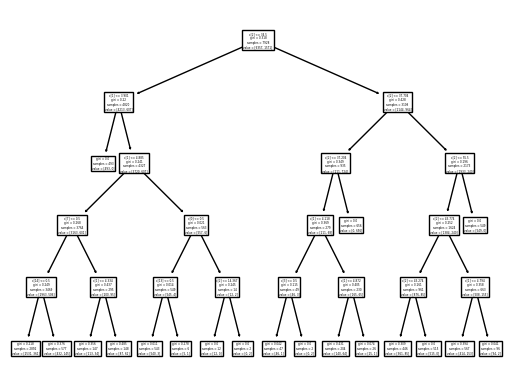

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']

# Partimos en 70% de entrenamiento y 30% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

# Creamos el modelo, con algunos parámetros seleccionados

clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Entrenamos el modelo con el 70% de los datos
clf.fit(X_train, y_train)

# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
# Predecimos el 30% de los valores en test
y_pred = clf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
# Medimos la performance de la predicción usando Especifidad
sk.metrics.precision_score(y_test, y_pred)

1.0

In [ ]:
# Evaluamos con el 80% de los valores en train
sk.metrics.precision_score(y_train, clf.predict(X_train) )

1.0

In [ ]:
# Matriz de confusión
sk.metrics.confusion_matrix(y_test, y_pred)

array([[2724,    0],
       [ 372,  302]])

In [ ]:
# Evaluamos usando validación cruzada en 10 partes
scores = sk.model_selection.cross_val_score(clf, X, y, cv=10, n_jobs=-1, scoring='precision')
scores

array([0.94392523, 0.968     , 1.        , 1.        , 0.97368421,
       0.97959184, 1.        , 0.98019802, 0.98701299, 0.97468354])

In [ ]:
print(scores.mean(), scores.std())

0.9807095832024635 0.01660691235043048


## **8. SELECCIÓN DEL ALGORITMO Y ENTRENAMIENTO DEL MODELO II & VALIDACIÓN DE MODELOS - MÉTRICAS**


In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness'] #'']

df = df[cols]

In [ ]:
# Normalización de variables
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Normalizar las variables del DataFrame
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

### **8.1. Regresión Lineal**

In [ ]:
reg = sk.linear_model.LinearRegression()
#reg = sk.linear_model.Ridge(alpha=0.5)

X = df[df.columns.drop("bestseller")]
y = df["bestseller"]
reg.fit(X, y)

reg.coef_

array([-1.65740267e-01,  1.38659689e-01, -8.05762098e-03,  1.98819671e-01,
        2.91374031e-01,  4.22401503e+11, -9.60299130e-02, -6.69089984e+12,
       -6.69089984e+12, -6.69089984e+12, -6.69089984e+12, -6.69089984e+12,
       -6.69089984e+12, -6.69089984e+12, -6.69089984e+12, -6.69089984e+12,
       -6.69089984e+12, -6.69089984e+12, -6.69089984e+12, -6.69089984e+12])

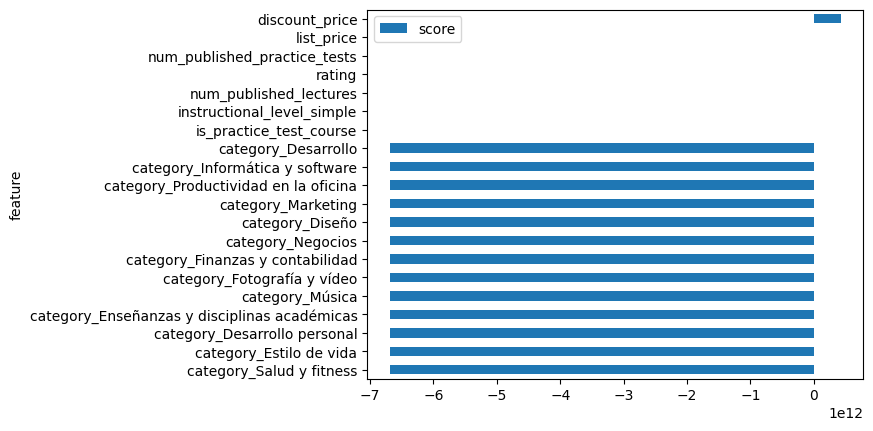

In [ ]:
df_scores = pd.DataFrame({"feature": X.columns, "score": reg.coef_}).sort_values(by="score")
df_scores.plot.barh("feature", "score");

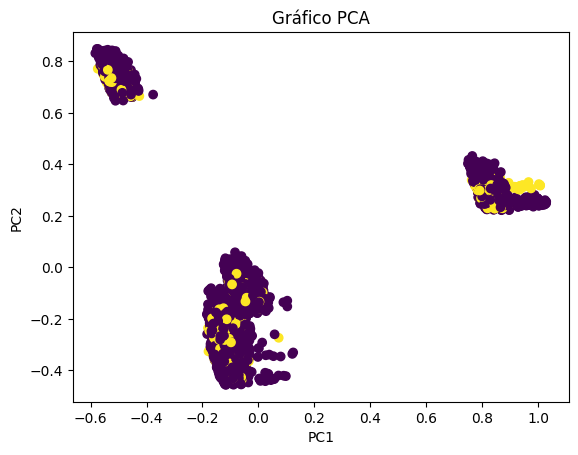

In [ ]:
# Obtener las componentes principales utilizando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la variable objetivo al DataFrame PCA
df_pca['target'] = y

# Plotear el gráfico PCA
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico PCA')
plt.show()

### **8.2. Random Forests**

In [ ]:
reg = sk.ensemble.RandomForestRegressor(n_estimators=300, max_depth=3, random_state=42)

X = df[df.columns.drop("bestseller")]
y = df["bestseller"]
reg.fit(X, y)

std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)

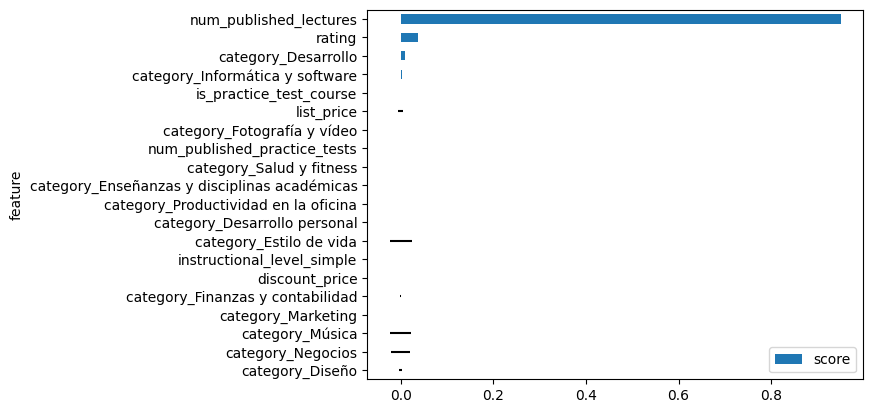

In [ ]:
df_scores = pd.DataFrame({"feature": X.columns, "score": reg.feature_importances_}).sort_values(by="score")
df_scores.plot.barh("feature", "score", xerr=std);

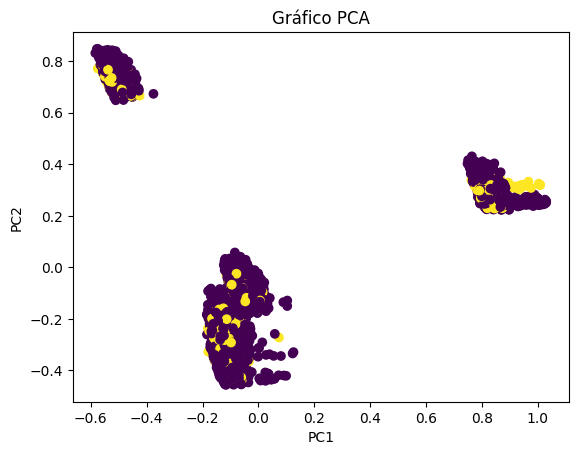

In [ ]:
# Obtener las componentes principales utilizando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Crear un DataFrame con las componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir la variable objetivo al DataFrame PCA
df_pca['target'] = y

# Plotear el gráfico PCA
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico PCA')
plt.show()

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Visualizacion de datos
#============================================================================
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop(columns = ['bestseller'])
y = df['bestseller'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8790464979399647


In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      2724
         1.0       0.99      0.39      0.56       674

    accuracy                           0.88      3398
   macro avg       0.93      0.70      0.75      3398
weighted avg       0.89      0.88      0.86      3398



In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8431430253090053


In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90      2724
         1.0       0.60      0.62      0.61       674

    accuracy                           0.84      3398
   macro avg       0.75      0.76      0.76      3398
weighted avg       0.85      0.84      0.84      3398



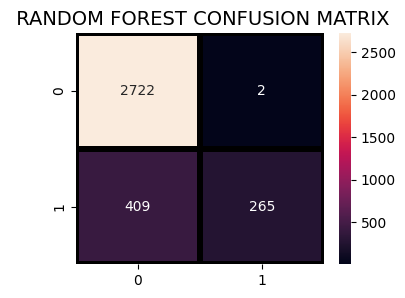

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

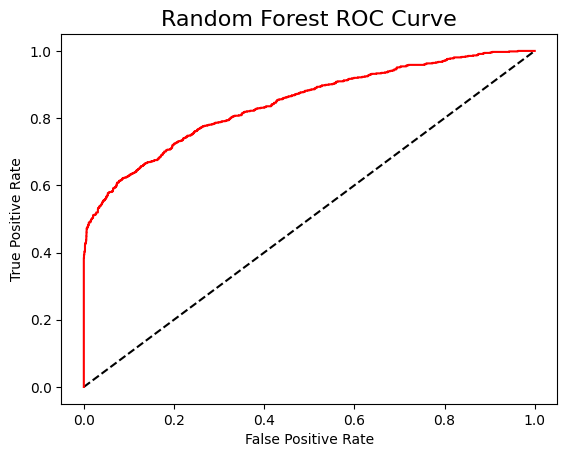

In [ ]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

## **9. MEJORAS DE MODELOS DE MACHINE LEARNING I Y II**

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness']

df = df[cols]

[Text(0.4230769230769231, 0.875, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.022\nsamples = 637\nvalue = [630, 7]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 37.704\ngini = 0.427\nsamples = 3537\nvalue = [2442, 1095]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 37.204\ngini = 0.351\nsamples = 1066\nvalue = [242, 824]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.359\nsamples = 316\nvalue = [242, 74]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 750\nvalue = [0, 750]'),
 Text(0.8461538461538461, 0.375, 'x[2] <= 55.5\ngini = 0.195\nsample

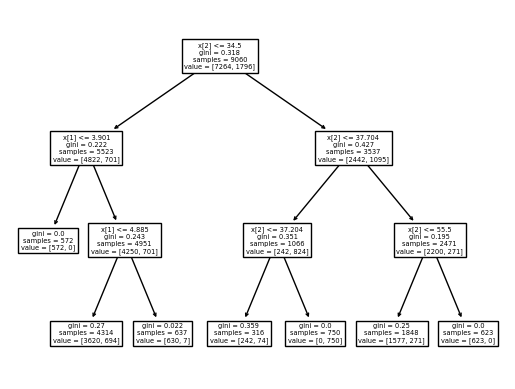

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

### **9.1. Grid Search**

- Sin balanceo de "Bestseller"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = RandomForestClassifier()

# Definir los parámetros a ajustar
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

# Obtener los mejores parámetros y puntajes
print("Mejores Parametros:", grid_cv.best_params_)
print("Mejor CV score:", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Mejor CV score: 0.88719646799117
Accuracy del modelo = 0.89585


- TÉCNICAS DE BALANCEO DE CLASES

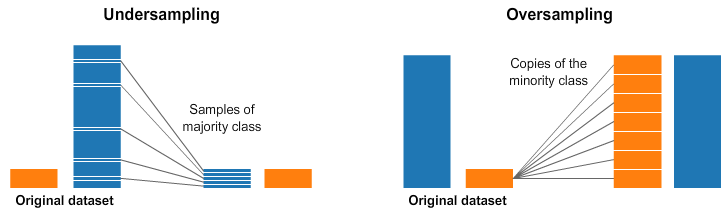

**Oversampling** es duplicar registros aleatorios de la clase minoritaria, lo que puede causar overfishing (capturar atributos no necesarios).

**Undersampling** consiste en eliminar registros aleatorios de la clase mayoritaria, lo que puede provocar la pérdida de información.

Ninguna tecnica es perfecta pero hay que probar diveras metodologias

### **9.2. Random under-sampling**

- Con balanceo de "Bestseller" eliminando registros aleatorios de la clase mayoritaria.

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness']

df = df[cols]

In [ ]:
# Conteo de clases
class_count_0, class_count_1 = df['bestseller'].value_counts()
# Separar clases
class_0 = df[df['bestseller'] == 0]
class_1 = df[df['bestseller'] == 1]
print('bestseller 0:', class_0.shape)
print('bestseller 1:', class_1.shape)

bestseller 0: (9081, 21)
bestseller 1: (2245, 21)


Total para bestseller 1 y 0: False    2245
True     2245
Name: bestseller, dtype: int64


<Axes: title={'center': 'Target final balanceado'}>

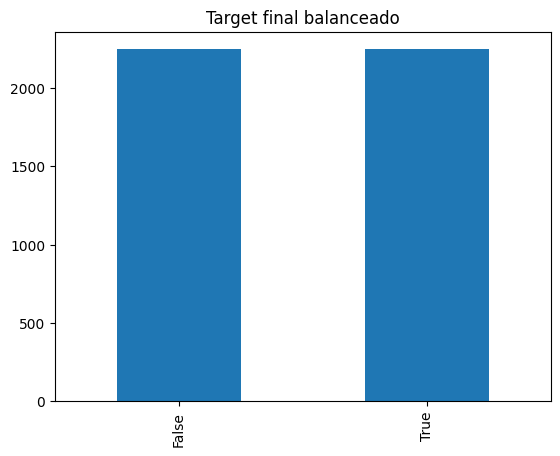

In [ ]:
# Remover observaciones de la clase mayoritaria aleatoriamente
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("Total para bestseller 1 y 0:",test_under['bestseller'].value_counts())
test_under['bestseller'].value_counts().plot(kind='bar', title='Target final balanceado')

In [ ]:
# Separar en X y y
y= test_under.bestseller
X= test_under.drop(columns='bestseller', axis=1)
print(X.shape, y.shape)
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(4490, 20) (4490,)
(3143, 20) (1347, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Definir el modelo
model = RandomForestClassifier()

# Definir los parámetros a ajustar
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

# Obtener los mejores parámetros y puntajes
print("Mejores Parametros:", grid_cv.best_params_)
print("Mejor CV score:", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Mejor CV score: 0.7925591961523413
Accuracy del modelo = 0.77654


### **9.3. Random over-sampling**

- Con balanceo de "Bestseller" duplicando registros aleatorios de la clase minoritaria.

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness']

df = df[cols]

total de bestseller 1 y 0: True     9081
False    9081
Name: bestseller, dtype: int64


<Axes: title={'center': 'Target balanceado'}>

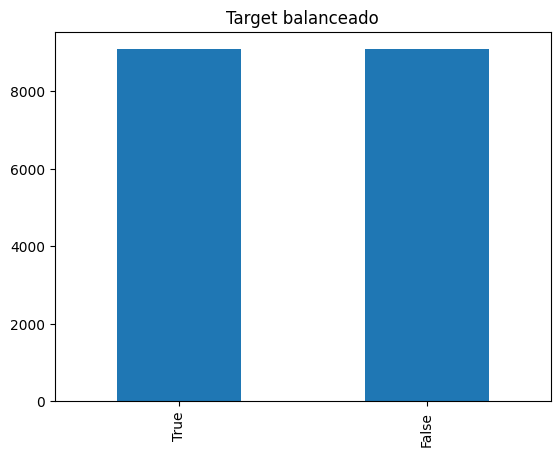

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)
print("total de bestseller 1 y 0:",test_over['bestseller'].value_counts())
test_over['bestseller'].value_counts().plot(kind='bar', title='Target balanceado')

In [ ]:
# Separar en X y y
y= test_over.bestseller
X= test_over.drop(columns='bestseller', axis=1)
print(X.shape, y.shape)
# Separar en train y test
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(18162, 20) (18162,)
(12713, 20) (5449, 20)


In [ ]:
# Definir el modelo
model = RandomForestClassifier()

# Definir los parámetros a ajustar
params_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Realizar la búsqueda de hiperparámetros
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

# Obtener los mejores parámetros y puntajes
print("Mejores Parametros:", grid_cv.best_params_)
print("Mejor CV score:", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Mejor CV score: 0.8348148844484804
Accuracy del modelo = 0.84749


## **10. ENTRENAMIENTO CON MÚLTIPLES MODELOS**

In [ ]:
# Importar librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import LeaveOneOut, cross_val_score
import xgboost as xgb

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()),
                                               ('gb', GradientBoostingClassifier())]),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10),
    'AdaBoost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50),
    'Voting': VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()),
                                           ('gb', GradientBoostingClassifier())])
}

In [ ]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name}:')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression:
Accuracy: 0.6593870434942192
              precision    recall  f1-score   support

       False       0.66      0.67      0.66      2725
        True       0.66      0.65      0.66      2724

    accuracy                           0.66      5449
   macro avg       0.66      0.66      0.66      5449
weighted avg       0.66      0.66      0.66      5449


Random Forest:
Accuracy: 0.9526518627271059
              precision    recall  f1-score   support

       False       0.99      0.92      0.95      2725
        True       0.92      0.99      0.95      2724

    accuracy                           0.95      5449
   macro avg       0.95      0.95      0.95      5449
weighted avg       0.95      0.95      0.95      5449


Gradient Boosting:
Accuracy: 0.831528720866214
              precision    recall  f1-score   support

       False       0.82      0.86      0.84      2725
        True       0.85      0.81      0.83      2724

    accuracy                           

## **11. BOOSTING**

In [ ]:
 # Leer archivo EXCEL
df = pd.read_excel("/content/df_limpio.xlsx")

In [ ]:
# Requisitos de sklearn:
#    Columnas numéricas y booleanas (puede ser cadena de caracteres la que yo quiero predecir)
#    Sin valores perdidos
cols = ['is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness']

df = df[cols]

[Text(0.4230769230769231, 0.875, 'x[2] <= 34.5\ngini = 0.318\nsamples = 9060\nvalue = [7264, 1796]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= 3.901\ngini = 0.222\nsamples = 5523\nvalue = [4822, 701]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 572\nvalue = [572, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 4.885\ngini = 0.243\nsamples = 4951\nvalue = [4250, 701]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.27\nsamples = 4314\nvalue = [3620, 694]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.022\nsamples = 637\nvalue = [630, 7]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 37.704\ngini = 0.427\nsamples = 3537\nvalue = [2442, 1095]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 37.204\ngini = 0.351\nsamples = 1066\nvalue = [242, 824]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.359\nsamples = 316\nvalue = [242, 74]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.0\nsamples = 750\nvalue = [0, 750]'),
 Text(0.8461538461538461, 0.375, 'x[2] <= 55.5\ngini = 0.195\nsample

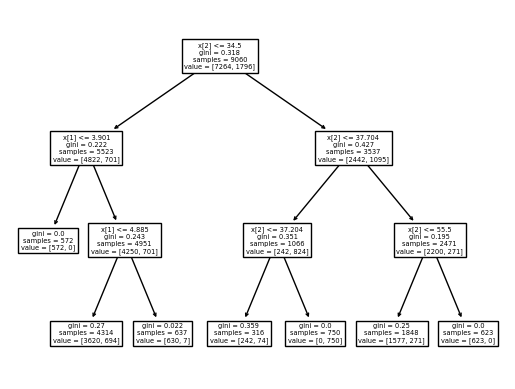

In [ ]:
# Datos para probar
X = df[df.columns.drop('bestseller')]
y = df['bestseller']
# Partimos en 80% de entrenamiento y 20% de prueba
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
# Creamos el modelo, con algunos parámetros seleccionados
clf = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
# Entrenamos el modelo con el 80% de los datos
clf.fit(X_train, y_train)
# Visualizamos el árbol
tree.plot_tree(clf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Creamos el objeto DMatrix para XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

In [ ]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 3,
    'num_rounds': 100,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [ ]:
model = xgb.train(params, dtrain)

[04:35:08] WARNING: ../src/learner.cc:767: 
Parameters: { "num_rounds" } are not used.



In [ ]:
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.886992348440259


In [ ]:
# Definir los parámetros a ajustar y los posibles valores
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic'), param_grid=param_grid,
                           scoring='accuracy', cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 5, 7],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)
print("Mejores parámetros:", best_params)

Precisión del modelo: 0.9064155385520895
Mejores parámetros: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}


## **12. CONCLUSIONES**



Para finalizar con el Proyecto denominado **"Udemy y el Éxito en Ventas de sus Cursos"** se mencionan las siguientes conclusiones:

### **1) Análisis exploratorio y descriptivo de datos:**

Mediante este enfoque se examinó, resumió y visualizó los datos con el objetivo de obtener una comprensión inicial y general de las características y patrones presentes en el conjunto de datos.

Algunos de los **Insights** y **Recomendaciones** iniciales fueron los siguientes:

**Insights:**

Los cursos que ofrece la plataforma Udemy parece enfocarse en:

* **Cateogorías:** Desarrollo, desarrollo personal, diseño, enseñanzas y discimplinas académicas, estilo de vida, finanzas y contabilidad, fotografía y video, informática y software, marketing, música, negocios, productividad en la oficina, y salud y fitness.

* **Niveles de instrucción:** Principiante, intermedio, experto y todos los niveles.

* **Test exámenes:** con exámenes y sin exámenes.

* **Precios:** la mayoría de los cursos se encuentran debajo de 25 dólares.

* **Número de publicaciones:** se concentran entre 0 a 100 publicaciones.

**Recomendaciones:**

* Centrarse en aquellas categorías del tipo **Desarrollo, Informática y software, y Marketing.**

* Centrarse en aquellos cursos **"Todos los niveles"** que tiene un porcentaje de "bestseller" del 22.50% mientras que **"Nivel Expertos"** alcanza un 13%.

* Centrarse en cursos cuyo precio **es menor a 25 dólares.**



### **2) Limpieza y transformación de datos (Data Wrangling):**

Mediante el proceso de limpieza, transformación y preparación de datos brutos se realiza una adecuación de los datos para que sean utilizables en el análisis o para alimentar modelos de machine learning.

El **Data Wrangling** aplicado al Proyecto consisitió en:

**1) Limpieza de datos:** Se identificó y trató valores faltantes, corrección de errores de formato, verificación de valores duplicados y resolver problemas similares para garantizar la integridad y coherencia de los datos.

**2) Transformación de datos:** Se convirtió los datos en el formato adecuado para su análisis, como cambiar el tipo de datos, realizar cálculos, combinar columnas o dividir datos.

**3) Manipulación de datos:** Se filtró y seleccionó subconjuntos de datos relevantes para el análisis o el modelo de machine learning.

**4) Creación de variables:** Se generó nuevas variables o características a partir de las existentes para obtener información adicional y enriquecer el análisis.

**5) Eliminación de outliers:** Se optó por limpiar valores outliers de aquellas variables en las que existe mayor correlación según el análisis exploratorio y descriptivo de datos, utilizando como criterio de imputación el que mejor resultado dió en la performance de la predicción, así se consideró el enfoque de los valores outliers de "num_published_lectures" agrupado por "bestseller", "rating" agrupado por "bestseller", "bestseller" y "list_price","discount_price" y "list_price", viendo una **mejora del modelo del 81,18% al 87,43% como resultado de la limpieza y transformación de los datos anteriores.**

Cabe destacar que, las modificaciones realizadas anteriormente, si bien incrementaron el porcentaje del modelo, ello podría significar la eliminación de datos que son importantes para el conjunto que se está analizando, por ello requiere un análisis a profundidad sobre el sucedo de estos outliers.



### **3) Evaluación de Modelos de Machine Learning:**

Luego de realizar el Data Wrangling se realizó la **Evaluación de Modelos de Machine Learning**.

A continuación se detallarán los mejores resultados obtenidos en las diferentes pruebas ejecutadas de acuerdo a diferentes métricas:

**1) PRUEBA DE EXACTITUD (ACCURACY):** La mejor combinación fue:

*   **Variables:** 'is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'

* **Parámetros:**

*   Max depth: 5.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

* **Resultados: Exactitud 89.13% y desvío 1.66%.**


**2) PRUEBA DE SENSIBILIDAD (RECALL):** La mejor combinación fue:

*   **Variables:** 'is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'category_Desarrollo',	'category_Desarrollo personal',	'category_Diseño',	'category_Enseñanzas y disciplinas académicas',	'category_Estilo de vida',	'category_Finanzas y contabilidad',	'category_Fotografía y vídeo',	'category_Informática y software',	'category_Marketing',	'category_Música',	'category_Negocios',	'category_Productividad en la oficina',	'category_Salud y fitness','locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'

* **Parámetros:**

*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

* **Resultados: Sensibilidad 54.91% y desvío 6.76%.**

**3) PRUEBA DE ESPECIFICIDAD (PRECISION):** La mejor combinación fue:

*   **Variables:** 'is_practice_test_course','rating','num_published_lectures','num_published_practice_tests', 'bestseller','list_price',"discount_price","instructional_level_simple",'locale_es_CL',	'locale_es_CO',	'locale_es_ES',	'locale_es_LA',	'locale_es_MX',	'locale_es_VE'

* **Parámetros:**

*   Max depth: 10.
*   Validación cruzada en 10 partes.
*   Registros 20% / 80%

* **Resultados: Especificidad 99.65% y desvío 0.61%.**


### **4) Mejora de Modelos de Machine Learning:**

Finalmente se realizaron múltiples entrenamientos con diferentes modelos en los cuales se obtuvieron los siguientes resultados:



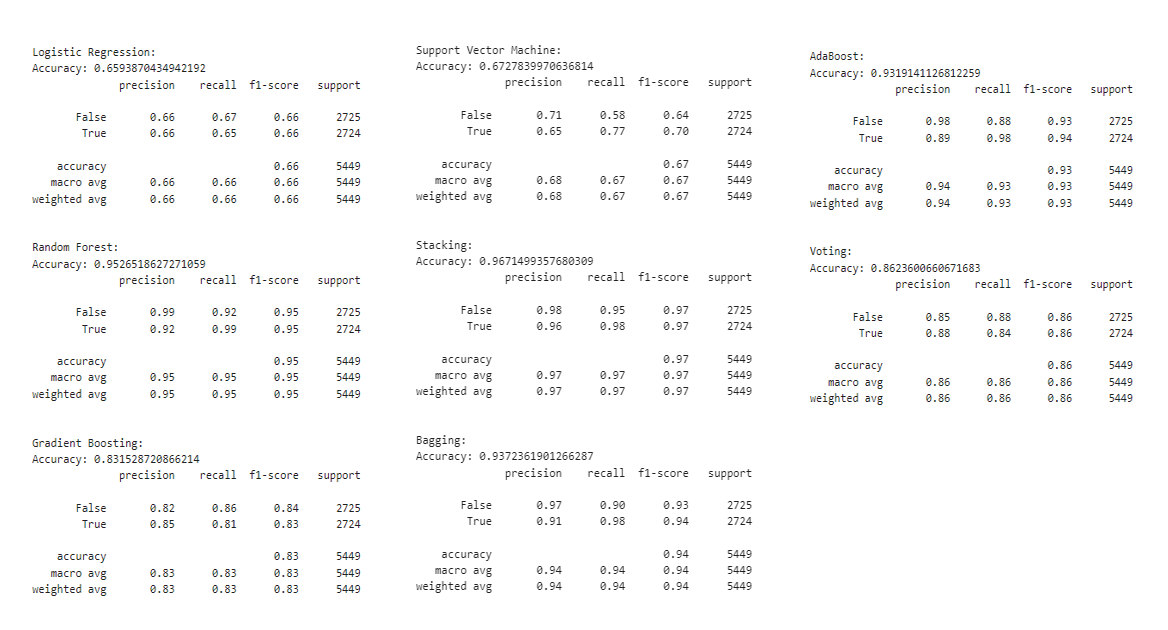

Como puede observarse en la tabla anterior, para cada modelo de machine learning, se refleja el accuraccy, precision, recall y f1-score, de modo tal que se perimite una visualización final de los resultados obtenidos.